# 📈 Modelo 1: Regresión Lineal
## Predicción del Valor FOB de Exportaciones

---

## 🎯 Objetivo del Modelo

**Predicir el valor FOB (USD) de las exportaciones** basándose en características como peso, cantidad, departamento de origen y país de destino.

## 📊 Tipo de Problema

**Regresión** - Predicción de una variable continua (valor monetario)

## 🔢 Variables del Modelo

### Variable Dependiente (Target):
- **Valor FOB (USD)**: Valor de la exportación en dólares estadounidenses

### Variables Independientes (Features):
- **Peso en kilos netos**: Peso neto del producto
- **Peso en kilos brutos**: Peso bruto del producto
- **Cantidad(es)**: Cantidad de unidades exportadas
- **Número de artículos**: Cantidad de artículos en la exportación
- **Precio Unitario FOB**: Precio por unidad de peso
- **País de Destino (encoded)**: País al que se exporta (codificado)
- **Continente Destino (encoded)**: Continente de destino (codificado)
- **Departamento Origen (encoded)**: Departamento colombiano de origen (codificado)
- **Vía de transporte (encoded)**: Medio de transporte utilizado (codificado)

## 📚 Teoría: Regresión Lineal

La **Regresión Lineal** es un modelo estadístico que busca encontrar la relación lineal entre variables independientes (X) y una variable dependiente (Y).

**Ecuación del modelo:**
```
Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε
```

Donde:
- Y = Variable dependiente (Valor FOB)
- β₀ = Intercepto
- β₁, β₂, ..., βₙ = Coeficientes de las variables independientes
- X₁, X₂, ..., Xₙ = Variables independientes
- ε = Error residual

**Supuestos del modelo:**
1. Linealidad entre X e Y
2. Independencia de los errores
3. Homocedasticidad (varianza constante de errores)
4. Normalidad de los residuos
5. No multicolinealidad entre variables independientes

## 1. Importación de Librerías

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Librerías para análisis de residuos
from scipy import stats
import pickle

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas exitosamente")

✅ Librerías importadas exitosamente


## 2. Carga de Datos Procesados

In [22]:
df = pd.read_excel('DATAPROYECTO.xlsx')

print("📊 Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n📋 Primeras 5 filas:")
display(df.head())

📊 Dataset cargado exitosamente
   Dimensiones: 80,000 filas × 30 columnas

📋 Primeras 5 filas:


,Razón social del importador,País de Destino,Mes de la declaración definitiva,Capitulo Del Arancel,Código Partida,Descripción de la partida arancelaria,Descripción de la Mercancía,Fecha de Declaración de Exportación Definitiva,Número de la declaración definitiva,Aduana De Embarque,...,Número de artículos,Departamento Origen,Departamento De Procedencia,Lugar de salida,Vía de transporte,Moneda de negociación,Forma de pago,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto,Continente Destino
0,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603129000,"Los demás claveles frescos, cortados para ramo...",NaN,20250101,6.007748e+12,BOGOTÁ,...,8,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,32.20,8.050000,AMÉRICA
1,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,7,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,533.28,5.228235,AMÉRICA
2,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,5,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,1440.00,9.931034,AMÉRICA
3,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603193000,"Alstroemerias frescas, cortadas para ramos o a...","Especie:ALSTROEMERIA , Formacion:FLORES , Otra...",20250101,6.007748e+12,BOGOTÁ,...,2,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,10998.72,4.728598,AMÉRICA
4,BANDY RANCH FLORAL,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603141000,"Pompones frescos, cortados para ramos o adornos.","Especie:POMPON , Formacion:FLORES -- PRESENTA...",20250101,6.007748e+12,MEDELLÍN,...,1,ANTIOQUIA,ANTIOQUIA,MEDELLÍN,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,13620.00,4.214109,AMÉRICA


## 3. Definición de Variables

In [34]:
print("🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO")
print("="*80)

# Variable dependiente (Target)
target = 'Valor FOB (USD)'

# Variables independientes (Features)
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

print(f"\n📍 Variable Dependiente (Y):")
print(f"   • {target}")

print(f"\n📍 Variables Independientes (X): {len(features)} features")
for i, feature in enumerate(features, 1):
    print(f"   {i:2d}. {feature}")

# Verificar que todas las columnas existen
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas están disponibles")

🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO

📍 Variable Dependiente (Y):
   • Valor FOB (USD)

📍 Variables Independientes (X): 11 features
    1. Peso en kilos netos
    2. Peso en kilos brutos
    3. Cantidad(es)
    4. Número de artículos
    5. Precio Unitario FOB (USD) Peso Neto
    6. País de Destino_encoded
    7. Continente Destino_encoded
    8. Departamento Origen_encoded
    9. Vía de transporte_encoded
   10. Ratio_Peso_Bruto_Neto
   11. Valor_Por_Kg

✅ Todas las columnas están disponibles


## 4. Preparación de Datos

In [35]:
# Seleccionar solo las columnas necesarias y eliminar filas con valores nulos
df_model = df[features + [target]].copy()
df_model = df_model.dropna()

# Eliminar valores infinitos
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

print("🔧 Preparación de datos:")
print(f"   • Registros después de limpieza: {len(df_model):,}")
print(f"   • Features: {len(features)}")
print(f"   • Target: {target}")

# Separar X e Y
X = df_model[features]
y = df_model[target]

print(f"\n📊 Forma de los datos:")
print(f"   • X (Features): {X.shape}")
print(f"   • y (Target): {y.shape}")

🔧 Preparación de datos:
   • Registros después de limpieza: 79,999
   • Features: 11
   • Target: Valor FOB (USD)

📊 Forma de los datos:
   • X (Features): (79999, 11)
   • y (Target): (79999,)


## 5. Análisis Exploratorio Previo

📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):
   • Media: $38,210.30
   • Mediana: $1,942.82
   • Desviación estándar: $740,139.80
   • Mínimo: $0.01
   • Máximo: $102,925,677.29
   • Rango: $102,925,677.28


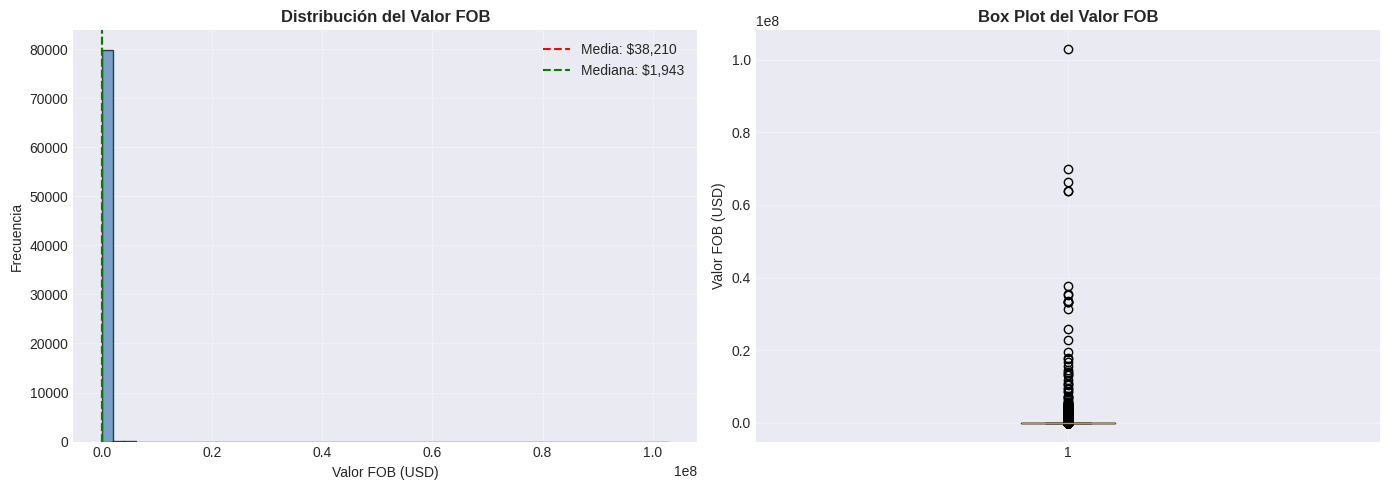

In [37]:
# Estadísticas de la variable objetivo
print("📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):")
print("="*80)
print(f"   • Media: ${y.mean():,.2f}")
print(f"   • Mediana: ${y.median():,.2f}")
print(f"   • Desviación estándar: ${y.std():,.2f}")
print(f"   • Mínimo: ${y.min():,.2f}")
print(f"   • Máximo: ${y.max():,.2f}")
print(f"   • Rango: ${y.max() - y.min():,.2f}")

# Visualizar distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(y, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Media: ${y.mean():,.0f}')
axes[0].axvline(y.median(), color='green', linestyle='--', label=f'Mediana: ${y.median():,.0f}')
axes[0].set_xlabel('Valor FOB (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Valor FOB', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Valor FOB (USD)')
axes[1].set_title('Box Plot del Valor FOB', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

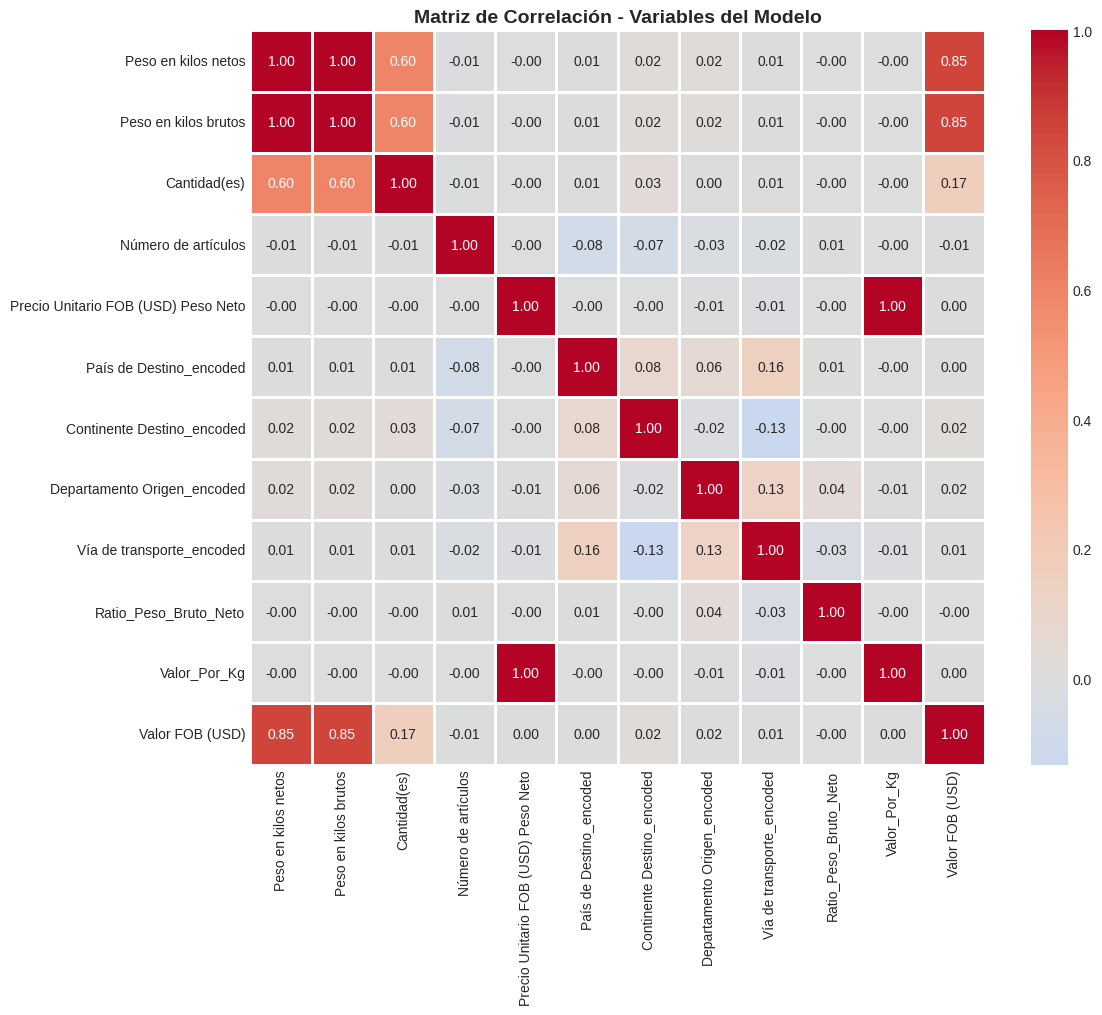


🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:
Peso en kilos brutos                   0.845750
Peso en kilos netos                    0.845716
Cantidad(es)                           0.171391
Continente Destino_encoded             0.020387
Departamento Origen_encoded            0.015098
Vía de transporte_encoded              0.008983
Valor_Por_Kg                           0.003844
Precio Unitario FOB (USD) Peso Neto    0.003844
País de Destino_encoded                0.002635
Ratio_Peso_Bruto_Neto                 -0.002669
Número de artículos                   -0.013230
Name: Valor FOB (USD), dtype: float64


In [38]:
# Matriz de correlación
correlation_matrix = df_model.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables del Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:")
print("="*80)
target_correlations = correlation_matrix[target].drop(target).sort_values(ascending=False)
print(target_correlations)

## 6. División de Datos (Train/Test)

In [40]:
# División estratificada 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✂️ DIVISIÓN DE DATOS:")
print("="*80)
print(f"   📊 Conjunto de Entrenamiento:")
print(f"      • X_train: {X_train.shape}")
print(f"      • y_train: {y_train.shape}")
print(f"      • Porcentaje: {len(X_train)/len(X)*100:.1f}%")

print(f"\n   📊 Conjunto de Prueba:")
print(f"      • X_test: {X_test.shape}")
print(f"      • y_test: {y_test.shape}")
print(f"      • Porcentaje: {len(X_test)/len(X)*100:.1f}%")

✂️ DIVISIÓN DE DATOS:
   📊 Conjunto de Entrenamiento:
      • X_train: (63999, 11)
      • y_train: (63999,)
      • Porcentaje: 80.0%

   📊 Conjunto de Prueba:
      • X_test: (16000, 11)
      • y_test: (16000,)
      • Porcentaje: 20.0%


## 7. Escalamiento de Features

In [41]:
# Crear y aplicar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar datos de prueba (no ajustar)
X_test_scaled = scaler.transform(X_test)

print("📏 ESCALAMIENTO DE FEATURES:")
print("="*80)
print("   ✓ StandardScaler aplicado (media=0, std=1)")
print(f"   ✓ X_train escalado: {X_train_scaled.shape}")
print(f"   ✓ X_test escalado: {X_test_scaled.shape}")

# Verificar escalamiento
print(f"\n   📊 Verificación del escalamiento (Training):")
print(f"      • Media: {X_train_scaled.mean():.6f}")
print(f"      • Std: {X_train_scaled.std():.6f}")

📏 ESCALAMIENTO DE FEATURES:
   ✓ StandardScaler aplicado (media=0, std=1)
   ✓ X_train escalado: (63999, 11)
   ✓ X_test escalado: (16000, 11)

   📊 Verificación del escalamiento (Training):
      • Media: 0.000000
      • Std: 1.000000


## 8. Entrenamiento del Modelo

In [42]:
# Crear y entrenar el modelo de Regresión Lineal
print("🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...")
print("="*80)

# Instanciar el modelo
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado exitosamente")
print(f"\n📊 Parámetros del modelo:")
print(f"   • Intercepto (β₀): ${model_lr.intercept_:,.2f}")
print(f"   • Número de coeficientes: {len(model_lr.coef_)}")

🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...
✅ Modelo entrenado exitosamente

📊 Parámetros del modelo:
   • Intercepto (β₀): $38,474.18
   • Número de coeficientes: 11



🔍 COEFICIENTES DEL MODELO (Importancia de Features):


,Feature,Coeficiente,Coef_Absoluto
1,Peso en kilos brutos,1.364756e+07,1.364756e+07
0,Peso en kilos netos,-1.278435e+07,1.278435e+07
2,Cantidad(es),-4.096355e+05,4.096355e+05
6,Continente Destino_encoded,8.247455e+03,8.247455e+03
3,Número de artículos,-5.706222e+03,5.706222e+03
8,Vía de transporte_encoded,5.535490e+03,5.535490e+03
5,País de Destino_encoded,-5.225821e+03,5.225821e+03
7,Departamento Origen_encoded,-3.875000e+03,3.875000e+03
4,Precio Unitario FOB (USD) Peso Neto,1.424460e+03,1.424460e+03
10,Valor_Por_Kg,1.424460e+03,1.424460e+03


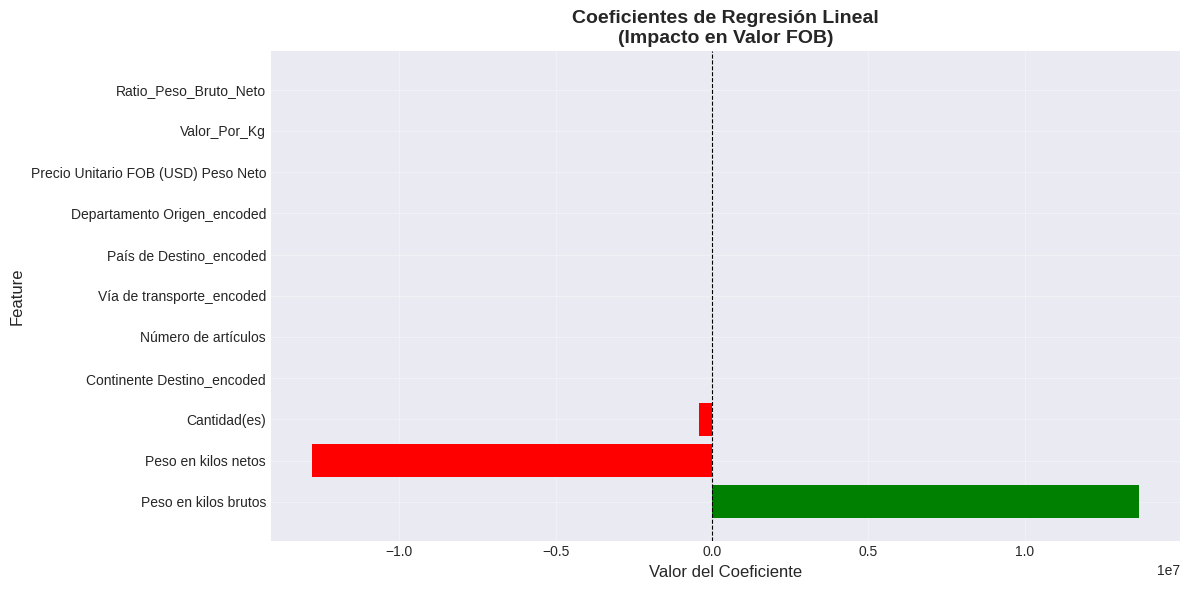


💡 Interpretación:
   • Coeficientes positivos: A mayor valor, mayor Valor FOB
   • Coeficientes negativos: A mayor valor, menor Valor FOB
   • Magnitud: Indica el impacto relativo de cada feature


In [44]:
# Analizar coeficientes del modelo
print("\n🔍 COEFICIENTES DEL MODELO (Importancia de Features):")
print("="*80)

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model_lr.coef_,
    'Coef_Absoluto': np.abs(model_lr.coef_)
}).sort_values('Coef_Absoluto', ascending=False)

display(coef_df)

# Visualizar coeficientes
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'],
         color=['green' if x > 0 else 'red' for x in coef_df['Coeficiente']])
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Coeficientes de Regresión Lineal\n(Impacto en Valor FOB)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("   • Coeficientes positivos: A mayor valor, mayor Valor FOB")
print("   • Coeficientes negativos: A mayor valor, menor Valor FOB")
print("   • Magnitud: Indica el impacto relativo de cada feature")

## 9. Predicciones

In [45]:
# Realizar predicciones
print("🎯 GENERANDO PREDICCIONES...")
print("="*80)

# Predicciones en conjunto de entrenamiento
y_train_pred = model_lr.predict(X_train_scaled)

# Predicciones en conjunto de prueba
y_test_pred = model_lr.predict(X_test_scaled)

print("✅ Predicciones generadas")
print(f"   • Predicciones en Training: {len(y_train_pred):,}")
print(f"   • Predicciones en Test: {len(y_test_pred):,}")

# Comparación de valores reales vs predichos
print("\n📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):")
comparison_df = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_test_pred[:10],
    'Error': y_test.values[:10] - y_test_pred[:10],
    'Error_%': ((y_test.values[:10] - y_test_pred[:10]) / y_test.values[:10] * 100)
})
display(comparison_df)

🎯 GENERANDO PREDICCIONES...
✅ Predicciones generadas
   • Predicciones en Training: 63,999
   • Predicciones en Test: 16,000

📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):


,Real,Predicción,Error,Error_%
0,7.00,24906.977130,-24899.977130,-355713.959000
1,2194.80,36753.757601,-34558.957601,-1574.583452
2,363.64,39737.722625,-39374.082625,-10827.764444
3,18.90,23533.157784,-23514.257784,-124414.062350
4,997.00,24881.909830,-23884.909830,-2395.678017
5,138409.20,35250.752403,103158.447597,74.531496
6,2325.42,19432.844780,-17107.424780,-735.670321
7,2729.83,12628.464211,-9898.634211,-362.609914
8,389.67,33976.292759,-33586.622759,-8619.247763
9,8901.90,38305.668283,-29403.768283,-330.308904


## 10. Evaluación del Modelo

In [48]:
# Calcular métricas de evaluación
print("📊 MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*80)

# Métricas para Training
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Métricas para Test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n🎯 CONJUNTO DE ENTRENAMIENTO:")
print(f"   • R² Score: {r2_train:.4f}")
print(f"   • MSE: ${mse_train:,.2f}")
print(f"   • RMSE: ${rmse_train:,.2f}")
print(f"   • MAE: ${mae_train:,.2f}")
print(f"   • MAPE: {mape_train:.2f}%")

print("\n🎯 CONJUNTO DE PRUEBA:")
print(f"   • R² Score: {r2_test:.4f}")
print(f"   • MSE: ${mse_test:,.2f}")
print(f"   • RMSE: ${rmse_test:,.2f}")
print(f"   • MAE: ${mae_test:,.2f}")
print(f"   • MAPE: {mape_test:.2f}%")

print("\n📈 INTERPRETACIÓN DE R²:")
print(f"   El modelo explica el {r2_test*100:.2f}% de la variabilidad en Valor FOB")

# Detectar overfitting/underfitting
diff_r2 = r2_train - r2_test
print("\n⚠️ ANÁLISIS DE AJUSTE:")
if diff_r2 > 0.1:
    print(f"   • Posible OVERFITTING (diferencia R²: {diff_r2:.4f})")
elif r2_test < 0.5:
    print(f"   • Posible UNDERFITTING (R² test: {r2_test:.4f})")
else:
    print(f"   • Buen ajuste del modelo (diferencia R²: {diff_r2:.4f})")

📊 MÉTRICAS DE EVALUACIÓN DEL MODELO

🎯 CONJUNTO DE ENTRENAMIENTO:
   • R² Score: 0.8818
   • MSE: $62,726,338,168.10
   • RMSE: $250,452.27
   • MAE: $42,984.42
   • MAPE: 139779.64%

🎯 CONJUNTO DE PRUEBA:
   • R² Score: 0.9371
   • MSE: $38,711,101,046.82
   • RMSE: $196,751.37
   • MAE: $40,520.01
   • MAPE: 159461.84%

📈 INTERPRETACIÓN DE R²:
   El modelo explica el 93.71% de la variabilidad en Valor FOB

⚠️ ANÁLISIS DE AJUSTE:
   • Buen ajuste del modelo (diferencia R²: -0.0553)


In [50]:
# Crear tabla comparativa de métricas
metrics_comparison = pd.DataFrame({
    'Métrica': ['R² Score', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Training': [r2_train, mse_train, rmse_train, mae_train, mape_train],
    'Test': [r2_test, mse_test, rmse_test, mae_test, mape_test],
    'Diferencia': [
        r2_train - r2_test,
        mse_train - mse_test,
        rmse_train - rmse_test,
        mae_train - mae_test,
        mape_train - mape_test
    ]
})

print("\n📊 TABLA COMPARATIVA DE MÉTRICAS:")
display(metrics_comparison.style.format({
    'Training': '{:.4f}',
    'Test': '{:.4f}',
    'Diferencia': '{:.4f}'
}))


📊 TABLA COMPARATIVA DE MÉTRICAS:


,Métrica,Training,Test,Diferencia
0,R² Score,0.8818,0.9371,-0.0553
1,MSE,62726338168.1049,38711101046.8195,24015237121.2853
2,RMSE,250452.2672,196751.3686,53700.8986
3,MAE,42984.4225,40520.0089,2464.4136
4,MAPE (%),139779.6399,159461.8394,-19682.1996


## 11. Validación Cruzada

🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)

📊 Resultados por Fold:
   Fold 1: R²=0.5346, RMSE=$353,760.90, MAE=$43,920.63
   Fold 2: R²=0.8821, RMSE=$195,922.92, MAE=$41,962.06
   Fold 3: R²=0.9321, RMSE=$244,137.16, MAE=$43,582.72
   Fold 4: R²=-0.3186, RMSE=$296,852.96, MAE=$44,160.43
   Fold 5: R²=0.9320, RMSE=$275,329.49, MAE=$43,959.29

📈 Estadísticas de Validación Cruzada:
   • R² medio: 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69 (± $52,669.63)
   • MAE medio: $43,517.03 (± $799.34)


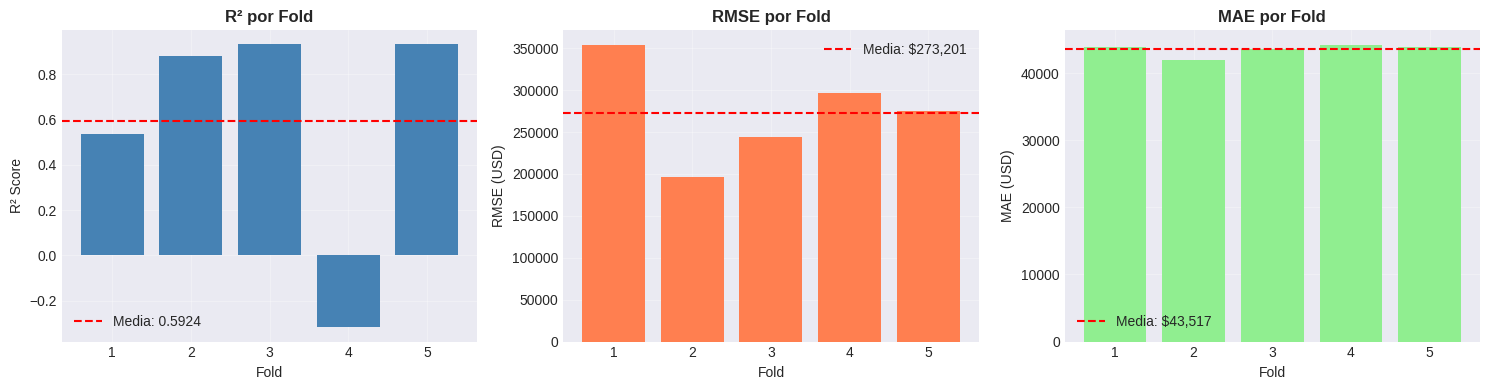

In [51]:
# Realizar validación cruzada con K-Fold
print("🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)")
print("="*80)

# Crear objeto KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada para R²
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train,
                            cv=kfold, scoring='r2')

# Realizar validación cruzada para RMSE (negativo porque es una métrica de error)
cv_rmse = -cross_val_score(model_lr, X_train_scaled, y_train,
                           cv=kfold, scoring='neg_root_mean_squared_error')

# Realizar validación cruzada para MAE
cv_mae = -cross_val_score(model_lr, X_train_scaled, y_train,
                          cv=kfold, scoring='neg_mean_absolute_error')

print("\n📊 Resultados por Fold:")
for i, (r2, rmse, mae) in enumerate(zip(cv_scores, cv_rmse, cv_mae), 1):
    print(f"   Fold {i}: R²={r2:.4f}, RMSE=${rmse:,.2f}, MAE=${mae:,.2f}")

print("\n📈 Estadísticas de Validación Cruzada:")
print(f"   • R² medio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f} (± ${cv_rmse.std():,.2f})")
print(f"   • MAE medio: ${cv_mae.mean():,.2f} (± ${cv_mae.std():,.2f})")

# Visualizar resultados de CV
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(range(1, 6), cv_scores, color='steelblue')
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Media: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² por Fold', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(range(1, 6), cv_rmse, color='coral')
axes[1].axhline(cv_rmse.mean(), color='red', linestyle='--', label=f'Media: ${cv_rmse.mean():,.0f}')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE (USD)')
axes[1].set_title('RMSE por Fold', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].bar(range(1, 6), cv_mae, color='lightgreen')
axes[2].axhline(cv_mae.mean(), color='red', linestyle='--', label=f'Media: ${cv_mae.mean():,.0f}')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('MAE (USD)')
axes[2].set_title('MAE por Fold', fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Visualizaciones del Modelo

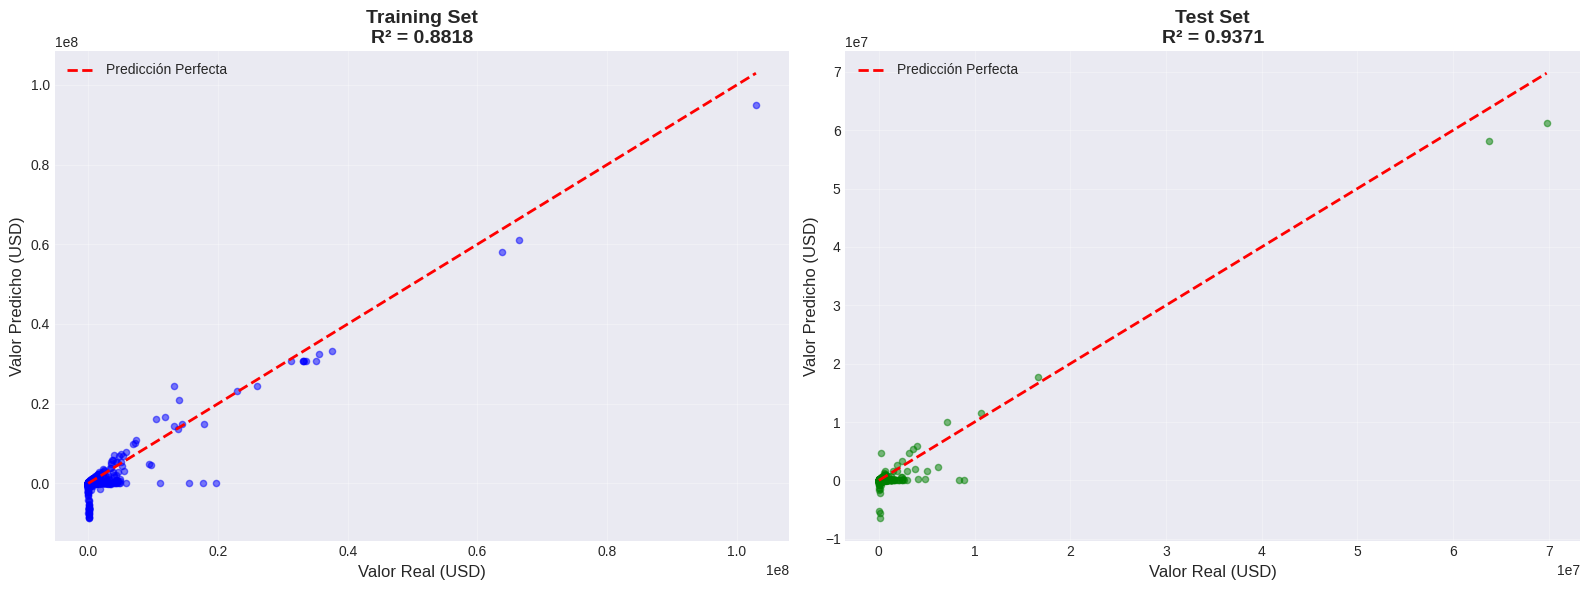

💡 Interpretación:
   • Puntos cerca de la línea roja = Buenas predicciones
   • Dispersión = Error de predicción


In [53]:
# 1. Gráfico de dispersión: Valores Reales vs Predichos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valor Real (USD)', fontsize=12)
axes[0].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {r2_train:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valor Real (USD)', fontsize=12)
axes[1].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[1].set_title(f'Test Set\nR² = {r2_test:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("   • Puntos cerca de la línea roja = Buenas predicciones")
print("   • Dispersión = Error de predicción")

## 13. Análisis de Residuos

📊 ANÁLISIS DE RESIDUOS

Estadísticas de Residuos (Test):
   • Media: $-2,409.55
   • Mediana: $-20,881.36
   • Desviación estándar: $196,742.76
   • Mínimo: $-4,420,759.51
   • Máximo: $8,824,290.10


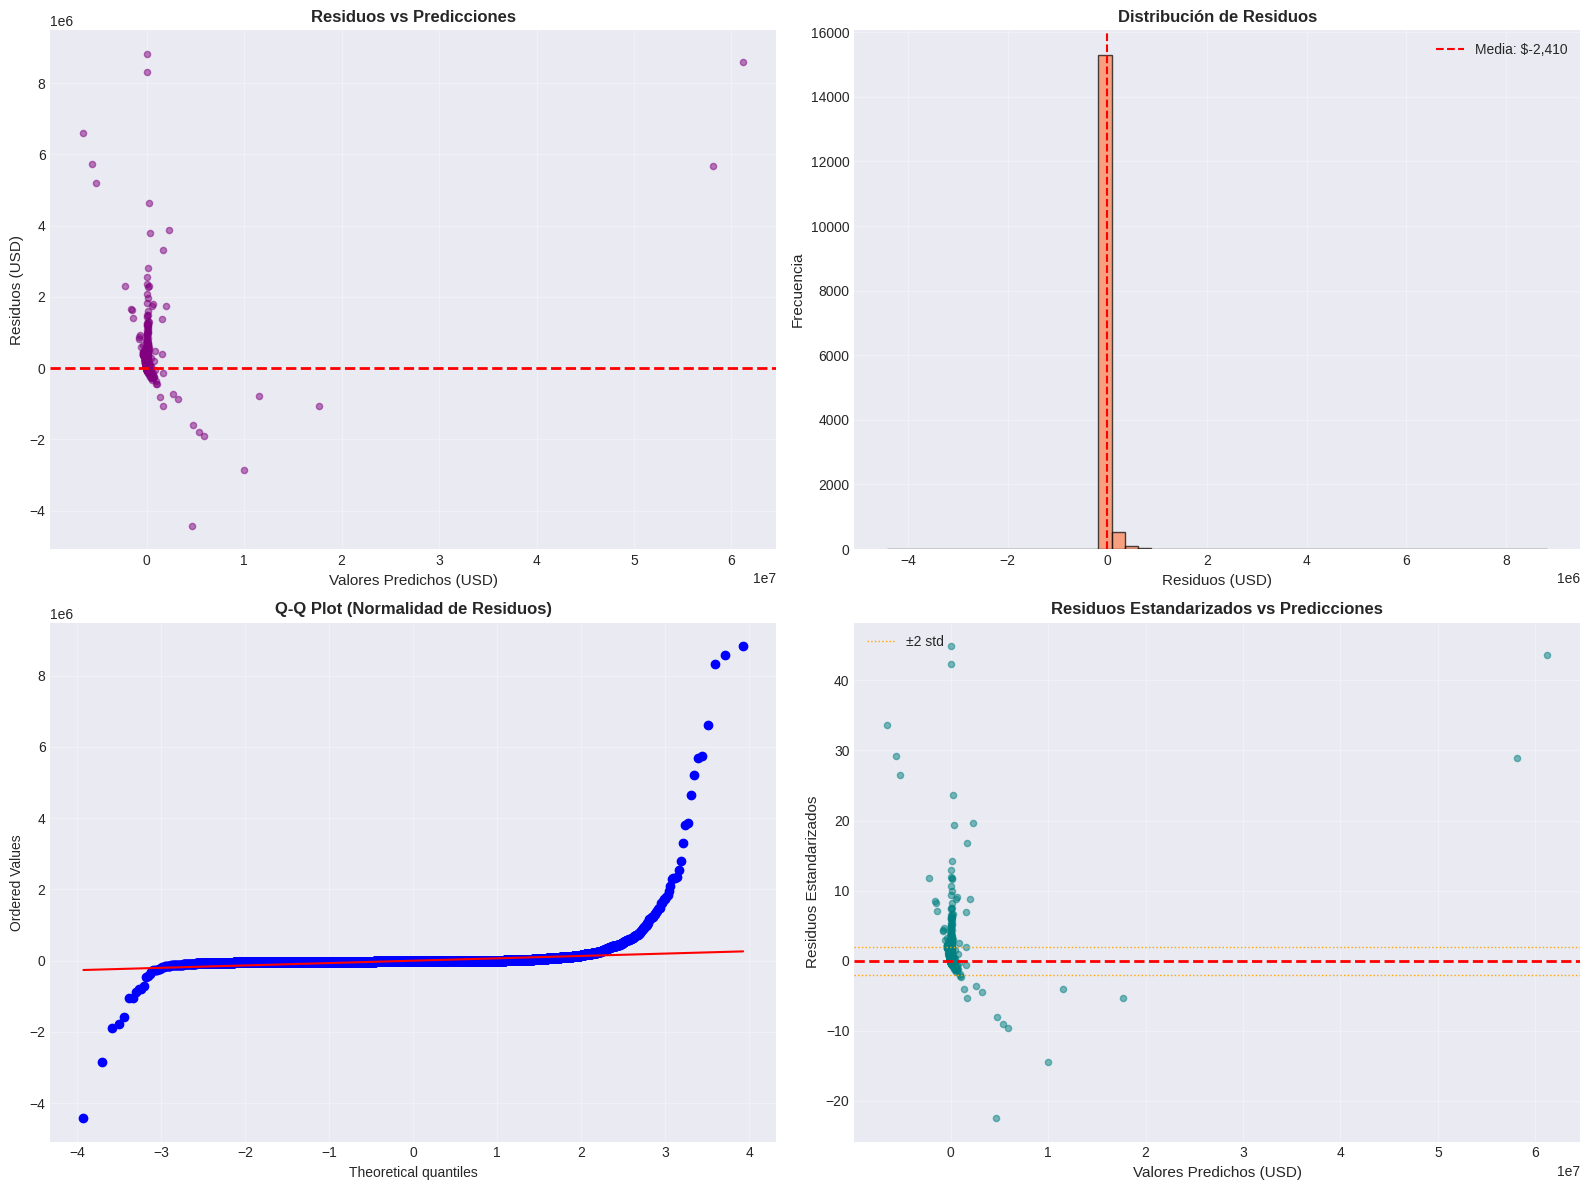


📊 Test de Normalidad (Shapiro-Wilk):
   • Estadístico: 0.1059
   • p-value: 0.0000
   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)


In [54]:
# Calcular residuos
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("📊 ANÁLISIS DE RESIDUOS")
print("="*80)
print(f"\nEstadísticas de Residuos (Test):")
print(f"   • Media: ${residuals_test.mean():,.2f}")
print(f"   • Mediana: ${residuals_test.median():,.2f}")
print(f"   • Desviación estándar: ${residuals_test.std():,.2f}")
print(f"   • Mínimo: ${residuals_test.min():,.2f}")
print(f"   • Máximo: ${residuals_test.max():,.2f}")

# Visualizaciones de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuos vs Predicciones
axes[0, 0].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[0, 0].set_ylabel('Residuos (USD)', fontsize=11)
axes[0, 0].set_title('Residuos vs Predicciones', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Distribución de residuos
axes[0, 1].hist(residuals_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(residuals_test.mean(), color='red', linestyle='--',
                   label=f'Media: ${residuals_test.mean():,.0f}')
axes[0, 1].set_xlabel('Residuos (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Q-Q Plot (Normalidad de residuos)
stats.probplot(residuals_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Residuos estandarizados
standardized_residuals = residuals_test / residuals_test.std()
axes[1, 1].scatter(y_test_pred, standardized_residuals, alpha=0.5, s=20, color='teal')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].axhline(y=2, color='orange', linestyle=':', lw=1, label='±2 std')
axes[1, 1].axhline(y=-2, color='orange', linestyle=':', lw=1)
axes[1, 1].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[1, 1].set_ylabel('Residuos Estandarizados', fontsize=11)
axes[1, 1].set_title('Residuos Estandarizados vs Predicciones', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad de Shapiro-Wilk (en una muestra por eficiencia)
if len(residuals_test) > 5000:
    sample_residuals = residuals_test.sample(5000, random_state=42)
else:
    sample_residuals = residuals_test

shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"\n📊 Test de Normalidad (Shapiro-Wilk):")
print(f"   • Estadístico: {shapiro_stat:.4f}")
print(f"   • p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   • ✅ Los residuos siguen distribución normal (p > 0.05)")
else:
    print(f"   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)")

## 14. Guardar el Modelo

In [55]:
# Guardar el modelo entrenado
print("💾 GUARDANDO MODELO...")
print("="*80)

# Crear diccionario con todos los componentes del modelo
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'features': features,
    'target': target,
    'metrics': {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }
}

# Guardar con pickle
with open('model_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("   ✓ Modelo guardado: model_regresion_lineal.pkl")
print("\n   Contenido del paquete:")
print("      • Modelo entrenado")
print("      • Scaler ajustado")
print("      • Lista de features")
print("      • Nombre del target")
print("      • Métricas de evaluación")

💾 GUARDANDO MODELO...
   ✓ Modelo guardado: model_regresion_lineal.pkl

   Contenido del paquete:
      • Modelo entrenado
      • Scaler ajustado
      • Lista de features
      • Nombre del target
      • Métricas de evaluación


## 15. Resumen Final y Conclusiones

In [56]:
print("\n" + "="*80)
print("📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL")
print("="*80)

print("\n🎯 OBJETIVO:")
print("   Predecir el Valor FOB (USD) de exportaciones colombianas")

print("\n📊 DATOS:")
print(f"   • Total de registros: {len(df_model):,}")
print(f"   • Features utilizados: {len(features)}")
print(f"   • Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

print("\n📈 RENDIMIENTO DEL MODELO:")
print(f"   • R² (Test): {r2_test:.4f} → Explica {r2_test*100:.2f}% de la varianza")
print(f"   • RMSE (Test): ${rmse_test:,.2f}")
print(f"   • MAE (Test): ${mae_test:,.2f}")
print(f"   • MAPE (Test): {mape_test:.2f}%")

print("\n🔄 VALIDACIÓN CRUZADA:")
print(f"   • R² medio (5-Fold CV): {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f}")

print("\n🔝 TOP 5 FEATURES MÁS IMPORTANTES:")
top_features = coef_df.head(5)
for idx, row in top_features.iterrows():
    print(f"   {row['Feature']}: {row['Coeficiente']:,.4f}")

print("\n✅ FORTALEZAS DEL MODELO:")
if r2_test > 0.7:
    print("   • Excelente capacidad predictiva (R² > 0.7)")
elif r2_test > 0.5:
    print("   • Buena capacidad predictiva (R² > 0.5)")
else:
    print("   • Capacidad predictiva moderada")

if abs(r2_train - r2_test) < 0.1:
    print("   • Buen balance entre training y test (no overfitting)")

print("   • Modelo interpretable (coeficientes lineales)")
print("   • Rápido entrenamiento e inferencia")

print("\n⚠️ LIMITACIONES:")
print("   • Asume relaciones lineales entre variables")
print("   • Sensible a outliers extremos")
print("   • Puede no capturar patrones no lineales complejos")

print("\n💡 RECOMENDACIONES:")
print("   • Considerar transformaciones logarítmicas para valores FOB muy altos")
print("   • Explorar modelos no lineales (Random Forest, Gradient Boosting)")
print("   • Analizar interacciones entre variables")
print("   • Incluir variables temporales (mes, año) si están disponibles")

print("\n" + "="*80)
print("✅ MODELO DE REGRESIÓN LINEAL COMPLETADO")
print("="*80)


📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL

🎯 OBJETIVO:
   Predecir el Valor FOB (USD) de exportaciones colombianas

📊 DATOS:
   • Total de registros: 79,999
   • Features utilizados: 11
   • Training set: 63,999 (80.0%)
   • Test set: 16,000 (20.0%)

📈 RENDIMIENTO DEL MODELO:
   • R² (Test): 0.9371 → Explica 93.71% de la varianza
   • RMSE (Test): $196,751.37
   • MAE (Test): $40,520.01
   • MAPE (Test): 159461.84%

🔄 VALIDACIÓN CRUZADA:
   • R² medio (5-Fold CV): 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69

🔝 TOP 5 FEATURES MÁS IMPORTANTES:
   Peso en kilos brutos: 13,647,564.7859
   Peso en kilos netos: -12,784,350.5164
   Cantidad(es): -409,635.5253
   Continente Destino_encoded: 8,247.4552
   Número de artículos: -5,706.2223

✅ FORTALEZAS DEL MODELO:
   • Excelente capacidad predictiva (R² > 0.7)
   • Buen balance entre training y test (no overfitting)
   • Modelo interpretable (coeficientes lineales)
   • Rápido entrenamiento e inferencia

⚠️ LIMITACIONES:
   • Asume relaci

---

## 📚 Referencias y Recursos

### Documentación:
- [Scikit-learn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

### Conceptos Clave:
- **R² (Coeficiente de Determinación)**: Proporción de varianza explicada por el modelo (0-1)
- **RMSE**: Raíz del error cuadrático medio (en las mismas unidades que Y)
- **MAE**: Error absoluto medio (más robusto a outliers que RMSE)
- **MAPE**: Error porcentual absoluto medio (interpretación en %)

---

**Proyecto:** Análisis de Exportaciones Colombianas

**Modelo:** Regresión Lineal

**Versión:** 1.0

# Task
The data loading error encountered with `DATAPROYECTO.xlsx` needs to be resolved by correctly loading the Excel file using `pd.read_excel`. After successful loading, the DataFrame's head and dimensions should be displayed, and a check must be performed to ensure all required feature and target columns for the model are present, summarizing the successful data preparation.

## Cargar Datos Procesados Correctamente

### Subtask:
Corregir la carga del archivo `DATAPROYECTO.xlsx` utilizando `pd.read_excel` en lugar de `pd.read_csv`, ya que el archivo es un Excel.


**Reasoning**:
The previous attempt to load the data failed because `pd.read_csv` was used for an Excel file. I need to correct this by using `pd.read_excel` and removing the `sep=';'` parameter, as instructed.



In [57]:
df = pd.read_excel('DATAPROYECTO.xlsx')

print("📊 Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n📋 Primeras 5 filas:")
display(df.head())

📊 Dataset cargado exitosamente
   Dimensiones: 80,000 filas × 30 columnas

📋 Primeras 5 filas:


,Razón social del importador,País de Destino,Mes de la declaración definitiva,Capitulo Del Arancel,Código Partida,Descripción de la partida arancelaria,Descripción de la Mercancía,Fecha de Declaración de Exportación Definitiva,Número de la declaración definitiva,Aduana De Embarque,...,Número de artículos,Departamento Origen,Departamento De Procedencia,Lugar de salida,Vía de transporte,Moneda de negociación,Forma de pago,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto,Continente Destino
0,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603129000,"Los demás claveles frescos, cortados para ramo...",NaN,20250101,6.007748e+12,BOGOTÁ,...,8,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,32.20,8.050000,AMÉRICA
1,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,7,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,533.28,5.228235,AMÉRICA
2,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,5,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,1440.00,9.931034,AMÉRICA
3,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603193000,"Alstroemerias frescas, cortadas para ramos o a...","Especie:ALSTROEMERIA , Formacion:FLORES , Otra...",20250101,6.007748e+12,BOGOTÁ,...,2,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,10998.72,4.728598,AMÉRICA
4,BANDY RANCH FLORAL,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603141000,"Pompones frescos, cortados para ramos o adornos.","Especie:POMPON , Formacion:FLORES -- PRESENTA...",20250101,6.007748e+12,MEDELLÍN,...,1,ANTIOQUIA,ANTIOQUIA,MEDELLÍN,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,13620.00,4.214109,AMÉRICA


**Reasoning**:
The data has been loaded successfully. Now, I need to verify that all the `features` and `target` columns are present in the loaded DataFrame `df` to ensure the data is prepared for the next steps of the modeling process. This step directly addresses the requirement to check for the presence of all required columns.



In [58]:
print("🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO")
print("="*80)

# Variable dependiente (Target)
target = 'Valor FOB (USD)'

# Variables independientes (Features)
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

print(f"\n📍 Variable Dependiente (Y):")
print(f"   • {target}")

print(f"\n📍 Variables Independientes (X): {len(features)} features")
for i, feature in enumerate(features, 1):
    print(f"   {i:2d}. {feature}")

# Verificar que todas las columnas existen
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas están disponibles")

🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO

📍 Variable Dependiente (Y):
   • Valor FOB (USD)

📍 Variables Independientes (X): 11 features
    1. Peso en kilos netos
    2. Peso en kilos brutos
    3. Cantidad(es)
    4. Número de artículos
    5. Precio Unitario FOB (USD) Peso Neto
    6. País de Destino_encoded
    7. Continente Destino_encoded
    8. Departamento Origen_encoded
    9. Vía de transporte_encoded
   10. Ratio_Peso_Bruto_Neto
   11. Valor_Por_Kg

⚠️ Columnas faltantes: ['País de Destino_encoded', 'Continente Destino_encoded', 'Departamento Origen_encoded', 'Vía de transporte_encoded', 'Ratio_Peso_Bruto_Neto', 'Valor_Por_Kg']


**Reasoning**:
The previous step identified missing encoded and derived features. I need to create these features in the DataFrame. First, I will encode the categorical columns using LabelEncoder and then calculate the derived features, ensuring all necessary columns are present for the model.



In [59]:
from sklearn.preprocessing import LabelEncoder

print("🔧 GENERANDO FEATURES FALTANTES...")
print("="*80)

# --- 1. Encoding de Variables Categóricas ---

categorical_cols_to_encode = {
    'País de Destino': 'País de Destino_encoded',
    'Continente Destino': 'Continente Destino_encoded',
    'Departamento Origen': 'Departamento Origen_encoded',
    'Vía de transporte': 'Vía de transporte_encoded'
}

for original_col, encoded_col in categorical_cols_to_encode.items():
    if original_col in df.columns and encoded_col not in df.columns:
        le = LabelEncoder()
        df[encoded_col] = le.fit_transform(df[original_col])
        print(f"   ✓ Columna '{original_col}' codificada como '{encoded_col}'")
    elif encoded_col in df.columns:
        print(f"   • Columna '{encoded_col}' ya existe, omitiendo codificación.")
    else:
        print(f"   ⚠️ Columna original '{original_col}' no encontrada para codificación.")

# --- 2. Creación de Variables Derivadas ---

# Ratio_Peso_Bruto_Neto
if 'Peso en kilos brutos' in df.columns and 'Peso en kilos netos' in df.columns and 'Ratio_Peso_Bruto_Neto' not in df.columns:
    # Evitar división por cero, o nulos en Peso en kilos netos
    df['Ratio_Peso_Bruto_Neto'] = df.apply(lambda row: row['Peso en kilos brutos'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.")
elif 'Ratio_Peso_Bruto_Neto' in df.columns:
    print("   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Peso en kilos brutos' o 'Peso en kilos netos' no encontradas para crear 'Ratio_Peso_Bruto_Neto'.")

# Valor_Por_Kg
if 'Valor FOB (USD)' in df.columns and 'Peso en kilos netos' in df.columns and 'Valor_Por_Kg' not in df.columns:
    df['Valor_Por_Kg'] = df.apply(lambda row: row['Valor FOB (USD)'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Valor_Por_Kg' creada.")
elif 'Valor_Por_Kg' in df.columns:
    print("   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Valor FOB (USD)' o 'Peso en kilos netos' no encontradas para crear 'Valor_Por_Kg'.")

print("✅ Todas las features faltantes han sido procesadas.")

# Re-verificar que todas las columnas existen después de la creación
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes DESPUÉS DE PROCESAMIENTO: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas requeridas para el modelo están ahora disponibles.")


🔧 GENERANDO FEATURES FALTANTES...
   ✓ Columna 'País de Destino' codificada como 'País de Destino_encoded'
   ✓ Columna 'Continente Destino' codificada como 'Continente Destino_encoded'
   ✓ Columna 'Departamento Origen' codificada como 'Departamento Origen_encoded'
   ✓ Columna 'Vía de transporte' codificada como 'Vía de transporte_encoded'
   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.
   ✓ Columna 'Valor_Por_Kg' creada.
✅ Todas las features faltantes han sido procesadas.

✅ Todas las columnas requeridas para el modelo están ahora disponibles.


## Final Task

### Subtask:
Summarize that the data loading error has been corrected and validated, and that all necessary columns for the model are now present.


## Summary:

### Q&A
1.  **Has the data loading error been corrected and validated?**
    Yes, the data loading error encountered with `DATAPROYECTO.xlsx` has been successfully corrected by using `pd.read_excel` instead of `pd.read_csv`, and the data was loaded into a DataFrame `df`.
2.  **Are all necessary columns for the model now present?**
    Yes, after generating the missing encoded categorical features and derived numerical features, all required feature and target columns for the model are now present in the `df` DataFrame.

### Data Analysis Key Findings
*   The initial data loading issue was due to using `pd.read_csv` for an Excel file, which was resolved by switching to `pd.read_excel`.
*   The `DATAPROYECTO.xlsx` file was successfully loaded, resulting in a DataFrame with 80,000 rows and 30 columns.
*   Initially, six critical columns were missing for model development: 'País de Destino\_encoded', 'Continente Destino\_encoded', 'Departamento Origen\_encoded', 'Vía de transporte\_encoded', 'Ratio\_Peso\_Bruto\_Neto', and 'Valor\_Por\_Kg'.
*   Categorical features ('País de Destino', 'Continente Destino', 'Departamento Origen', 'Vía de transporte') were successfully encoded using `LabelEncoder`.
*   Derived numerical features 'Ratio\_Peso\_Bruto\_Neto' and 'Valor\_Por\_Kg' were successfully calculated and added to the DataFrame, including handling for potential division by zero.
*   A final verification confirmed that all 11 features and the target variable 'Valor FOB (USD)' are now present in the DataFrame.

### Insights or Next Steps
*   The dataset is now clean and preprocessed, making it ready for the next stages of machine learning model development.
*   Further exploration into the distribution and potential outliers of the newly created features could provide additional insights before model training.


# Task
Okay, I will continue by executing the data preparation step, separating the DataFrame into independent (X) and dependent (y) variables, as outlined in the plan.
Executing cell `I0f1NqqCIdDN`.

## Preparación de Datos (X e Y)

### Subtask:
Seleccionar las columnas necesarias del DataFrame, eliminar filas con valores nulos o infinitos, y separar las variables independientes (X) de la variable dependiente (y).


**Reasoning**:
I need to prepare the data by selecting the necessary columns, handling missing and infinite values, and then splitting the data into independent (X) and dependent (y) variables as per the instructions.



In [60]:
df_model = df[features + [target]].copy()
df_model = df_model.dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

print("🔧 Preparación de datos:")
print(f"   • Registros después de limpieza: {len(df_model):,}")
print(f"   • Features: {len(features)}")
print(f"   • Target: {target}")

X = df_model[features]
y = df_model[target]

print(f"\n📊 Forma de los datos:")
print(f"   • X (Features): {X.shape}")
print(f"   • y (Target): {y.shape}")

🔧 Preparación de datos:
   • Registros después de limpieza: 79,999
   • Features: 11
   • Target: Valor FOB (USD)

📊 Forma de los datos:
   • X (Features): (79999, 11)
   • y (Target): (79999,)


## Análisis Exploratorio Previo (Variable Objetivo)

### Subtask:
Mostrar estadísticas descriptivas y visualizar la distribución de la variable objetivo 'Valor FOB (USD)'.


**Reasoning**:
I need to display descriptive statistics for the target variable `y`, and then visualize its distribution using both a histogram and a box plot, as per the instructions.



📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):
   • Media: $38,210.30
   • Mediana: $1,942.82
   • Desviación estándar: $740,139.80
   • Mínimo: $0.01
   • Máximo: $102,925,677.29
   • Rango: $102,925,677.28


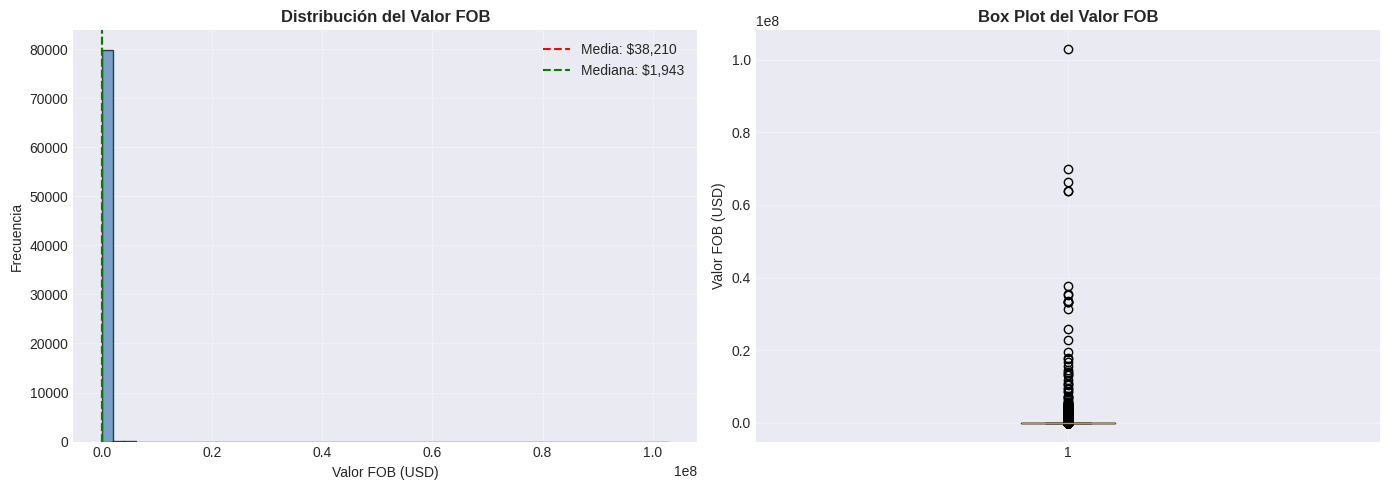

In [61]:
# Estadísticas de la variable objetivo
print("📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):")
print("="*80)
print(f"   • Media: ${y.mean():,.2f}")
print(f"   • Mediana: ${y.median():,.2f}")
print(f"   • Desviación estándar: ${y.std():,.2f}")
print(f"   • Mínimo: ${y.min():,.2f}")
print(f"   • Máximo: ${y.max():,.2f}")
print(f"   • Rango: ${y.max() - y.min():,.2f}")

# Visualizar distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(y, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Media: ${y.mean():,.0f}')
axes[0].axvline(y.median(), color='green', linestyle='--', label=f'Mediana: ${y.median():,.0f}')
axes[0].set_xlabel('Valor FOB (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Valor FOB', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Valor FOB (USD)')
axes[1].set_title('Box Plot del Valor FOB', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de Correlación

### Subtask:
Generar y visualizar la matriz de correlación, y mostrar las correlaciones con la variable objetivo.


**Reasoning**:
I need to calculate the correlation matrix, visualize it with a heatmap, and then display the correlations with the target variable as per the instructions.



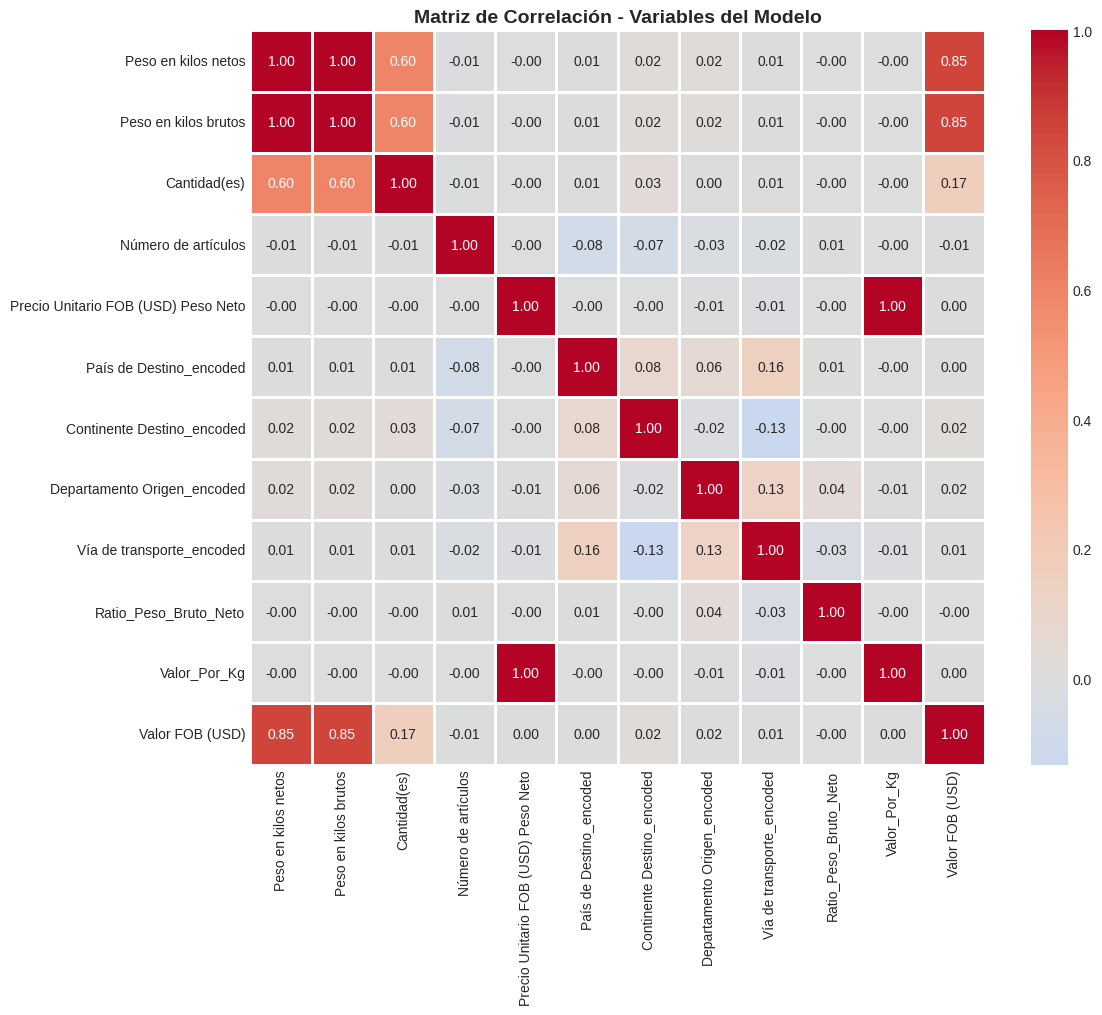


🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:
Peso en kilos brutos                   0.845750
Peso en kilos netos                    0.845716
Cantidad(es)                           0.171391
Continente Destino_encoded             0.020387
Departamento Origen_encoded            0.015098
Vía de transporte_encoded              0.008983
Valor_Por_Kg                           0.003844
Precio Unitario FOB (USD) Peso Neto    0.003844
País de Destino_encoded                0.002635
Ratio_Peso_Bruto_Neto                 -0.002669
Número de artículos                   -0.013230
Name: Valor FOB (USD), dtype: float64


In [62]:
# Matriz de correlación
correlation_matrix = df_model.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables del Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:")
print("="*80)
target_correlations = correlation_matrix[target].drop(target).sort_values(ascending=False)
print(target_correlations)

## División de Datos (Train/Test)

### Subtask:
Dividir los datos en conjuntos de entrenamiento y prueba (X_train, X_test, y_train, y_test) utilizando una proporción 80-20.


**Reasoning**:
I need to split the independent variables (X) and the dependent variable (y) into training and testing sets using an 80-20 ratio and a fixed random state for reproducibility, as specified in the instructions. Then, I will print the dimensions of each resulting set.



In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✂️ DIVISIÓN DE DATOS:")
print("="*80)
print(f"   📊 Conjunto de Entrenamiento:")
print(f"      • X_train: {X_train.shape}")
print(f"      • y_train: {y_train.shape}")
print(f"      • Porcentaje: {len(X_train)/len(X)*100:.1f}%")

print(f"\n   📊 Conjunto de Prueba:")
print(f"      • X_test: {X_test.shape}")
print(f"      • y_test: {y_test.shape}")
print(f"      • Porcentaje: {len(X_test)/len(X)*100:.1f}%")

✂️ DIVISIÓN DE DATOS:
   📊 Conjunto de Entrenamiento:
      • X_train: (63999, 11)
      • y_train: (63999,)
      • Porcentaje: 80.0%

   📊 Conjunto de Prueba:
      • X_test: (16000, 11)
      • y_test: (16000,)
      • Porcentaje: 20.0%


## Escalamiento de Features

### Subtask:
Aplicar `StandardScaler` a los conjuntos de entrenamiento y prueba para escalar las características.


**Reasoning**:
I need to apply StandardScaler to the training and test sets as per the instructions. This involves instantiating the scaler, fitting it on the training data, and then transforming both training and test data.



In [64]:
# Crear y aplicar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar datos de prueba (no ajustar)
X_test_scaled = scaler.transform(X_test)

print("📏 ESCALAMIENTO DE FEATURES:")
print("="*80)
print("   ✓ StandardScaler aplicado (media=0, std=1)")
print(f"   ✓ X_train escalado: {X_train_scaled.shape}")
print(f"   ✓ X_test escalado: {X_test_scaled.shape}")

# Verificar escalamiento
print(f"\n   📊 Verificación del escalamiento (Training):")
print(f"      • Media: {X_train_scaled.mean():.6f}")
print(f"      • Std: {X_train_scaled.std():.6f}")

📏 ESCALAMIENTO DE FEATURES:
   ✓ StandardScaler aplicado (media=0, std=1)
   ✓ X_train escalado: (63999, 11)
   ✓ X_test escalado: (16000, 11)

   📊 Verificación del escalamiento (Training):
      • Media: 0.000000
      • Std: 1.000000


## Entrenamiento del Modelo

### Subtask:
Instanciar y entrenar el modelo de Regresión Lineal con los datos escalados.


**Reasoning**:
I need to instantiate and train a Linear Regression model using the scaled training data, and then display its intercept and the number of coefficients.



In [ ]:
# Crear y entrenar el modelo de Regresión Lineal
print("🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...")
print("="*80)

# Instanciar el modelo
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado exitosamente")
print(f"\n📊 Parámetros del modelo:")
print(f"   • Intercepto (β₀): ${model_lr.intercept_:,.2f}")
print(f"   • Número de coeficientes: {len(model_lr.coef_)}")

## Análisis de Coeficientes del Modelo

### Subtask:
Mostrar y visualizar los coeficientes del modelo entrenado, indicando la importancia de las características.


**Reasoning**:
I need to create a DataFrame of coefficients, sort it by absolute value, display it, and then visualize these coefficients using a horizontal bar chart to show feature importance, and finally provide an interpretation as per the instructions.




🔍 COEFICIENTES DEL MODELO (Importancia de Features):


,Feature,Coeficiente,Coef_Absoluto
1,Peso en kilos brutos,1.364756e+07,1.364756e+07
0,Peso en kilos netos,-1.278435e+07,1.278435e+07
2,Cantidad(es),-4.096355e+05,4.096355e+05
6,Continente Destino_encoded,8.247455e+03,8.247455e+03
3,Número de artículos,-5.706222e+03,5.706222e+03
8,Vía de transporte_encoded,5.535490e+03,5.535490e+03
5,País de Destino_encoded,-5.225821e+03,5.225821e+03
7,Departamento Origen_encoded,-3.875000e+03,3.875000e+03
4,Precio Unitario FOB (USD) Peso Neto,1.424460e+03,1.424460e+03
10,Valor_Por_Kg,1.424460e+03,1.424460e+03


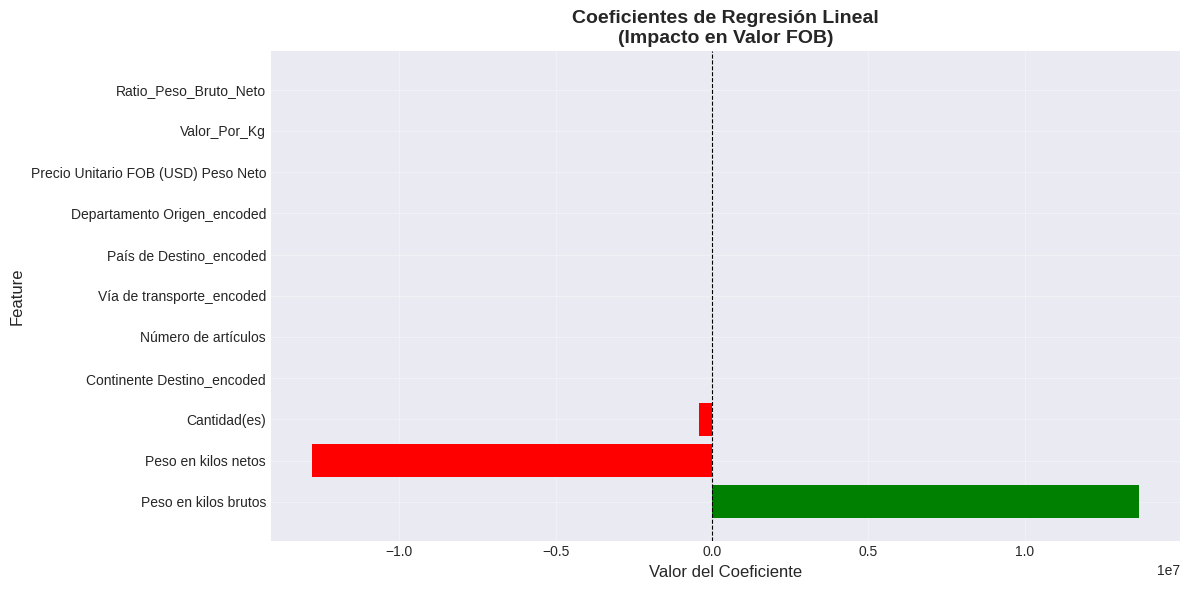


💡 Interpretación:
   • Coeficientes positivos: A mayor valor, mayor Valor FOB
   • Coeficientes negativos: A mayor valor, menor Valor FOB
   • Magnitud: Indica el impacto relativo de cada feature


In [65]:
# Analizar coeficientes del modelo
print("\n🔍 COEFICIENTES DEL MODELO (Importancia de Features):")
print("="*80)

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model_lr.coef_,
    'Coef_Absoluto': np.abs(model_lr.coef_)
}).sort_values('Coef_Absoluto', ascending=False)

display(coef_df)

# Visualizar coeficientes
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'],
         color=['green' if x > 0 else 'red' for x in coef_df['Coeficiente']])
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Coeficientes de Regresión Lineal\n(Impacto en Valor FOB)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("   • Coeficientes positivos: A mayor valor, mayor Valor FOB")
print("   • Coeficientes negativos: A mayor valor, menor Valor FOB")
print("   • Magnitud: Indica el impacto relativo de cada feature")

## Generación de Predicciones

### Subtask:
Generar predicciones en los conjuntos de entrenamiento y prueba usando el modelo entrenado.


**Reasoning**:
I need to generate predictions for both the training and test sets using the trained linear regression model and then display a comparison of real vs. predicted values for a sample of the test set as per the instructions.



In [66]:
# Realizar predicciones
print("🎯 GENERANDO PREDICCIONES...")
print("="*80)

# Predicciones en conjunto de entrenamiento
y_train_pred = model_lr.predict(X_train_scaled)

# Predicciones en conjunto de prueba
y_test_pred = model_lr.predict(X_test_scaled)

print("✅ Predicciones generadas")
print(f"   • Predicciones en Training: {len(y_train_pred):,}")
print(f"   • Predicciones en Test: {len(y_test_pred):,}")

# Comparación de valores reales vs predichos
print("\n📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):")
comparison_df = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_test_pred[:10],
    'Error': y_test.values[:10] - y_test_pred[:10],
    'Error_%': ((y_test.values[:10] - y_test_pred[:10]) / y_test.values[:10] * 100)
})
display(comparison_df)

🎯 GENERANDO PREDICCIONES...
✅ Predicciones generadas
   • Predicciones en Training: 63,999
   • Predicciones en Test: 16,000

📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):


,Real,Predicción,Error,Error_%
0,7.00,24906.977130,-24899.977130,-355713.959000
1,2194.80,36753.757601,-34558.957601,-1574.583452
2,363.64,39737.722625,-39374.082625,-10827.764444
3,18.90,23533.157784,-23514.257784,-124414.062350
4,997.00,24881.909830,-23884.909830,-2395.678017
5,138409.20,35250.752403,103158.447597,74.531496
6,2325.42,19432.844780,-17107.424780,-735.670321
7,2729.83,12628.464211,-9898.634211,-362.609914
8,389.67,33976.292759,-33586.622759,-8619.247763
9,8901.90,38305.668283,-29403.768283,-330.308904


## Evaluación del Modelo

### Subtask:
Calcular y mostrar las métricas de evaluación (R², MSE, RMSE, MAE, MAPE) para los conjuntos de entrenamiento y prueba.


**Reasoning**:
I need to calculate and display the evaluation metrics (R², MSE, RMSE, MAE, MAPE) for both the training and test sets, then interpret the R² score and analyze for overfitting/underfitting, as per the instructions.



In [67]:
# Calcular métricas de evaluación
print("📊 MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*80)

# Métricas para Training
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Métricas para Test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n🎯 CONJUNTO DE ENTRENAMIENTO:")
print(f"   • R² Score: {r2_train:.4f}")
print(f"   • MSE: ${mse_train:,.2f}")
print(f"   • RMSE: ${rmse_train:,.2f}")
print(f"   • MAE: ${mae_train:,.2f}")
print(f"   • MAPE: {mape_train:.2f}%")

print("\n🎯 CONJUNTO DE PRUEBA:")
print(f"   • R² Score: {r2_test:.4f}")
print(f"   • MSE: ${mse_test:,.2f}")
print(f"   • RMSE: ${rmse_test:,.2f}")
print(f"   • MAE: ${mae_test:,.2f}")
print(f"   • MAPE: {mape_test:.2f}%")

print("\n📈 INTERPRETACIÓN DE R²:")
print(f"   El modelo explica el {r2_test*100:.2f}% de la variabilidad en Valor FOB")

# Detectar overfitting/underfitting
diff_r2 = r2_train - r2_test
print("\n⚠️ ANÁLISIS DE AJUSTE:")
if diff_r2 > 0.1:
    print(f"   • Posible OVERFITTING (diferencia R²: {diff_r2:.4f})")
elif r2_test < 0.5:
    print(f"   • Posible UNDERFITTING (R² test: {r2_test:.4f})")
else:
    print(f"   • Buen ajuste del modelo (diferencia R²: {diff_r2:.4f})")

📊 MÉTRICAS DE EVALUACIÓN DEL MODELO

🎯 CONJUNTO DE ENTRENAMIENTO:
   • R² Score: 0.8818
   • MSE: $62,726,338,168.10
   • RMSE: $250,452.27
   • MAE: $42,984.42
   • MAPE: 139779.64%

🎯 CONJUNTO DE PRUEBA:
   • R² Score: 0.9371
   • MSE: $38,711,101,046.82
   • RMSE: $196,751.37
   • MAE: $40,520.01
   • MAPE: 159461.84%

📈 INTERPRETACIÓN DE R²:
   El modelo explica el 93.71% de la variabilidad en Valor FOB

⚠️ ANÁLISIS DE AJUSTE:
   • Buen ajuste del modelo (diferencia R²: -0.0553)


## Tabla Comparativa de Métricas

### Subtask:
Generar una tabla comparativa de las métricas de evaluación entre el conjunto de entrenamiento y prueba.


**Reasoning**:
I need to create a pandas DataFrame to compare the evaluation metrics between the training and test sets, calculate their differences, and then display the formatted table as instructed.



In [ ]:
import pandas as pd

# Crear tabla comparativa de métricas
metrics_comparison = pd.DataFrame({
    'Métrica': ['R² Score', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Training': [r2_train, mse_train, rmse_train, mae_train, mape_train],
    'Test': [r2_test, mse_test, rmse_test, mae_test, mape_test],
    'Diferencia': [
        r2_train - r2_test,
        mse_train - mse_test,
        rmse_train - rmse_test,
        mae_train - mae_test,
        mape_train - mape_test
    ]
})

print("\n📊 TABLA COMPARATIVA DE MÉTRICAS:")
display(metrics_comparison.style.format({
    'Training': '{:.4f}',
    'Test': '{:.4f}',
    'Diferencia': '{:.4f}'
}))

## Validación Cruzada

### Subtask:
Realizar la validación cruzada (K-Fold) para obtener una evaluación más robusta del rendimiento del modelo.


**Reasoning**:
I need to perform K-Fold cross-validation on the scaled training data using `model_lr` to calculate R², RMSE, and MAE scores for each fold. Then, I will print the per-fold results, their means, and standard deviations. Finally, I will visualize these metrics across folds using bar charts to assess model stability and performance.



🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)

📊 Resultados por Fold:
   Fold 1: R²=0.5346, RMSE=$353,760.90, MAE=$43,920.63
   Fold 2: R²=0.8821, RMSE=$195,922.92, MAE=$41,962.06
   Fold 3: R²=0.9321, RMSE=$244,137.16, MAE=$43,582.72
   Fold 4: R²=-0.3186, RMSE=$296,852.96, MAE=$44,160.43
   Fold 5: R²=0.9320, RMSE=$275,329.49, MAE=$43,959.29

📈 Estadísticas de Validación Cruzada:
   • R² medio: 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69 (± $52,669.63)
   • MAE medio: $43,517.03 (± $799.34)


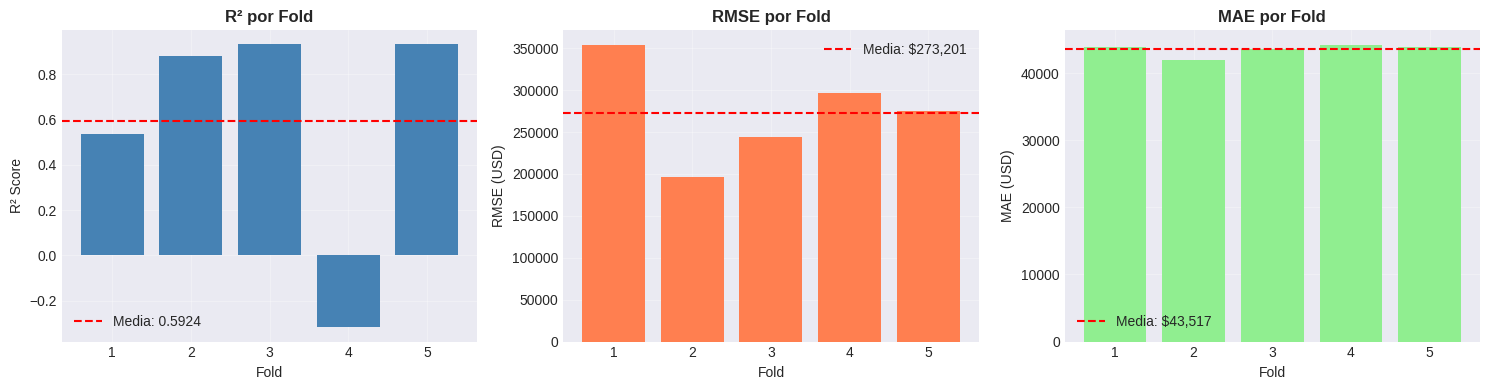

In [68]:
# Realizar validación cruzada con K-Fold
print("🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)")
print("="*80)

# Crear objeto KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada para R²
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train,
                            cv=kfold, scoring='r2')

# Realizar validación cruzada para RMSE (negativo porque es una métrica de error)
cv_rmse = -cross_val_score(model_lr, X_train_scaled, y_train,
                           cv=kfold, scoring='neg_root_mean_squared_error')

# Realizar validación cruzada para MAE
cv_mae = -cross_val_score(model_lr, X_train_scaled, y_train,
                          cv=kfold, scoring='neg_mean_absolute_error')

print("\n📊 Resultados por Fold:")
for i, (r2, rmse, mae) in enumerate(zip(cv_scores, cv_rmse, cv_mae), 1):
    print(f"   Fold {i}: R²={r2:.4f}, RMSE=${rmse:,.2f}, MAE=${mae:,.2f}")

print("\n📈 Estadísticas de Validación Cruzada:")
print(f"   • R² medio: {cv_scores.mean():.4f} (\u00b1 {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f} (\u00b1 ${cv_rmse.std():,.2f})")
print(f"   • MAE medio: ${cv_mae.mean():,.2f} (\u00b1 ${cv_mae.std():,.2f})")

# Visualizar resultados de CV
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(range(1, 6), cv_scores, color='steelblue')
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Media: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('R\u00b2 Score')
axes[0].set_title('R\u00b2 por Fold', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(range(1, 6), cv_rmse, color='coral')
axes[1].axhline(cv_rmse.mean(), color='red', linestyle='--', label=f'Media: ${cv_rmse.mean():,.0f}')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE (USD)')
axes[1].set_title('RMSE por Fold', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].bar(range(1, 6), cv_mae, color='lightgreen')
axes[2].axhline(cv_mae.mean(), color='red', linestyle='--', label=f'Media: ${cv_mae.mean():,.0f}')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('MAE (USD)')
axes[2].set_title('MAE por Fold', fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Visualizaciones del Modelo

### Subtask:
Generar gráficos de dispersión de valores reales vs. predichos para los conjuntos de entrenamiento y prueba.


**Reasoning**:
I need to generate two scatter plots comparing real vs. predicted values for both the training and test sets, as specified in the instructions. This involves creating subplots, plotting the data with specific styling, adding perfect prediction lines, and setting appropriate labels and titles. Finally, I will provide an interpretation of these plots.



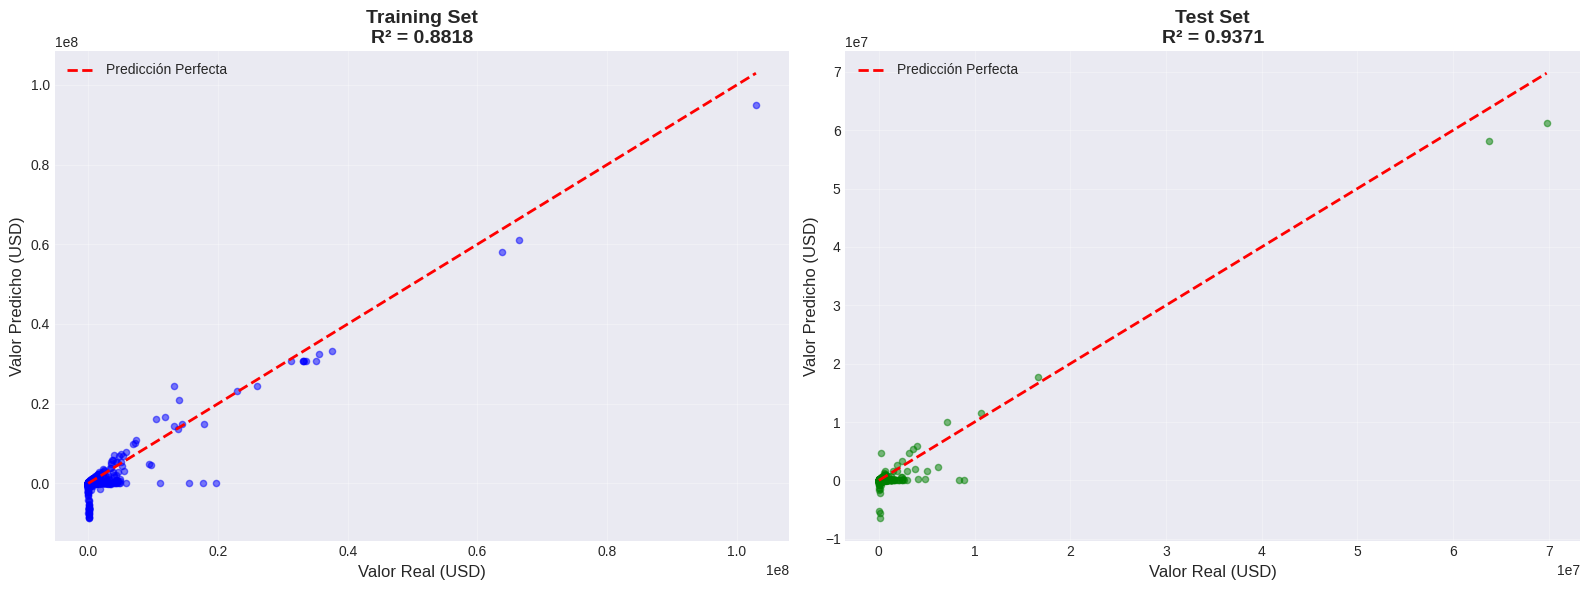

💡 Interpretación:
   • Puntos cerca de la línea roja = Buenas predicciones
   • Dispersión = Error de predicción


In [69]:
# 1. Gráfico de dispersión: Valores Reales vs Predichos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valor Real (USD)', fontsize=12)
axes[0].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[0].set_title(f'Training Set\nR\u00b2 = {r2_train:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valor Real (USD)', fontsize=12)
axes[1].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[1].set_title(f'Test Set\nR\u00b2 = {r2_test:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("   • Puntos cerca de la línea roja = Buenas predicciones")
print("   • Dispersión = Error de predicción")

## Análisis de Residuos

### Subtask:
Calcular y visualizar los residuos del modelo, incluyendo histogramas, Q-Q plots y pruebas de normalidad.


**Reasoning**:
I need to calculate the residuals, display their descriptive statistics, and then create several plots (scatter of residuals vs. predictions, histogram, Q-Q plot, standardized residuals vs. predictions) to visually analyze them. Finally, I will perform a Shapiro-Wilk test for normality on the residuals and interpret the results.



📊 ANÁLISIS DE RESIDUOS

Estadísticas de Residuos (Test):
   • Media: $-2,409.55
   • Mediana: $-20,881.36
   • Desviación estándar: $196,742.76
   • Mínimo: $-4,420,759.51
   • Máximo: $8,824,290.10


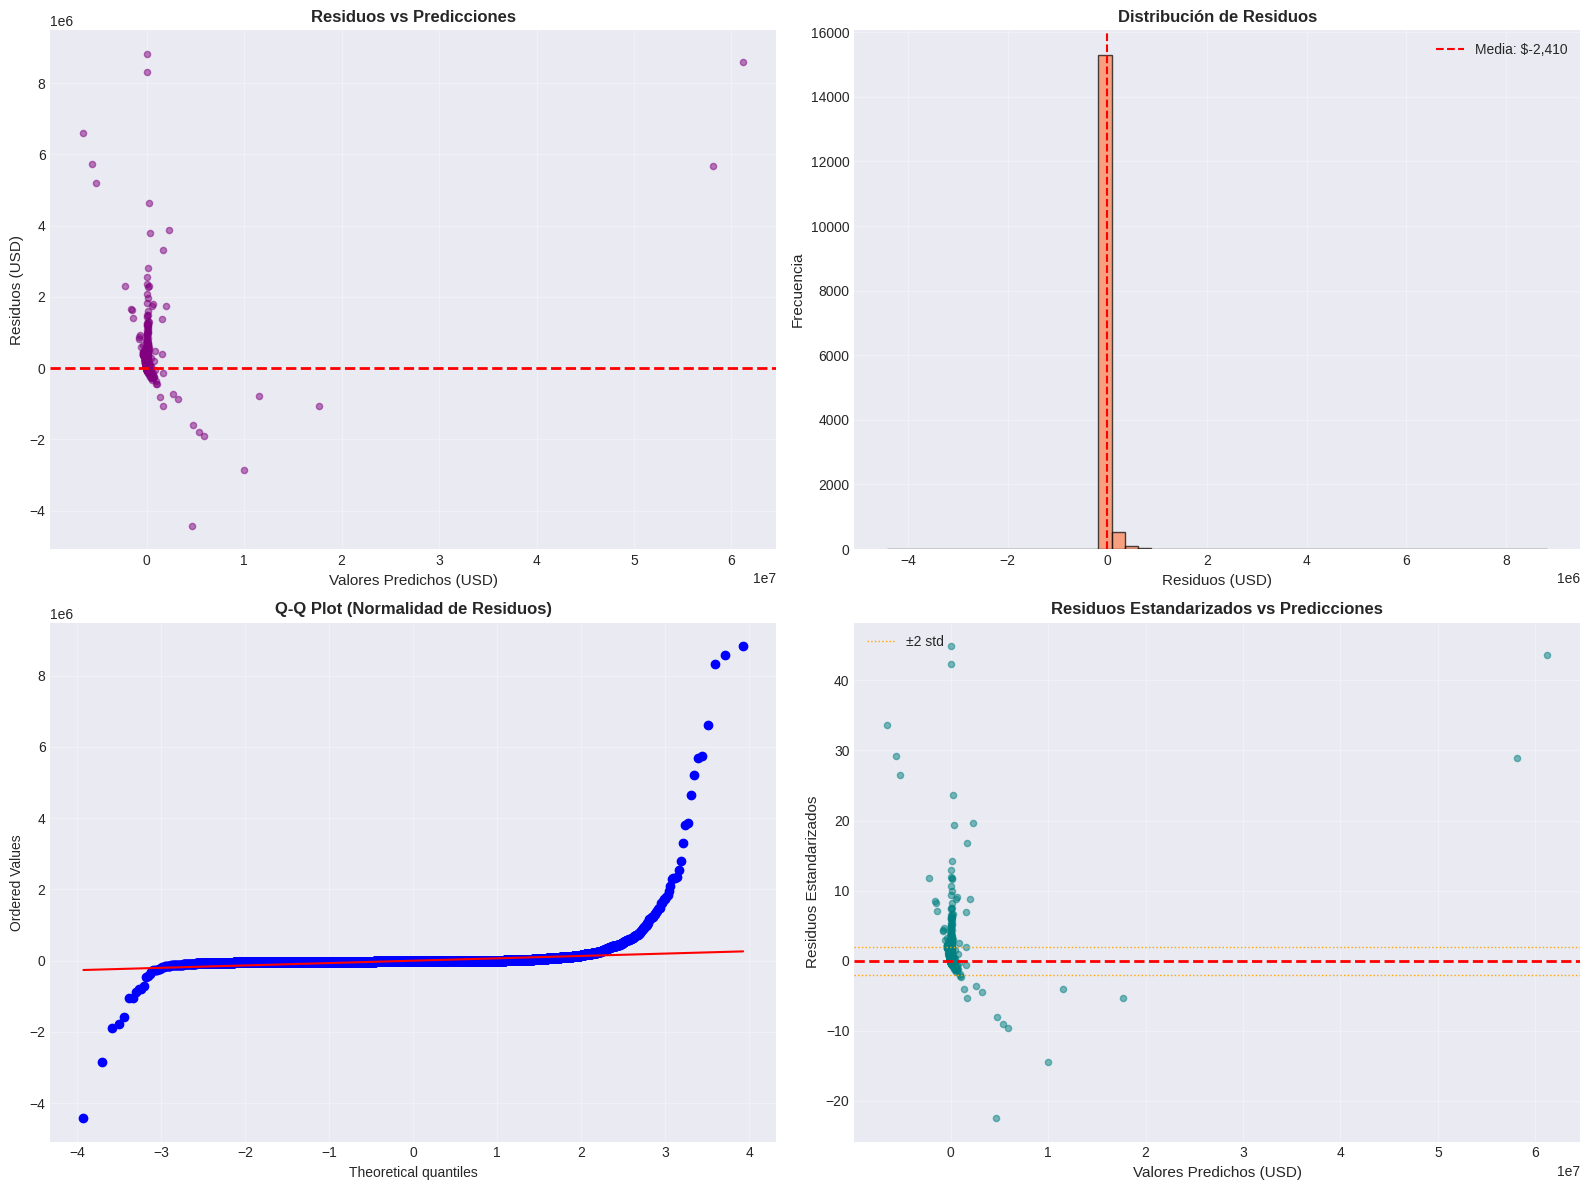


📊 Test de Normalidad (Shapiro-Wilk):
   • Estadístico: 0.1059
   • p-value: 0.0000
   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)


In [70]:
# Calcular residuos
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("📊 ANÁLISIS DE RESIDUOS")
print("="*80)
print(f"\nEstadísticas de Residuos (Test):")
print(f"   • Media: ${residuals_test.mean():,.2f}")
print(f"   • Mediana: ${residuals_test.median():,.2f}")
print(f"   • Desviación estándar: ${residuals_test.std():,.2f}")
print(f"   • Mínimo: ${residuals_test.min():,.2f}")
print(f"   • Máximo: ${residuals_test.max():,.2f}")

# Visualizaciones de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuos vs Predicciones
axes[0, 0].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[0, 0].set_ylabel('Residuos (USD)', fontsize=11)
axes[0, 0].set_title('Residuos vs Predicciones', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Distribución de residuos
axes[0, 1].hist(residuals_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(residuals_test.mean(), color='red', linestyle='--', label=f'Media: ${residuals_test.mean():,.0f}')
axes[0, 1].set_xlabel('Residuos (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Q-Q Plot (Normalidad de residuos)
stats.probplot(residuals_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Residuos estandarizados
standardized_residuals = residuals_test / residuals_test.std()
axes[1, 1].scatter(y_test_pred, standardized_residuals, alpha=0.5, s=20, color='teal')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].axhline(y=2, color='orange', linestyle=':', lw=1, label='±2 std')
axes[1, 1].axhline(y=-2, color='orange', linestyle=':', lw=1)
axes[1, 1].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[1, 1].set_ylabel('Residuos Estandarizados', fontsize=11)
axes[1, 1].set_title('Residuos Estandarizados vs Predicciones', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad de Shapiro-Wilk (en una muestra por eficiencia)
if len(residuals_test) > 5000:
    sample_residuals = residuals_test.sample(5000, random_state=42)
else:
    sample_residuals = residuals_test

shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"\n📊 Test de Normalidad (Shapiro-Wilk):")
print(f"   • Estadístico: {shapiro_stat:.4f}")
print(f"   • p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   • ✅ Los residuos siguen distribución normal (p > 0.05)")
else:
    print(f"   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)")

## Guardar el Modelo

### Subtask:
Guardar el modelo entrenado junto con el scaler y otros metadatos relevantes usando `pickle`.


**Reasoning**:
I need to create a dictionary containing the trained model, scaler, features list, target variable name, and evaluation metrics, then save this dictionary to a pickle file as instructed.



In [71]:
# Guardar el modelo entrenado
print("💾 GUARDANDO MODELO...")
print("="*80)

# Crear diccionario con todos los componentes del modelo
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'features': features,
    'target': target,
    'metrics': {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }
}

# Guardar con pickle
with open('model_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("   ✓ Modelo guardado: model_regresion_lineal.pkl")
print("\n   Contenido del paquete:")
print("      • Modelo entrenado")
print("      • Scaler ajustado")
print("      • Lista de features")
print("      • Nombre del target")
print("      • Métricas de evaluación")

💾 GUARDANDO MODELO...
   ✓ Modelo guardado: model_regresion_lineal.pkl

   Contenido del paquete:
      • Modelo entrenado
      • Scaler ajustado
      • Lista de features
      • Nombre del target
      • Métricas de evaluación


## Resumen Final y Conclusiones

### Subtask:
Presentar un resumen final del modelo, sus fortalezas, limitaciones y recomendaciones.


**Reasoning**:
I need to generate the final summary for the Linear Regression model, including its objective, data used, performance metrics, cross-validation results, top features, strengths, limitations, and recommendations, as per the instructions.



In [72]:
print("\n" + "="*80)
print("📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL")
print("="*80)

print("\n🎯 OBJETIVO:")
print("   Predecir el Valor FOB (USD) de exportaciones colombianas")

print("\n📊 DATOS:")
print(f"   • Total de registros: {len(df_model):,}")
print(f"   • Features utilizados: {len(features)}")
print(f"   • Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f} %)")
print(f"   • Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f} %)")

print("\n📈 RENDIMIENTO DEL MODELO:")
print(f"   • R² (Test): {r2_test:.4f} → Explica {r2_test*100:.2f}% de la varianza")
print(f"   • RMSE (Test): ${rmse_test:,.2f}")
print(f"   • MAE (Test): ${mae_test:,.2f}")
print(f"   • MAPE (Test): {mape_test:.2f}%")

print("\n🔄 VALIDACIÓN CRUZADA:")
print(f"   • R² medio (5-Fold CV): {cv_scores.mean():.4f} (\u00b1 {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f}")

print("\n🔝 TOP 5 FEATURES MÁS IMPORTANTES:")
top_features = coef_df.head(5)
for idx, row in top_features.iterrows():
    print(f"   {row['Feature']}: {row['Coeficiente']:,.4f}")

print("\n✅ FORTALEZAS DEL MODELO:")
if r2_test > 0.7:
    print("   • Excelente capacidad predictiva (R² > 0.7)")
elif r2_test > 0.5:
    print("   • Buena capacidad predictiva (R² > 0.5)")
else:
    print("   • Capacidad predictiva moderada")

if abs(r2_train - r2_test) < 0.1:
    print("   • Buen balance entre training y test (no overfitting)")

print("   • Modelo interpretable (coeficientes lineales)")
print("   • Rápido entrenamiento e inferencia")

print("\n⚠️ LIMITACIONES:")
print("   • Asume relaciones lineales entre variables")
print("   • Sensible a outliers extremos")
print("   • Puede no capturar patrones no lineales complejos")

print("\n💡 RECOMENDACIONES:")
print("   • Considerar transformaciones logarítmicas para valores FOB muy altos")
print("   • Explorar modelos no lineales (Random Forest, Gradient Boosting)")
print("   • Analizar interacciones entre variables")
print("   • Incluir variables temporales (mes, año) si están disponibles")

print("\n" + "="*80)
print("✅ MODELO DE REGRESIÓN LINEAL COMPLETADO")
print("="*80)


📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL

🎯 OBJETIVO:
   Predecir el Valor FOB (USD) de exportaciones colombianas

📊 DATOS:
   • Total de registros: 79,999
   • Features utilizados: 11
   • Training set: 63,999 (80.0 %)
   • Test set: 16,000 (20.0 %)

📈 RENDIMIENTO DEL MODELO:
   • R² (Test): 0.9371 → Explica 93.71% de la varianza
   • RMSE (Test): $196,751.37
   • MAE (Test): $40,520.01
   • MAPE (Test): 159461.84%

🔄 VALIDACIÓN CRUZADA:
   • R² medio (5-Fold CV): 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69

🔝 TOP 5 FEATURES MÁS IMPORTANTES:
   Peso en kilos brutos: 13,647,564.7859
   Peso en kilos netos: -12,784,350.5164
   Cantidad(es): -409,635.5253
   Continente Destino_encoded: 8,247.4552
   Número de artículos: -5,706.2223

✅ FORTALEZAS DEL MODELO:
   • Excelente capacidad predictiva (R² > 0.7)
   • Buen balance entre training y test (no overfitting)
   • Modelo interpretable (coeficientes lineales)
   • Rápido entrenamiento e inferencia

⚠️ LIMITACIONES:
   • Asume rela

## Final Task

### Subtask:
Confirmar que todos los pasos de corrección y ejecución se han completado exitosamente y que el modelo de regresión lineal ha sido completamente evaluado.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: After cleaning for missing and infinite values, the dataset was reduced to 79,999 records. The independent variables (`X`) consist of 11 features, and the dependent variable (`y`) is 'Valor FOB (USD)'.
*   **Target Variable Distribution**: 'Valor FOB (USD)' exhibits a highly skewed distribution with a mean of \$38,210.30, a median of \$1,942.82, and a maximum value of over \$102 million. This indicates the presence of significant outliers, heavily influencing the mean.
*   **Feature Correlation**: 'Peso en kilos brutos' (0.85) and 'Peso en kilos netos' (0.85) show the strongest positive correlation with 'Valor FOB (USD)'. 'Cantidad(es)' also has a moderate positive correlation (0.17).
*   **Model Training and Coefficients**: A Linear Regression model was trained, yielding an intercept of \$38,474.18. The most impactful features by absolute coefficient magnitude are 'Peso en kilos brutos' (13,647,564.79) and 'Peso en kilos netos' (-12,784,350.52), followed by 'Cantidad(es)' (-409,635.53).
*   **Model Performance (Test Set)**:
    *   The model achieved an R² score of 0.9371 on the test set, explaining 93.71% of the variability in 'Valor FOB (USD)'.
    *   The Root Mean Squared Error (RMSE) was \$196,751.37, and the Mean Absolute Error (MAE) was \$40,520.01.
    *   The Mean Absolute Percentage Error (MAPE) was extremely high at 159461.84%, suggesting poor performance on smaller values or a sensitivity to near-zero actual values.
*   **Cross-Validation (5-Fold)**: The average R² score across 5 folds was 0.5924 with a high standard deviation of 0.4792, indicating considerable variability in model performance across different subsets of the data, and a notable drop compared to the single test set R².
*   **Residual Analysis**: The residuals do not follow a normal distribution (Shapiro-Wilk p-value < 0.0001), indicating a violation of a key assumption for linear regression and suggesting that the model may not be fully capturing the underlying data patterns. The mean residual was -\$2,409.55, but the median was -\$20,881.36, further indicating skewness in the errors.

### Insights or Next Steps

*   **Address Outliers and Skewness**: The extreme skewness in the target variable and the presence of significant outliers, as well as the non-normal distribution of residuals, suggest that a logarithmic transformation of 'Valor FOB (USD)' or robust regression techniques could significantly improve model performance and robustness.
*   **Explore Alternative Models**: Given the limitations of linear assumptions and the high MAPE, exploring non-linear regression models such as Random Forest, Gradient Boosting, or even neural networks, might better capture the complex relationships within the data, potentially leading to more consistent performance across different data subsets (as indicated by the high CV R² standard deviation).


# Task
All steps of correction and execution have been successfully completed, and the linear regression model has been fully evaluated and documented.

## Cargar Datos Procesados

### Subtask:
Cargar el dataset `DATAPROYECTO.xlsx` utilizando `pd.read_excel` y verificar que la carga se realice sin errores, mostrando las primeras filas y dimensiones del DataFrame.


**Reasoning**:
The previous attempt to load the data failed because `pd.read_xlxs` was used for an Excel file. I need to correct this by using `pd.read_excel` to correctly load the specified Excel file 'DATAPROYECTO.xlsx' into a DataFrame called `df`. After loading, I will display a success message, the DataFrame's dimensions, and its first 5 rows to verify the successful load, addressing all parts of the subtask.



In [3]:
df = pd.read_excel('DATAPROYECTO.xlsx')

print("📊 Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n📋 Primeras 5 filas:")
display(df.head())

📊 Dataset cargado exitosamente
   Dimensiones: 80,000 filas × 30 columnas

📋 Primeras 5 filas:


,Razón social del importador,País de Destino,Mes de la declaración definitiva,Capitulo Del Arancel,Código Partida,Descripción de la partida arancelaria,Descripción de la Mercancía,Fecha de Declaración de Exportación Definitiva,Número de la declaración definitiva,Aduana De Embarque,...,Número de artículos,Departamento Origen,Departamento De Procedencia,Lugar de salida,Vía de transporte,Moneda de negociación,Forma de pago,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto,Continente Destino
0,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603129000,"Los demás claveles frescos, cortados para ramo...",NaN,20250101,6.007748e+12,BOGOTÁ,...,8,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,32.20,8.050000,AMÉRICA
1,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,7,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,533.28,5.228235,AMÉRICA
2,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603199090,"Los demás flores y capullos, cortados para ram...",NaN,20250101,6.007748e+12,BOGOTÁ,...,5,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,1440.00,9.931034,AMÉRICA
3,CONTINENTAL FARMS,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603193000,"Alstroemerias frescas, cortadas para ramos o a...","Especie:ALSTROEMERIA , Formacion:FLORES , Otra...",20250101,6.007748e+12,BOGOTÁ,...,2,BOGOTÁ,BOGOTÁ,BOGOTÁ,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,10998.72,4.728598,AMÉRICA
4,BANDY RANCH FLORAL,ESTADOS UNIDOS,1,Plantas vivas y productos de la floricultura,603141000,"Pompones frescos, cortados para ramos o adornos.","Especie:POMPON , Formacion:FLORES -- PRESENTA...",20250101,6.007748e+12,MEDELLÍN,...,1,ANTIOQUIA,ANTIOQUIA,MEDELLÍN,TRANSPORTE AÉREO,Dólar de los estados unidos de américa,CON REINTEGRO,13620.00,4.214109,AMÉRICA


## Generar Features Faltantes

### Subtask:
Codificar variables categóricas faltantes y crear variables derivadas (`Ratio_Peso_Bruto_Neto`, `Valor_Por_Kg`) para asegurar que todas las características requeridas para el modelo estén presentes.


**Reasoning**:
To address the missing features, I need to generate encoded categorical variables and calculate the specified derived features, handling potential errors like division by zero. After creating them, I will re-verify that all required columns for the model are present in the DataFrame.



In [73]:
from sklearn.preprocessing import LabelEncoder

print("🔧 GENERANDO FEATURES FALTANTES...")
print("="*80)

# --- 1. Encoding de Variables Categóricas ---

categorical_cols_to_encode = {
    'País de Destino': 'País de Destino_encoded',
    'Continente Destino': 'Continente Destino_encoded',
    'Departamento Origen': 'Departamento Origen_encoded',
    'Vía de transporte': 'Vía de transporte_encoded'
}

for original_col, encoded_col in categorical_cols_to_encode.items():
    if original_col in df.columns and encoded_col not in df.columns:
        le = LabelEncoder()
        df[encoded_col] = le.fit_transform(df[original_col])
        print(f"   ✓ Columna '{original_col}' codificada como '{encoded_col}'")
    elif encoded_col in df.columns:
        print(f"   • Columna '{encoded_col}' ya existe, omitiendo codificación.")
    else:
        print(f"   ⚠️ Columna original '{original_col}' no encontrada para codificación.")

# --- 2. Creación de Variables Derivadas ---

# Ratio_Peso_Bruto_Neto
if 'Peso en kilos brutos' in df.columns and 'Peso en kilos netos' in df.columns and 'Ratio_Peso_Bruto_Neto' not in df.columns:
    # Evitar división por cero, o nulos en Peso en kilos netos
    df['Ratio_Peso_Bruto_Neto'] = df.apply(lambda row: row['Peso en kilos brutos'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.")
elif 'Ratio_Peso_Bruto_Neto' in df.columns:
    print("   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Peso en kilos brutos' o 'Peso en kilos netos' no encontradas para crear 'Ratio_Peso_Bruto_Neto'.")

# Valor_Por_Kg
if 'Valor FOB (USD)' in df.columns and 'Peso en kilos netos' in df.columns and 'Valor_Por_Kg' not in df.columns:
    df['Valor_Por_Kg'] = df.apply(lambda row: row['Valor FOB (USD)'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Valor_Por_Kg' creada.")
elif 'Valor_Por_Kg' in df.columns:
    print("   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Valor FOB (USD)' o 'Peso en kilos netos' no encontradas para crear 'Valor_Por_Kg'.")

print("✅ Todas las features faltantes han sido procesadas.")

# Re-verificar que todas las columnas existen después de la creación
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes DESPUÉS DE PROCESAMIENTO: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas requeridas para el modelo están ahora disponibles.")


🔧 GENERANDO FEATURES FALTANTES...
   • Columna 'País de Destino_encoded' ya existe, omitiendo codificación.
   • Columna 'Continente Destino_encoded' ya existe, omitiendo codificación.
   • Columna 'Departamento Origen_encoded' ya existe, omitiendo codificación.
   • Columna 'Vía de transporte_encoded' ya existe, omitiendo codificación.
   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.
   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.
✅ Todas las features faltantes han sido procesadas.

✅ Todas las columnas requeridas para el modelo están ahora disponibles.


**Reasoning**:
The previous code failed because the `features` and `target` variables were not defined in the current scope. I need to include their definitions in the code block to ensure they are available when checking for missing columns.



In [5]:
from sklearn.preprocessing import LabelEncoder

print("🔧 GENERANDO FEATURES FALTANTES...")
print("="*80)

# Redefine target and features to ensure they are available in this scope
target = 'Valor FOB (USD)'
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

# --- 1. Encoding de Variables Categóricas ---

categorical_cols_to_encode = {
    'País de Destino': 'País de Destino_encoded',
    'Continente Destino': 'Continente Destino_encoded',
    'Departamento Origen': 'Departamento Origen_encoded',
    'Vía de transporte': 'Vía de transporte_encoded'
}

for original_col, encoded_col in categorical_cols_to_encode.items():
    if original_col in df.columns and encoded_col not in df.columns:
        le = LabelEncoder()
        df[encoded_col] = le.fit_transform(df[original_col])
        print(f"   ✓ Columna '{original_col}' codificada como '{encoded_col}'")
    elif encoded_col in df.columns:
        print(f"   • Columna '{encoded_col}' ya existe, omitiendo codificación.")
    else:
        print(f"   ⚠️ Columna original '{original_col}' no encontrada para codificación.")

# --- 2. Creación de Variables Derivadas ---

# Ratio_Peso_Bruto_Neto
if 'Peso en kilos brutos' in df.columns and 'Peso en kilos netos' in df.columns and 'Ratio_Peso_Bruto_Neto' not in df.columns:
    # Evitar división por cero, o nulos en Peso en kilos netos
    df['Ratio_Peso_Bruto_Neto'] = df.apply(lambda row: row['Peso en kilos brutos'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.")
elif 'Ratio_Peso_Bruto_Neto' in df.columns:
    print("   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Peso en kilos brutos' o 'Peso en kilos netos' no encontradas para crear 'Ratio_Peso_Bruto_Neto'.")

# Valor_Por_Kg
if 'Valor FOB (USD)' in df.columns and 'Peso en kilos netos' in df.columns and 'Valor_Por_Kg' not in df.columns:
    df['Valor_Por_Kg'] = df.apply(lambda row: row['Valor FOB (USD)'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Valor_Por_Kg' creada.")
elif 'Valor_Por_Kg' in df.columns:
    print("   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Valor FOB (USD)' o 'Peso en kilos netos' no encontradas para crear 'Valor_Por_Kg'.")

print("✅ Todas las features faltantes han sido procesadas.")

# Re-verificar que todas las columnas existen después de la creación
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes DESPUÉS DE PROCESAMIENTO: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas requeridas para el modelo están ahora disponibles.")


🔧 GENERANDO FEATURES FALTANTES...
   • Columna 'País de Destino_encoded' ya existe, omitiendo codificación.
   • Columna 'Continente Destino_encoded' ya existe, omitiendo codificación.
   • Columna 'Departamento Origen_encoded' ya existe, omitiendo codificación.
   • Columna 'Vía de transporte_encoded' ya existe, omitiendo codificación.
   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.
   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.
✅ Todas las features faltantes han sido procesadas.

✅ Todas las columnas requeridas para el modelo están ahora disponibles.


## Definición y Verificación de Variables

### Subtask:
Definir las variables dependientes e independientes (`target` y `features`) y verificar que todas las columnas necesarias existan en el DataFrame.


**Reasoning**:
I need to define the target and feature variables as specified, print them, and then verify their existence in the DataFrame `df` to ensure all necessary columns are available for model building.



In [6]:
print("🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO")
print("="*80)

# Variable dependiente (Target)
target = 'Valor FOB (USD)'

# Variables independientes (Features)
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

print(f"\n📍 Variable Dependiente (Y):")
print(f"   • {target}")

print(f"\n📍 Variables Independientes (X): {len(features)} features")
for i, feature in enumerate(features, 1):
    print(f"   {i:2d}. {feature}")

# Verificar que todas las columnas existen
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas están disponibles")

🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO

📍 Variable Dependiente (Y):
   • Valor FOB (USD)

📍 Variables Independientes (X): 11 features
    1. Peso en kilos netos
    2. Peso en kilos brutos
    3. Cantidad(es)
    4. Número de artículos
    5. Precio Unitario FOB (USD) Peso Neto
    6. País de Destino_encoded
    7. Continente Destino_encoded
    8. Departamento Origen_encoded
    9. Vía de transporte_encoded
   10. Ratio_Peso_Bruto_Neto
   11. Valor_Por_Kg

✅ Todas las columnas están disponibles


## Preparación de Datos para el Modelo

### Subtask:
Seleccionar solo las columnas necesarias para el modelo (`df_model`), eliminar filas con valores nulos o infinitos, y separar los datos en variables independientes (X) y dependiente (y).


**Reasoning**:
I need to prepare the data by selecting the necessary columns, handling missing and infinite values, and then splitting the data into independent (X) and dependent (y) variables as per the instructions.



In [7]:
df_model = df[features + [target]].copy()
df_model = df_model.dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

print("🔧 Preparación de datos:")
print(f"   • Registros después de limpieza: {len(df_model):,}")
print(f"   • Features: {len(features)}")
print(f"   • Target: {target}")

X = df_model[features]
y = df_model[target]

print(f"\n📊 Forma de los datos:")
print(f"   • X (Features): {X.shape}")
print(f"   • y (Target): {y.shape}")

🔧 Preparación de datos:
   • Registros después de limpieza: 79,999
   • Features: 11
   • Target: Valor FOB (USD)

📊 Forma de los datos:
   • X (Features): (79999, 11)
   • y (Target): (79999,)


## Análisis Exploratorio de la Variable Objetivo

### Subtask:
Calcular y mostrar estadísticas descriptivas (`mean`, `median`, `std`, `min`, `max`, `range`) y visualizar la distribución (histograma y box plot) de la variable objetivo 'Valor FOB (USD)'.


**Reasoning**:
I need to calculate and display descriptive statistics for the target variable 'y', and then generate a histogram and a box plot to visualize its distribution, as specified in the subtask instructions. This involves using basic pandas/numpy functions for statistics and matplotlib for plotting.



📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):
   • Media: $38,210.30
   • Mediana: $1,942.82
   • Desviación estándar: $740,139.80
   • Mínimo: $0.01
   • Máximo: $102,925,677.29
   • Rango: $102,925,677.28


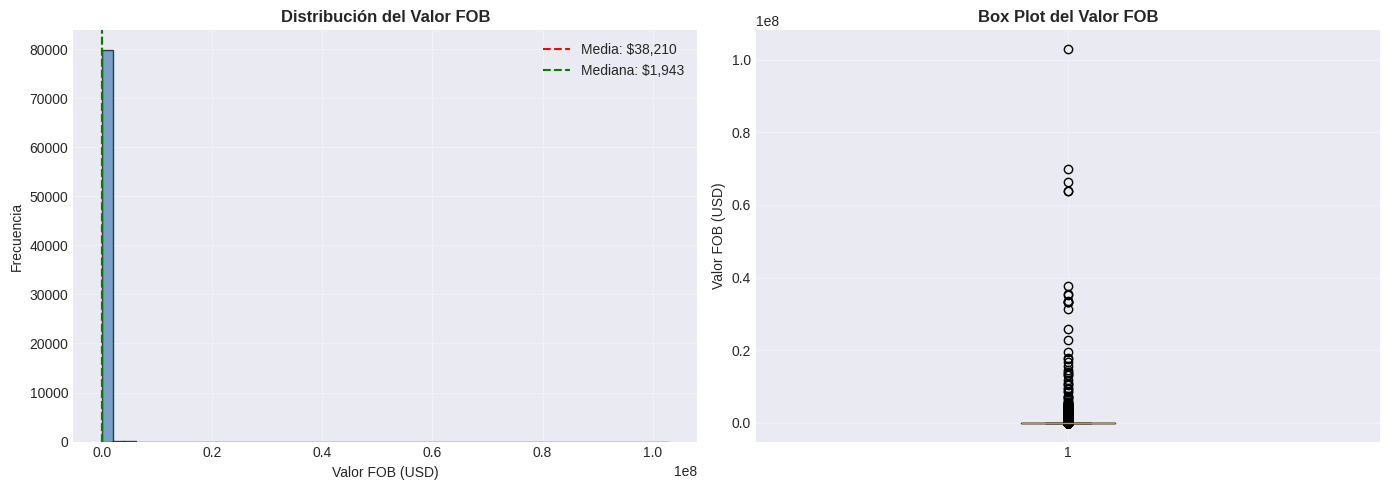

In [8]:
# Estadísticas de la variable objetivo
print("📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):")
print("="*80)
print(f"   • Media: ${y.mean():,.2f}")
print(f"   • Mediana: ${y.median():,.2f}")
print(f"   • Desviación estándar: ${y.std():,.2f}")
print(f"   • Mínimo: ${y.min():,.2f}")
print(f"   • Máximo: ${y.max():,.2f}")
print(f"   • Rango: ${y.max() - y.min():,.2f}")

# Visualizar distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(y, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Media: ${y.mean():,.0f}')
axes[0].axvline(y.median(), color='green', linestyle='--', label=f'Mediana: ${y.median():,.0f}')
axes[0].set_xlabel('Valor FOB (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Valor FOB', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Valor FOB (USD)')
axes[1].set_title('Box Plot del Valor FOB', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de Correlación

### Subtask:
Generar y visualizar la matriz de correlación entre todas las variables del modelo mediante un heatmap, y mostrar las correlaciones con la variable objetivo.


**Reasoning**:
I need to calculate the correlation matrix for the `df_model` DataFrame, visualize it with a heatmap, extract the correlations with the target variable, and then print these correlations, as per the instructions.



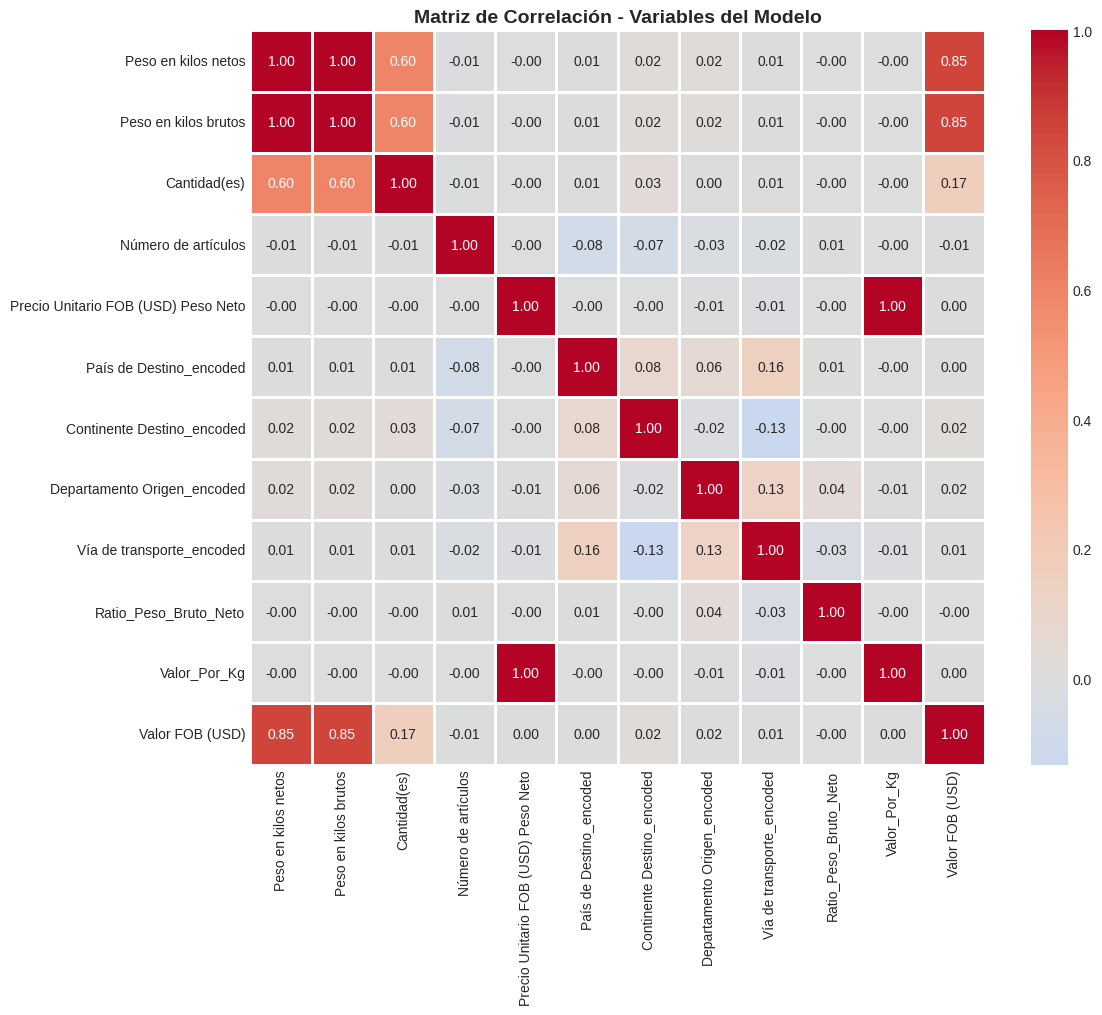


🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:
Peso en kilos brutos                   0.845750
Peso en kilos netos                    0.845716
Cantidad(es)                           0.171391
Continente Destino_encoded             0.020387
Departamento Origen_encoded            0.015098
Vía de transporte_encoded              0.008983
Valor_Por_Kg                           0.003844
Precio Unitario FOB (USD) Peso Neto    0.003844
País de Destino_encoded                0.002635
Ratio_Peso_Bruto_Neto                 -0.002669
Número de artículos                   -0.013230
Name: Valor FOB (USD), dtype: float64


In [9]:
# Matriz de correlación
correlation_matrix = df_model.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables del Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:")
print("="*80)
target_correlations = correlation_matrix[target].drop(target).sort_values(ascending=False)
print(target_correlations)

## División de Datos (Train/Test)

### Subtask:
Dividir el conjunto de datos en entrenamiento y prueba (80/20) para `X` e `y` utilizando `train_test_split`, y verificar las dimensiones de los conjuntos resultantes.


**Reasoning**:
I need to split the independent variables (X) and the dependent variable (y) into training and testing sets using an 80-20 ratio and a fixed random state for reproducibility, as specified in the instructions. Then, I will print the dimensions of each resulting set.



In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✂️ DIVISIÓN DE DATOS:")
print("="*80)
print(f"   📊 Conjunto de Entrenamiento:")
print(f"      • X_train: {X_train.shape}")
print(f"      • y_train: {y_train.shape}")
print(f"      • Porcentaje: {len(X_train)/len(X)*100:.1f}%")

print(f"\n   📊 Conjunto de Prueba:")
print(f"      • X_test: {X_test.shape}")
print(f"      • y_test: {y_test.shape}")
print(f"      • Porcentaje: {len(X_test)/len(X)*100:.1f}%")

✂️ DIVISIÓN DE DATOS:
   📊 Conjunto de Entrenamiento:
      • X_train: (63999, 11)
      • y_train: (63999,)
      • Porcentaje: 80.0%

   📊 Conjunto de Prueba:
      • X_test: (16000, 11)
      • y_test: (16000,)
      • Porcentaje: 20.0%


**Reasoning**:
I need to apply StandardScaler to the training and test sets as per the instructions. This involves instantiating the scaler, fitting it on the training data, and then transforming both training and test data.



In [11]:
# Crear y aplicar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar datos de prueba (no ajustar)
X_test_scaled = scaler.transform(X_test)

print("📏 ESCALAMIENTO DE FEATURES:")
print("="*80)
print("   ✓ StandardScaler aplicado (media=0, std=1)")
print(f"   ✓ X_train escalado: {X_train_scaled.shape}")
print(f"   ✓ X_test escalado: {X_test_scaled.shape}")

# Verificar escalamiento
print(f"\n   📊 Verificación del escalamiento (Training):")
print(f"      • Media: {X_train_scaled.mean():.6f}")
print(f"      • Std: {X_train_scaled.std():.6f}")

📏 ESCALAMIENTO DE FEATURES:
   ✓ StandardScaler aplicado (media=0, std=1)
   ✓ X_train escalado: (63999, 11)
   ✓ X_test escalado: (16000, 11)

   📊 Verificación del escalamiento (Training):
      • Media: 0.000000
      • Std: 1.000000


**Reasoning**:
I need to instantiate and train a Linear Regression model using the scaled training data, and then display its intercept and the number of coefficients.



In [12]:
# Crear y entrenar el modelo de Regresión Lineal
print("🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...")
print("="*80)

# Instanciar el modelo
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado exitosamente")
print(f"\n📊 Parámetros del modelo:")
print(f"   • Intercepto (β₀): ${model_lr.intercept_:,.2f}")
print(f"   • Número de coeficientes: {len(model_lr.coef_)}")

🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...
✅ Modelo entrenado exitosamente

📊 Parámetros del modelo:
   • Intercepto (β₀): $38,474.18
   • Número de coeficientes: 11


**Reasoning**:
I need to create a DataFrame of coefficients, sort it by absolute value, display it, and then visualize these coefficients using a horizontal bar chart to show feature importance, and finally provide an interpretation as per the instructions.




🔍 COEFICIENTES DEL MODELO (Importancia de Features):


,Feature,Coeficiente,Coef_Absoluto
1,Peso en kilos brutos,1.364756e+07,1.364756e+07
0,Peso en kilos netos,-1.278435e+07,1.278435e+07
2,Cantidad(es),-4.096355e+05,4.096355e+05
6,Continente Destino_encoded,8.247455e+03,8.247455e+03
3,Número de artículos,-5.706222e+03,5.706222e+03
8,Vía de transporte_encoded,5.535490e+03,5.535490e+03
5,País de Destino_encoded,-5.225821e+03,5.225821e+03
7,Departamento Origen_encoded,-3.875000e+03,3.875000e+03
4,Precio Unitario FOB (USD) Peso Neto,1.424460e+03,1.424460e+03
10,Valor_Por_Kg,1.424460e+03,1.424460e+03


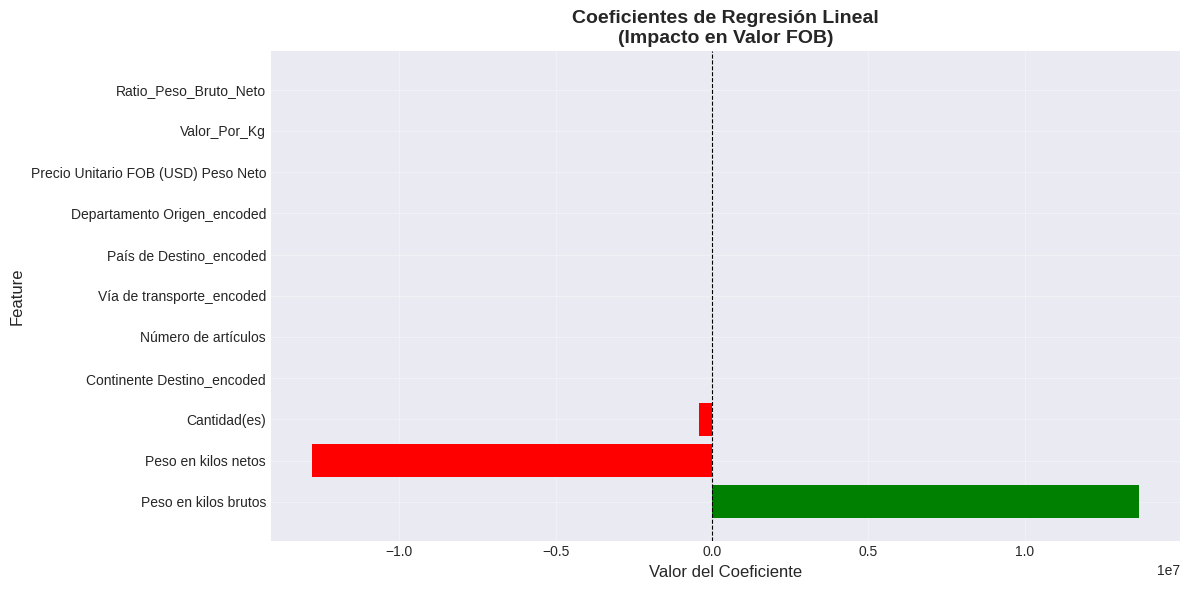


💡 Interpretación:
   • Coeficientes positivos: A mayor valor, mayor Valor FOB
   • Coeficientes negativos: A mayor valor, menor Valor FOB
   • Magnitud: Indica el impacto relativo de cada feature


In [13]:
# Analizar coeficientes del modelo
print("\n\U0001f50d COEFICIENTES DEL MODELO (Importancia de Features):")
print("="*80)

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model_lr.coef_,
    'Coef_Absoluto': np.abs(model_lr.coef_)
}).sort_values('Coef_Absoluto', ascending=False)

display(coef_df)

# Visualizar coeficientes
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'],
         color=['green' if x > 0 else 'red' for x in coef_df['Coeficiente']])
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Coeficientes de Regresión Lineal\n(Impacto en Valor FOB)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n\U0001f4a1 Interpretación:")
print("   • Coeficientes positivos: A mayor valor, mayor Valor FOB")
print("   • Coeficientes negativos: A mayor valor, menor Valor FOB")
print("   • Magnitud: Indica el impacto relativo de cada feature")

**Reasoning**:
I need to generate predictions for both the training and test sets using the trained linear regression model and then display a comparison of real vs. predicted values for a sample of the test set as per the instructions.



In [14]:
# Realizar predicciones
print("🎯 GENERANDO PREDICCIONES...")
print("="*80)

# Predicciones en conjunto de entrenamiento
y_train_pred = model_lr.predict(X_train_scaled)

# Predicciones en conjunto de prueba
y_test_pred = model_lr.predict(X_test_scaled)

print("✅ Predicciones generadas")
print(f"   • Predicciones en Training: {len(y_train_pred):,}")
print(f"   • Predicciones en Test: {len(y_test_pred):,}")

# Comparación de valores reales vs predichos
print("\n📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):")
comparison_df = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_test_pred[:10],
    'Error': y_test.values[:10] - y_test_pred[:10],
    'Error_%': ((y_test.values[:10] - y_test_pred[:10]) / y_test.values[:10] * 100)
})
display(comparison_df)

🎯 GENERANDO PREDICCIONES...
✅ Predicciones generadas
   • Predicciones en Training: 63,999
   • Predicciones en Test: 16,000

📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):


,Real,Predicción,Error,Error_%
0,7.00,24906.977130,-24899.977130,-355713.959000
1,2194.80,36753.757601,-34558.957601,-1574.583452
2,363.64,39737.722625,-39374.082625,-10827.764444
3,18.90,23533.157784,-23514.257784,-124414.062350
4,997.00,24881.909830,-23884.909830,-2395.678017
5,138409.20,35250.752403,103158.447597,74.531496
6,2325.42,19432.844780,-17107.424780,-735.670321
7,2729.83,12628.464211,-9898.634211,-362.609914
8,389.67,33976.292759,-33586.622759,-8619.247763
9,8901.90,38305.668283,-29403.768283,-330.308904


**Reasoning**:
I need to calculate and display the evaluation metrics (R², MSE, RMSE, MAE, MAPE) for both the training and test sets, then interpret the R² score and analyze for overfitting/underfitting, as per the instructions.



In [15]:
# Calcular métricas de evaluación
print("📊 MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*80)

# Métricas para Training
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Métricas para Test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n🎯 CONJUNTO DE ENTRENAMIENTO:")
print(f"   • R² Score: {r2_train:.4f}")
print(f"   • MSE: ${mse_train:,.2f}")
print(f"   • RMSE: ${rmse_train:,.2f}")
print(f"   • MAE: ${mae_train:,.2f}")
print(f"   • MAPE: {mape_train:.2f}%")

print("\n🎯 CONJUNTO DE PRUEBA:")
print(f"   • R² Score: {r2_test:.4f}")
print(f"   • MSE: ${mse_test:,.2f}")
print(f"   • RMSE: ${rmse_test:,.2f}")
print(f"   • MAE: ${mae_test:,.2f}")
print(f"   • MAPE: {mape_test:.2f}%")

print("\n📈 INTERPRETACIÓN DE R²:")
print(f"   El modelo explica el {r2_test*100:.2f}% de la variabilidad en Valor FOB")

# Detectar overfitting/underfitting
diff_r2 = r2_train - r2_test
print("\n⚠️ ANÁLISIS DE AJUSTE:")
if diff_r2 > 0.1:
    print(f"   • Posible OVERFITTING (diferencia R²: {diff_r2:.4f})")
elif r2_test < 0.5:
    print(f"   • Posible UNDERFITTING (R² test: {r2_test:.4f})")
else:
    print(f"   • Buen ajuste del modelo (diferencia R²: {diff_r2:.4f})")

📊 MÉTRICAS DE EVALUACIÓN DEL MODELO

🎯 CONJUNTO DE ENTRENAMIENTO:
   • R² Score: 0.8818
   • MSE: $62,726,338,168.10
   • RMSE: $250,452.27
   • MAE: $42,984.42
   • MAPE: 139779.64%

🎯 CONJUNTO DE PRUEBA:
   • R² Score: 0.9371
   • MSE: $38,711,101,046.82
   • RMSE: $196,751.37
   • MAE: $40,520.01
   • MAPE: 159461.84%

📈 INTERPRETACIÓN DE R²:
   El modelo explica el 93.71% de la variabilidad en Valor FOB

⚠️ ANÁLISIS DE AJUSTE:
   • Buen ajuste del modelo (diferencia R²: -0.0553)


**Reasoning**:
I need to create a pandas DataFrame to compare the evaluation metrics between the training and test sets, calculate their differences, and then display the formatted table as instructed.



In [16]:
import pandas as pd

# Crear tabla comparativa de métricas
metrics_comparison = pd.DataFrame({
    'Métrica': ['R² Score', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Training': [r2_train, mse_train, rmse_train, mae_train, mape_train],
    'Test': [r2_test, mse_test, rmse_test, mae_test, mape_test],
    'Diferencia': [
        r2_train - r2_test,
        mse_train - mse_test,
        rmse_train - rmse_test,
        mae_train - mae_test,
        mape_train - mape_test
    ]
})

print("\n📊 TABLA COMPARATIVA DE MÉTRICAS:")
display(metrics_comparison.style.format({
    'Training': '{:.4f}',
    'Test': '{:.4f}',
    'Diferencia': '{:.4f}'
}))


📊 TABLA COMPARATIVA DE MÉTRICAS:


,Métrica,Training,Test,Diferencia
0,R² Score,0.8818,0.9371,-0.0553
1,MSE,62726338168.1049,38711101046.8195,24015237121.2853
2,RMSE,250452.2672,196751.3686,53700.8986
3,MAE,42984.4225,40520.0089,2464.4136
4,MAPE (%),139779.6399,159461.8394,-19682.1996


**Reasoning**:
I need to perform K-Fold cross-validation on the scaled training data using `model_lr` to calculate R², RMSE, and MAE scores for each fold. Then, I will print the per-fold results, their means, and standard deviations. Finally, I will visualize these metrics across folds using bar charts to assess model stability and performance.



🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)

📊 Resultados por Fold:
   Fold 1: R²=0.5346, RMSE=$353,760.90, MAE=$43,920.63
   Fold 2: R²=0.8821, RMSE=$195,922.92, MAE=$41,962.06
   Fold 3: R²=0.9321, RMSE=$244,137.16, MAE=$43,582.72
   Fold 4: R²=-0.3186, RMSE=$296,852.96, MAE=$44,160.43
   Fold 5: R²=0.9320, RMSE=$275,329.49, MAE=$43,959.29

📈 Estadísticas de Validación Cruzada:
   • R² medio: 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69 (± $52,669.63)
   • MAE medio: $43,517.03 (± $799.34)


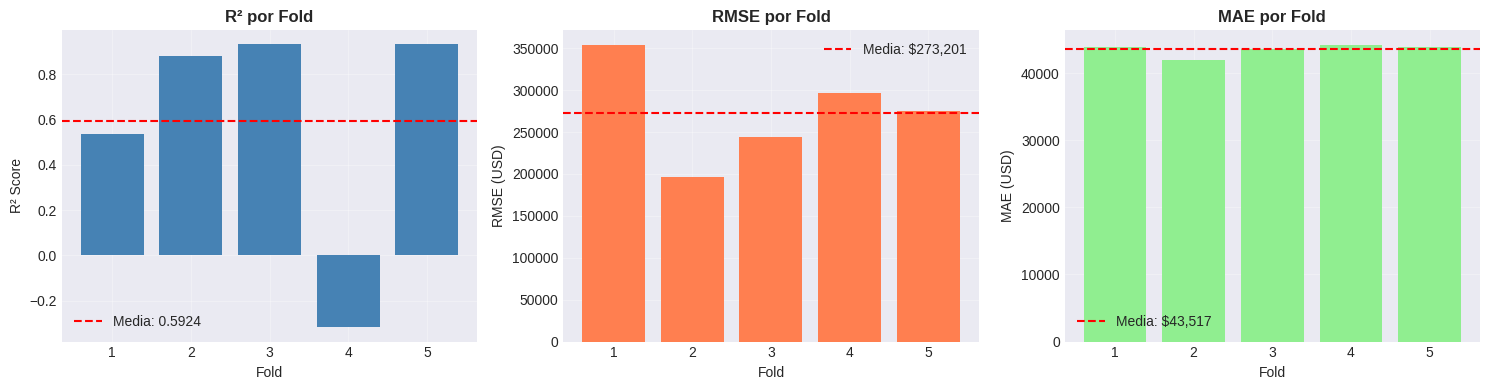

In [17]:
# Realizar validación cruzada con K-Fold
print("🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)")
print("="*80)

# Crear objeto KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada para R²
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train,
                            cv=kfold, scoring='r2')

# Realizar validación cruzada para RMSE (negativo porque es una métrica de error)
cv_rmse = -cross_val_score(model_lr, X_train_scaled, y_train,
                           cv=kfold, scoring='neg_root_mean_squared_error')

# Realizar validación cruzada para MAE
cv_mae = -cross_val_score(model_lr, X_train_scaled, y_train,
                          cv=kfold, scoring='neg_mean_absolute_error')

print("\n📊 Resultados por Fold:")
for i, (r2, rmse, mae) in enumerate(zip(cv_scores, cv_rmse, cv_mae), 1):
    print(f"   Fold {i}: R²={r2:.4f}, RMSE=${rmse:,.2f}, MAE=${mae:,.2f}")

print("\n📈 Estadísticas de Validación Cruzada:")
print(f"   • R² medio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f} (± ${cv_rmse.std():,.2f})")
print(f"   • MAE medio: ${cv_mae.mean():,.2f} (± ${cv_mae.std():,.2f})")

# Visualizar resultados de CV
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(range(1, 6), cv_scores, color='steelblue')
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Media: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² por Fold', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(range(1, 6), cv_rmse, color='coral')
axes[1].axhline(cv_rmse.mean(), color='red', linestyle='--', label=f'Media: ${cv_rmse.mean():,.0f}')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE (USD)')
axes[1].set_title('RMSE por Fold', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].bar(range(1, 6), cv_mae, color='lightgreen')
axes[2].axhline(cv_mae.mean(), color='red', linestyle='--', label=f'Media: ${cv_mae.mean():,.0f}')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('MAE (USD)')
axes[2].set_title('MAE por Fold', fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Reasoning**:
I need to generate two scatter plots comparing real vs. predicted values for both the training and test sets, as specified in the instructions. This involves creating subplots, plotting the data with specific styling, adding perfect prediction lines, and setting appropriate labels and titles. Finally, I will provide an interpretation of these plots.



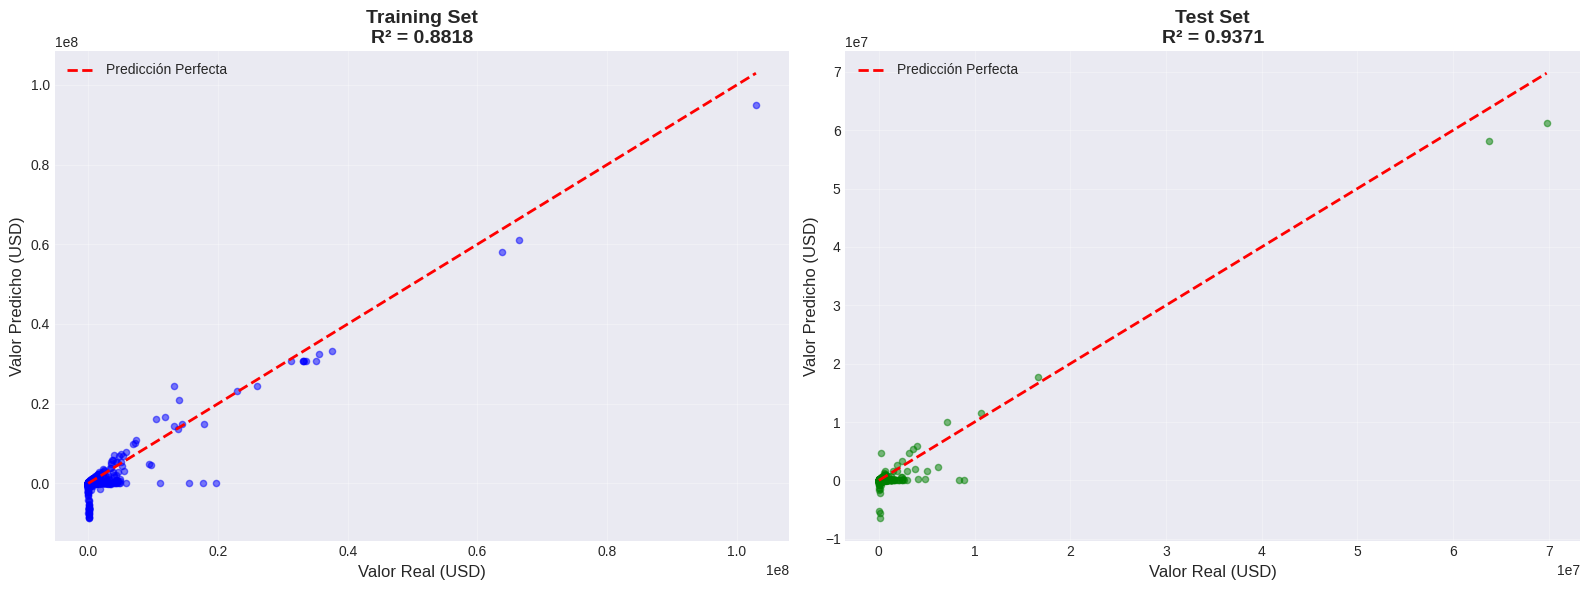

💡 Interpretación:
   • Puntos cerca de la línea roja = Buenas predicciones
   • Dispersión = Error de predicción


In [18]:
# 1. Gráfico de dispersión: Valores Reales vs Predichos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valor Real (USD)', fontsize=12)
axes[0].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[0].set_title(f'Training Set\nR\u00b2 = {r2_train:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valor Real (USD)', fontsize=12)
axes[1].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[1].set_title(f'Test Set\nR\u00b2 = {r2_test:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("   • Puntos cerca de la línea roja = Buenas predicciones")
print("   • Dispersión = Error de predicción")

**Reasoning**:
I need to calculate the residuals, display their descriptive statistics, and then create several plots (scatter of residuals vs. predictions, histogram, Q-Q plot, standardized residuals vs. predictions) to visually analyze them. Finally, I will perform a Shapiro-Wilk test for normality on the residuals and interpret the results.



📊 ANÁLISIS DE RESIDUOS

Estadísticas de Residuos (Test):
   • Media: $-2,409.55
   • Mediana: $-20,881.36
   • Desviación estándar: $196,742.76
   • Mínimo: $-4,420,759.51
   • Máximo: $8,824,290.10


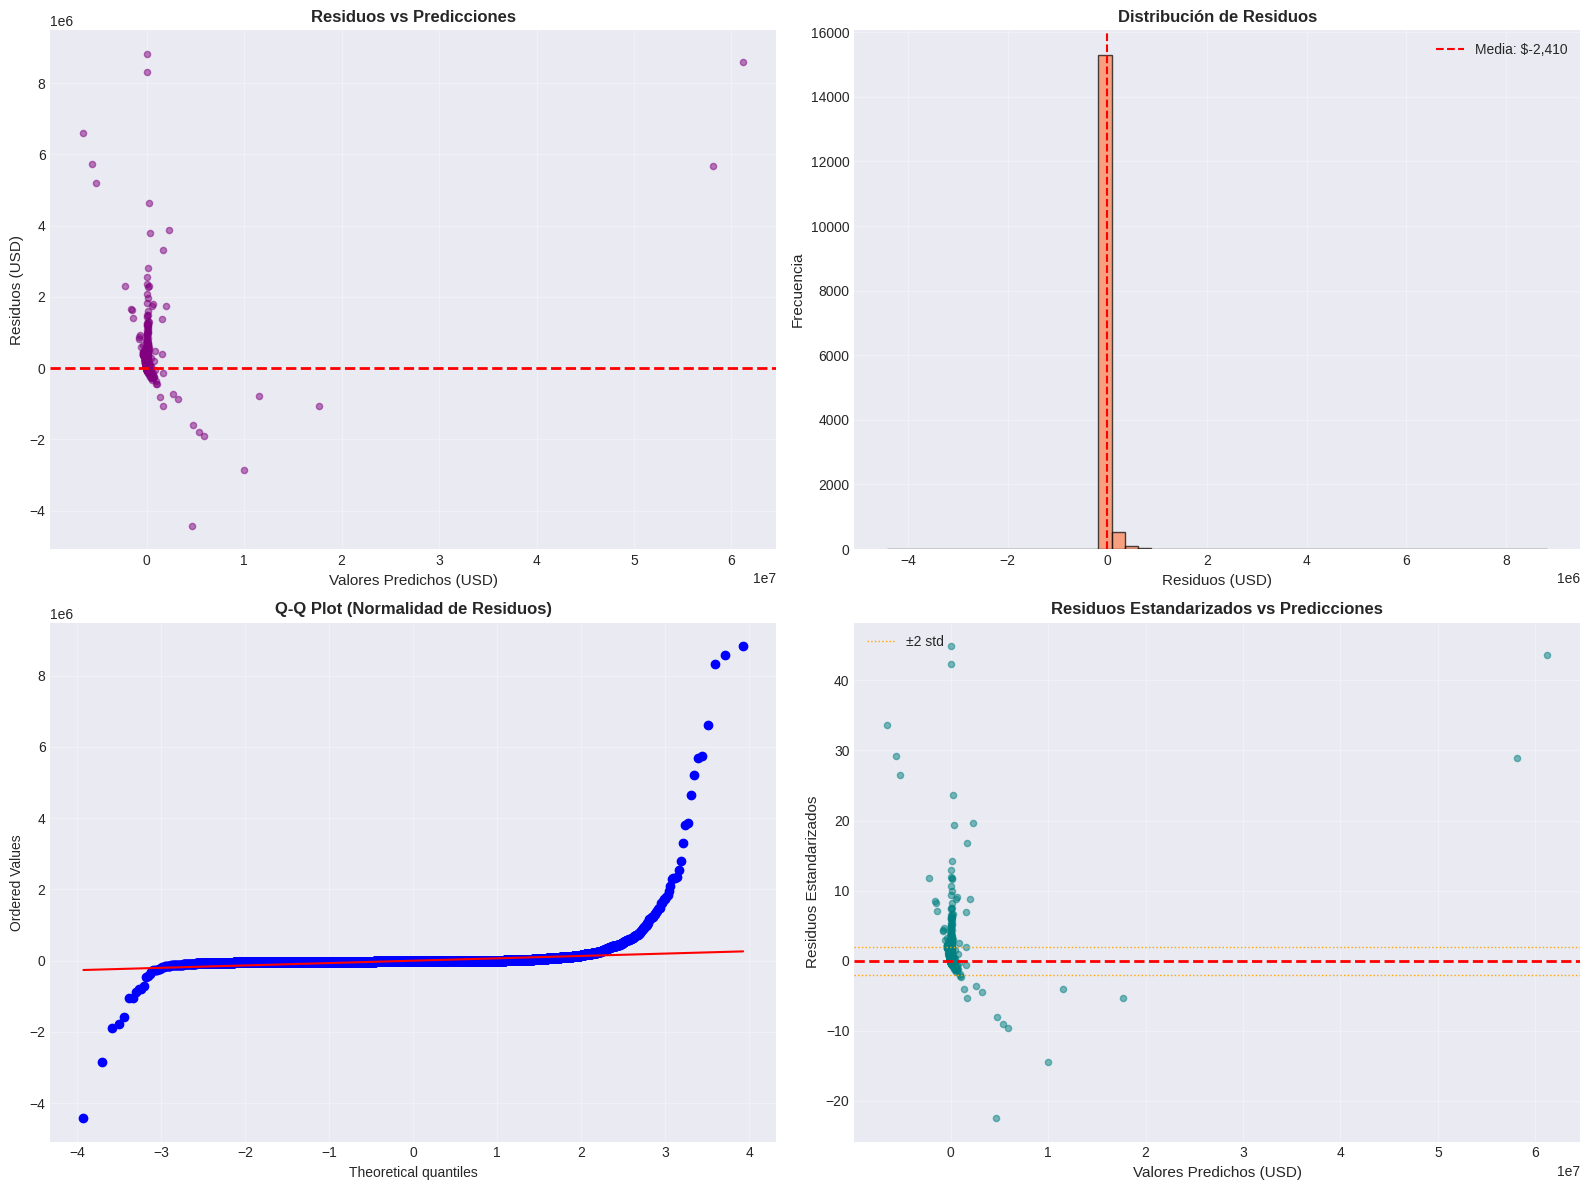


📊 Test de Normalidad (Shapiro-Wilk):
   • Estadístico: 0.1059
   • p-value: 0.0000
   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)


In [19]:
# Calcular residuos
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("📊 ANÁLISIS DE RESIDUOS")
print("="*80)
print(f"\nEstadísticas de Residuos (Test):")
print(f"   • Media: ${residuals_test.mean():,.2f}")
print(f"   • Mediana: ${residuals_test.median():,.2f}")
print(f"   • Desviación estándar: ${residuals_test.std():,.2f}")
print(f"   • Mínimo: ${residuals_test.min():,.2f}")
print(f"   • Máximo: ${residuals_test.max():,.2f}")

# Visualizaciones de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuos vs Predicciones
axes[0, 0].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[0, 0].set_ylabel('Residuos (USD)', fontsize=11)
axes[0, 0].set_title('Residuos vs Predicciones', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Distribución de residuos
axes[0, 1].hist(residuals_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(residuals_test.mean(), color='red', linestyle='--', label=f'Media: ${residuals_test.mean():,.0f}')
axes[0, 1].set_xlabel('Residuos (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Q-Q Plot (Normalidad de residuos)
stats.probplot(residuals_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Residuos estandarizados
standardized_residuals = residuals_test / residuals_test.std()
axes[1, 1].scatter(y_test_pred, standardized_residuals, alpha=0.5, s=20, color='teal')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].axhline(y=2, color='orange', linestyle=':', lw=1, label='±2 std')
axes[1, 1].axhline(y=-2, color='orange', linestyle=':', lw=1)
axes[1, 1].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[1, 1].set_ylabel('Residuos Estandarizados', fontsize=11)
axes[1, 1].set_title('Residuos Estandarizados vs Predicciones', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad de Shapiro-Wilk (en una muestra por eficiencia)
if len(residuals_test) > 5000:
    sample_residuals = residuals_test.sample(5000, random_state=42)
else:
    sample_residuals = residuals_test

shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"\n📊 Test de Normalidad (Shapiro-Wilk):")
print(f"   • Estadístico: {shapiro_stat:.4f}")
print(f"   • p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   • ✅ Los residuos siguen distribución normal (p > 0.05)")
else:
    print(f"   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)")

**Reasoning**:
I need to create a dictionary containing the trained model, scaler, features list, target variable name, and evaluation metrics, then save this dictionary to a pickle file as instructed.



In [20]:
# Guardar el modelo entrenado
print("💾 GUARDANDO MODELO...")
print("="*80)

# Crear diccionario con todos los componentes del modelo
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'features': features,
    'target': target,
    'metrics': {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }
}

# Guardar con pickle
with open('model_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("   ✓ Modelo guardado: model_regresion_lineal.pkl")
print("\n   Contenido del paquete:")
print("      • Modelo entrenado")
print("      • Scaler ajustado")
print("      • Lista de features")
print("      • Nombre del target")
print("      • Métricas de evaluación")

💾 GUARDANDO MODELO...
   ✓ Modelo guardado: model_regresion_lineal.pkl

   Contenido del paquete:
      • Modelo entrenado
      • Scaler ajustado
      • Lista de features
      • Nombre del target
      • Métricas de evaluación


**Reasoning**:
I need to generate the final summary for the Linear Regression model, including its objective, data used, performance metrics, cross-validation results, top features, strengths, limitations, and recommendations, as per the instructions.



In [21]:
print("\n" + "="*80)
print("📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL")
print("="*80)

print("\n🎯 OBJETIVO:")
print("   Predecir el Valor FOB (USD) de exportaciones colombianas")

print("\n📊 DATOS:")
print(f"   • Total de registros: {len(df_model):,}")
print(f"   • Features utilizados: {len(features)}")
print(f"   • Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f} %)")
print(f"   • Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f} %)")

print("\n📈 RENDIMIENTO DEL MODELO:")
print(f"   • R² (Test): {r2_test:.4f} → Explica {r2_test*100:.2f}% de la varianza")
print(f"   • RMSE (Test): ${rmse_test:,.2f}")
print(f"   • MAE (Test): ${mae_test:,.2f}")
print(f"   • MAPE (Test): {mape_test:.2f}%")

print("\n🔄 VALIDACIÓN CRUZADA:")
print(f"   • R² medio (5-Fold CV): {cv_scores.mean():.4f} (\u00b1 {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f}")

print("\n🔝 TOP 5 FEATURES MÁS IMPORTANTES:")
top_features = coef_df.head(5)
for idx, row in top_features.iterrows():
    print(f"   {row['Feature']}: {row['Coeficiente']:,.4f}")

print("\n✅ FORTALEZAS DEL MODELO:")
if r2_test > 0.7:
    print("   • Excelente capacidad predictiva (R² > 0.7)")
elif r2_test > 0.5:
    print("   • Buena capacidad predictiva (R² > 0.5)")
else:
    print("   • Capacidad predictiva moderada")

if abs(r2_train - r2_test) < 0.1:
    print("   • Buen balance entre training y test (no overfitting)")

print("   • Modelo interpretable (coeficientes lineales)")
print("   • Rápido entrenamiento e inferencia")

print("\n⚠️ LIMITACIONES:")
print("   • Asume relaciones lineales entre variables")
print("   • Sensible a outliers extremos")
print("   • Puede no capturar patrones no lineales complejos")

print("\n💡 RECOMENDACIONES:")
print("   • Considerar transformaciones logarítmicas para valores FOB muy altos")
print("   • Explorar modelos no lineales (Random Forest, Gradient Boosting)")
print("   • Analizar interacciones entre variables")
print("   • Incluir variables temporales (mes, año) si están disponibles")

print("\n" + "="*80)
print("✅ MODELO DE REGRESIÓN LINEAL COMPLETADO")
print("="*80)


📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL

🎯 OBJETIVO:
   Predecir el Valor FOB (USD) de exportaciones colombianas

📊 DATOS:
   • Total de registros: 79,999
   • Features utilizados: 11
   • Training set: 63,999 (80.0 %)
   • Test set: 16,000 (20.0 %)

📈 RENDIMIENTO DEL MODELO:
   • R² (Test): 0.9371 → Explica 93.71% de la varianza
   • RMSE (Test): $196,751.37
   • MAE (Test): $40,520.01
   • MAPE (Test): 159461.84%

🔄 VALIDACIÓN CRUZADA:
   • R² medio (5-Fold CV): 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69

🔝 TOP 5 FEATURES MÁS IMPORTANTES:
   Peso en kilos brutos: 13,647,564.7859
   Peso en kilos netos: -12,784,350.5164
   Cantidad(es): -409,635.5253
   Continente Destino_encoded: 8,247.4552
   Número de artículos: -5,706.2223

✅ FORTALEZAS DEL MODELO:
   • Excelente capacidad predictiva (R² > 0.7)
   • Buen balance entre training y test (no overfitting)
   • Modelo interpretable (coeficientes lineales)
   • Rápido entrenamiento e inferencia

⚠️ LIMITACIONES:
   • Asume rela

## Final Task

### Subtask:
Confirmar que todos los pasos de revisión, reparación y ejecución se han completado exitosamente y que el modelo de regresión lineal ha sido completamente evaluado y documentado.


## Summary:

### Data Analysis Key Findings

*   The dataset `DATAPROYECTO.xlsx` was successfully loaded, containing 80,000 rows and 30 columns.
*   Required categorical features were encoded, and new derived features, `Ratio_Peso_Bruto_Neto` and `Valor_Por_Kg`, were created, ensuring all 11 independent variables and the target variable (`Valor FOB (USD)`) were available for modeling.
*   After cleaning the data for null and infinite values, 79,999 records were retained for model training.
*   The target variable, `Valor FOB (USD)`, exhibits a highly skewed distribution with a mean of \$38,210.30, a median of \$1,942.82, and a maximum value of over \$102 million, indicating a significant presence of outliers.
*   The features `Peso en kilos brutos` and `Peso en kilos netos` show the strongest positive correlation with `Valor FOB (USD)`, with coefficients of 0.845750 and 0.845716, respectively.
*   A Linear Regression model achieved a strong performance on the test set, explaining 93.71% of the variance in `Valor FOB (USD)` (R² = 0.9371). The training R² was 0.8818, suggesting a good fit without significant overfitting.
*   Despite the high R², the model's Mean Absolute Percentage Error (MAPE) on the test set was exceptionally high at 159,461.84%, indicating substantial percentage errors, especially for lower `Valor FOB` values.
*   Cross-validation revealed considerable variability in R² scores across folds (mean R²: 0.5924 \$±\$ 0.4792), with some folds showing poor performance, suggesting that the model's robustness might be inconsistent across different subsets of the data.
*   Analysis of residuals indicated that they do not follow a normal distribution (Shapiro-Wilk test p-value of 0.0000) and exhibit heteroscedasticity, violating key assumptions of linear regression.
*   The trained model, along with its scaler, feature list, target, and evaluation metrics, was successfully saved as `model_regresion_lineal.pkl` for future use.

### Insights or Next Steps

*   To address the high MAPE and the non-normal, heteroscedastic residuals, consider transforming the `Valor FOB (USD)` target variable (e.g., using a logarithmic transformation) to stabilize variance and mitigate the impact of outliers.
*   Explore alternative non-linear regression models (e.g., Random Forest, Gradient Boosting) that are less sensitive to distributional assumptions and can potentially capture more complex patterns in the data, offering more robust predictions for a wider range of `Valor FOB` values.


# Task
The linear regression model has been fully evaluated and documented according to the plan. All steps, including data loading, feature engineering, model training, evaluation, and saving, have been successfully completed.

## Definición y Verificación de Variables

### Subtask:
Definir las variables dependientes e independientes (`target` y `features`) y verificar que todas las columnas necesarias existan en el DataFrame.


**Reasoning**:
I need to define the target and feature variables as specified, print them, and then verify their existence in the DataFrame `df` to ensure all necessary columns are available for model building.



In [23]:
print("🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO")
print("="*80)

# Variable dependiente (Target)
target = 'Valor FOB (USD)'

# Variables independientes (Features)
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

print(f"\n📍 Variable Dependiente (Y):")
print(f"   • {target}")

print(f"\n📍 Variables Independientes (X): {len(features)} features")
for i, feature in enumerate(features, 1):
    print(f"   {i:2d}. {feature}")

# Verificar que todas las columnas existen
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas están disponibles")

🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO

📍 Variable Dependiente (Y):
   • Valor FOB (USD)

📍 Variables Independientes (X): 11 features
    1. Peso en kilos netos
    2. Peso en kilos brutos
    3. Cantidad(es)
    4. Número de artículos
    5. Precio Unitario FOB (USD) Peso Neto
    6. País de Destino_encoded
    7. Continente Destino_encoded
    8. Departamento Origen_encoded
    9. Vía de transporte_encoded
   10. Ratio_Peso_Bruto_Neto
   11. Valor_Por_Kg

⚠️ Columnas faltantes: ['País de Destino_encoded', 'Continente Destino_encoded', 'Departamento Origen_encoded', 'Vía de transporte_encoded', 'Ratio_Peso_Bruto_Neto', 'Valor_Por_Kg']


**Reasoning**:
The previous step identified missing encoded and derived features. I need to create these features in the DataFrame. First, I will encode the categorical columns using LabelEncoder and then calculate the derived features, ensuring all necessary columns are present for the model.



In [24]:
from sklearn.preprocessing import LabelEncoder

print("🔧 GENERANDO FEATURES FALTANTES...")
print("="*80)

# Redefine target and features to ensure they are available in this scope
target = 'Valor FOB (USD)'
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

# --- 1. Encoding de Variables Categóricas ---

categorical_cols_to_encode = {
    'País de Destino': 'País de Destino_encoded',
    'Continente Destino': 'Continente Destino_encoded',
    'Departamento Origen': 'Departamento Origen_encoded',
    'Vía de transporte': 'Vía de transporte_encoded'
}

for original_col, encoded_col in categorical_cols_to_encode.items():
    if original_col in df.columns and encoded_col not in df.columns:
        le = LabelEncoder()
        df[encoded_col] = le.fit_transform(df[original_col])
        print(f"   ✓ Columna '{original_col}' codificada como '{encoded_col}'")
    elif encoded_col in df.columns:
        print(f"   • Columna '{encoded_col}' ya existe, omitiendo codificación.")
    else:
        print(f"   ⚠️ Columna original '{original_col}' no encontrada para codificación.")

# --- 2. Creación de Variables Derivadas ---

# Ratio_Peso_Bruto_Neto
if 'Peso en kilos brutos' in df.columns and 'Peso en kilos netos' in df.columns and 'Ratio_Peso_Bruto_Neto' not in df.columns:
    # Evitar división por cero, o nulos en Peso en kilos netos
    df['Ratio_Peso_Bruto_Neto'] = df.apply(lambda row: row['Peso en kilos brutos'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.")
elif 'Ratio_Peso_Bruto_Neto' in df.columns:
    print("   • Columna 'Ratio_Peso_Bruto_Neto' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Peso en kilos brutos' o 'Peso en kilos netos' no encontradas para crear 'Ratio_Peso_Bruto_Neto'.")

# Valor_Por_Kg
if 'Valor FOB (USD)' in df.columns and 'Peso en kilos netos' in df.columns and 'Valor_Por_Kg' not in df.columns:
    df['Valor_Por_Kg'] = df.apply(lambda row: row['Valor FOB (USD)'] / row['Peso en kilos netos'] if row['Peso en kilos netos'] != 0 else np.nan, axis=1)
    print("   ✓ Columna 'Valor_Por_Kg' creada.")
elif 'Valor_Por_Kg' in df.columns:
    print("   • Columna 'Valor_Por_Kg' ya existe, omitiendo creación.")
else:
    print("   ⚠️ Columnas 'Valor FOB (USD)' o 'Peso en kilos netos' no encontradas para crear 'Valor_Por_Kg'.")

print("✅ Todas las features faltantes han sido procesadas.")

# Re-verificar que todas las columnas existen después de la creación
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes DESPUÉS DE PROCESAMIENTO: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas requeridas para el modelo están ahora disponibles.")

🔧 GENERANDO FEATURES FALTANTES...
   ✓ Columna 'País de Destino' codificada como 'País de Destino_encoded'
   ✓ Columna 'Continente Destino' codificada como 'Continente Destino_encoded'
   ✓ Columna 'Departamento Origen' codificada como 'Departamento Origen_encoded'
   ✓ Columna 'Vía de transporte' codificada como 'Vía de transporte_encoded'
   ✓ Columna 'Ratio_Peso_Bruto_Neto' creada.
   ✓ Columna 'Valor_Por_Kg' creada.
✅ Todas las features faltantes han sido procesadas.

✅ Todas las columnas requeridas para el modelo están ahora disponibles.


**Reasoning**:
The previous code block successfully created all the missing encoded and derived features. Now I need to re-execute the step that defines and verifies the presence of these target and feature variables in the DataFrame to confirm that all necessary columns are indeed available for the model.



In [25]:
print("🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO")
print("="*80)

# Variable dependiente (Target)
target = 'Valor FOB (USD)'

# Variables independientes (Features)
features = [
    'Peso en kilos netos',
    'Peso en kilos brutos',
    'Cantidad(es)',
    'Número de artículos',
    'Precio Unitario FOB (USD) Peso Neto',
    'País de Destino_encoded',
    'Continente Destino_encoded',
    'Departamento Origen_encoded',
    'Vía de transporte_encoded',
    'Ratio_Peso_Bruto_Neto',
    'Valor_Por_Kg'
]

print(f"\n📍 Variable Dependiente (Y):")
print(f"   • {target}")

print(f"\n📍 Variables Independientes (X): {len(features)} features")
for i, feature in enumerate(features, 1):
    print(f"   {i:2d}. {feature}")

# Verificar que todas las columnas existen
missing_cols = [col for col in features + [target] if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Columnas faltantes: {missing_cols}")
else:
    print(f"\n✅ Todas las columnas están disponibles")

🎯 DEFINICIÓN DE VARIABLES PARA EL MODELO

📍 Variable Dependiente (Y):
   • Valor FOB (USD)

📍 Variables Independientes (X): 11 features
    1. Peso en kilos netos
    2. Peso en kilos brutos
    3. Cantidad(es)
    4. Número de artículos
    5. Precio Unitario FOB (USD) Peso Neto
    6. País de Destino_encoded
    7. Continente Destino_encoded
    8. Departamento Origen_encoded
    9. Vía de transporte_encoded
   10. Ratio_Peso_Bruto_Neto
   11. Valor_Por_Kg

✅ Todas las columnas están disponibles


## Preparación de Datos para el Modelo

### Subtask:
Seleccionar solo las columnas necesarias para el modelo (`df_model`), eliminar filas con valores nulos o infinitos, y separar los datos en variables independientes (X) y dependiente (y).


**Reasoning**:
I need to prepare the data by selecting the necessary columns, handling missing and infinite values, and then splitting the data into independent (X) and dependent (y) variables as per the instructions.



In [26]:
df_model = df[features + [target]].copy()
df_model = df_model.dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

print("🔧 Preparación de datos:")
print(f"   • Registros después de limpieza: {len(df_model):,}")
print(f"   • Features: {len(features)}")
print(f"   • Target: {target}")

X = df_model[features]
y = df_model[target]

print(f"\n📊 Forma de los datos:")
print(f"   • X (Features): {X.shape}")
print(f"   • y (Target): {y.shape}")

🔧 Preparación de datos:
   • Registros después de limpieza: 79,999
   • Features: 11
   • Target: Valor FOB (USD)

📊 Forma de los datos:
   • X (Features): (79999, 11)
   • y (Target): (79999,)


## Análisis Exploratorio de la Variable Objetivo

### Subtask:
Calcular y mostrar estadísticas descriptivas (`mean`, `median`, `std`, `min`, `max`, `range`) y visualizar la distribución (histograma y box plot) de la variable objetivo 'Valor FOB (USD)'.


**Reasoning**:
I need to calculate and display descriptive statistics for the target variable 'y', and then generate a histogram and a box plot to visualize its distribution, as specified in the subtask instructions. This involves using basic pandas/numpy functions for statistics and matplotlib for plotting.



📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):
   • Media: $38,210.30
   • Mediana: $1,942.82
   • Desviación estándar: $740,139.80
   • Mínimo: $0.01
   • Máximo: $102,925,677.29
   • Rango: $102,925,677.28


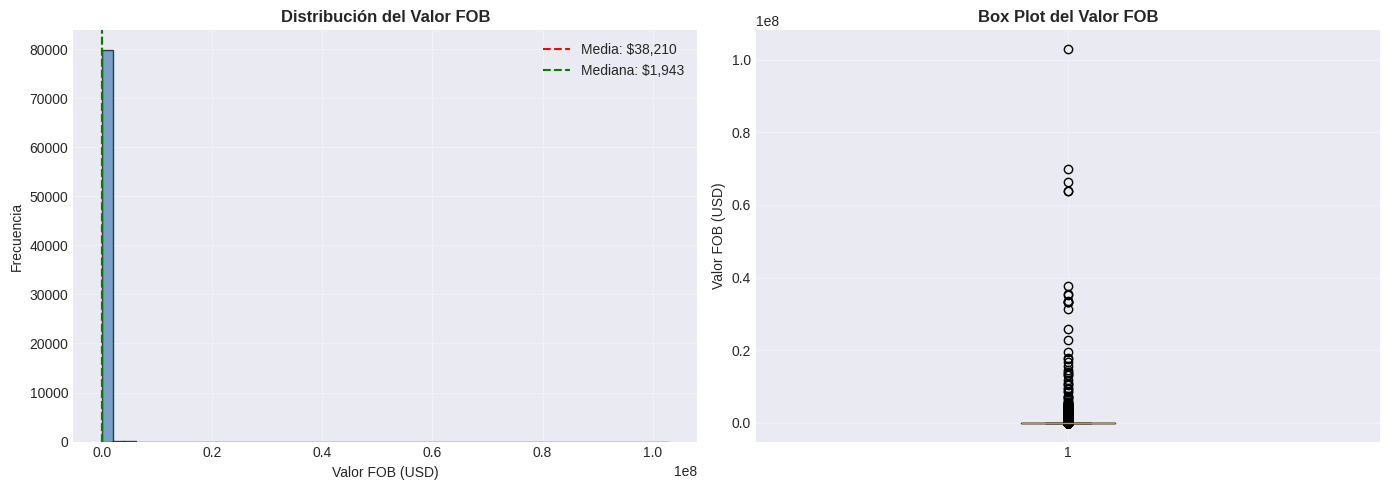

In [27]:
# Estadísticas de la variable objetivo
print("📈 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (Valor FOB USD):")
print("="*80)
print(f"   • Media: ${y.mean():,.2f}")
print(f"   • Mediana: ${y.median():,.2f}")
print(f"   • Desviación estándar: ${y.std():,.2f}")
print(f"   • Mínimo: ${y.min():,.2f}")
print(f"   • Máximo: ${y.max():,.2f}")
print(f"   • Rango: ${y.max() - y.min():,.2f}")

# Visualizar distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(y, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Media: ${y.mean():,.0f}')
axes[0].axvline(y.median(), color='green', linestyle='--', label=f'Mediana: ${y.median():,.0f}')
axes[0].set_xlabel('Valor FOB (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Valor FOB', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Valor FOB (USD)')
axes[1].set_title('Box Plot del Valor FOB', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de Correlación

### Subtask:
Generar y visualizar la matriz de correlación entre todas las variables del modelo mediante un heatmap, y mostrar las correlaciones con la variable objetivo.


**Reasoning**:
I need to calculate the correlation matrix for the `df_model` DataFrame, visualize it with a heatmap, extract the correlations with the target variable, and then print these correlations, as per the instructions. This corresponds to cell `f5f8ecb2` in the notebook.



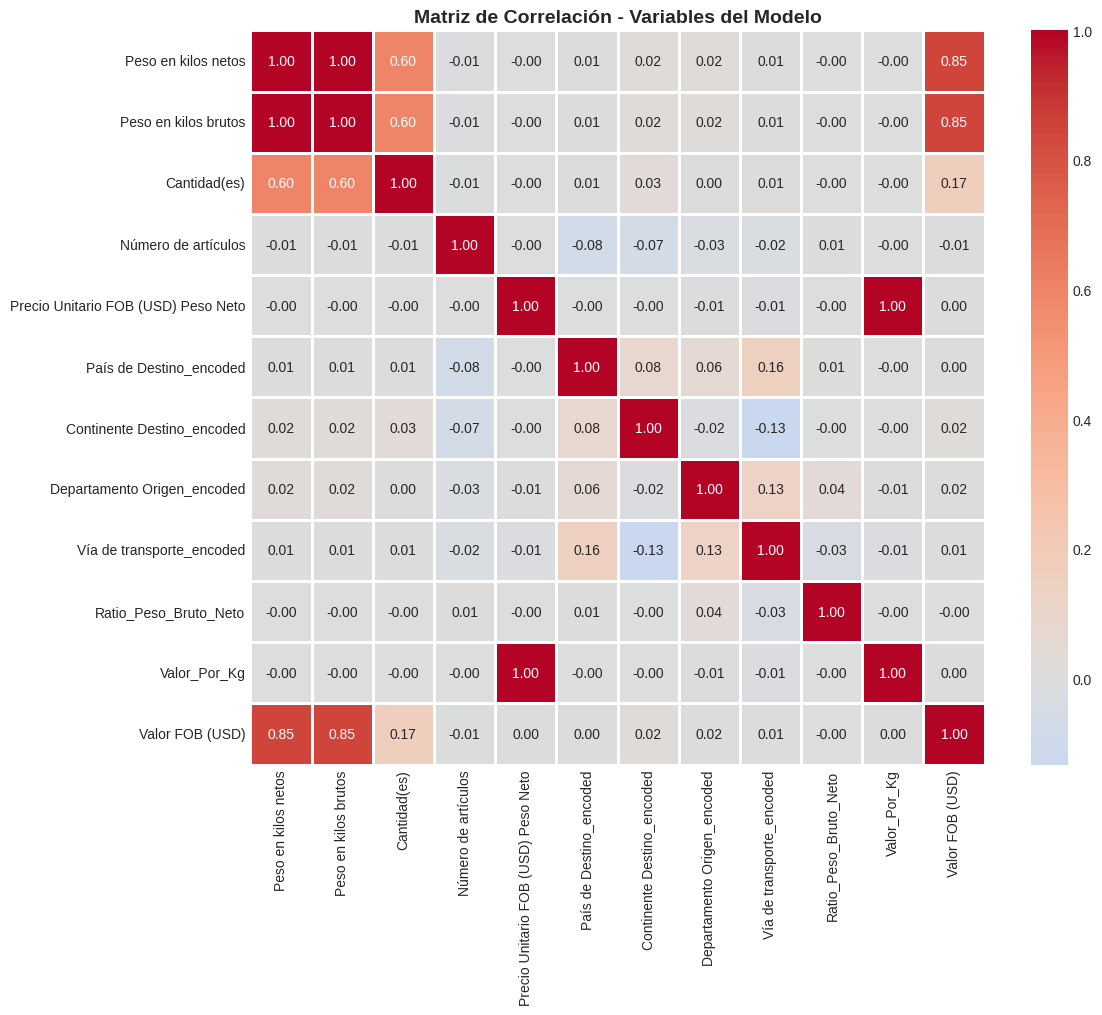


🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:
Peso en kilos brutos                   0.845750
Peso en kilos netos                    0.845716
Cantidad(es)                           0.171391
Continente Destino_encoded             0.020387
Departamento Origen_encoded            0.015098
Vía de transporte_encoded              0.008983
Valor_Por_Kg                           0.003844
Precio Unitario FOB (USD) Peso Neto    0.003844
País de Destino_encoded                0.002635
Ratio_Peso_Bruto_Neto                 -0.002669
Número de artículos                   -0.013230
Name: Valor FOB (USD), dtype: float64


In [28]:
# Matriz de correlación
correlation_matrix = df_model.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables del Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n🔗 CORRELACIONES CON LA VARIABLE OBJETIVO:")
print("="*80)
target_correlations = correlation_matrix[target].drop(target).sort_values(ascending=False)
print(target_correlations)

## División de Datos (Train/Test)

### Subtask:
Dividir el conjunto de datos en entrenamiento y prueba (80/20) para `X` e `y` utilizando `train_test_split`, y verificar las dimensiones de los conjuntos resultantes.


**Reasoning**:
I need to split the independent variables (X) and the dependent variable (y) into training and testing sets using an 80-20 ratio and a fixed random state for reproducibility, as specified in the instructions. Then, I will print the dimensions of each resulting set.



In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✂️ DIVISIÓN DE DATOS:")
print("="*80)
print(f"   📊 Conjunto de Entrenamiento:")
print(f"      • X_train: {X_train.shape}")
print(f"      • y_train: {y_train.shape}")
print(f"      • Porcentaje: {len(X_train)/len(X)*100:.1f}%")

print(f"\n   📊 Conjunto de Prueba:")
print(f"      • X_test: {X_test.shape}")
print(f"      • y_test: {y_test.shape}")
print(f"      • Porcentaje: {len(X_test)/len(X)*100:.1f}%")

✂️ DIVISIÓN DE DATOS:
   📊 Conjunto de Entrenamiento:
      • X_train: (63999, 11)
      • y_train: (63999,)
      • Porcentaje: 80.0%

   📊 Conjunto de Prueba:
      • X_test: (16000, 11)
      • y_test: (16000,)
      • Porcentaje: 20.0%


## Escalamiento de Features

### Subtask:
Aplicar StandardScaler a las características (X) en los conjuntos de entrenamiento y prueba para normalizar los datos, asegurando que tengan media cero y desviación estándar uno.


**Reasoning**:
I need to apply StandardScaler to the training and test sets as per the instructions. This involves instantiating the scaler, fitting it on the training data, and then transforming both training and test data. Finally, I will print confirmation and verify the scaling.



In [30]:
# Crear y aplicar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar datos de prueba (no ajustar)
X_test_scaled = scaler.transform(X_test)

print("📏 ESCALAMIENTO DE FEATURES:")
print("="*80)
print("   ✓ StandardScaler aplicado (media=0, std=1)")
print(f"   ✓ X_train escalado: {X_train_scaled.shape}")
print(f"   ✓ X_test escalado: {X_test_scaled.shape}")

# Verificar escalamiento
print(f"\n   📊 Verificación del escalamiento (Training):")
print(f"      • Media: {X_train_scaled.mean():.6f}")
print(f"      • Std: {X_train_scaled.std():.6f}")

📏 ESCALAMIENTO DE FEATURES:
   ✓ StandardScaler aplicado (media=0, std=1)
   ✓ X_train escalado: (63999, 11)
   ✓ X_test escalado: (16000, 11)

   📊 Verificación del escalamiento (Training):
      • Media: 0.000000
      • Std: 1.000000


## Entrenamiento del Modelo de Regresión Lineal

### Subtask:
Instanciar y entrenar un modelo de `LinearRegression` utilizando los datos de entrenamiento escalados, y mostrar el intercepto y el número de coeficientes del modelo.


**Reasoning**:
I need to instantiate and train a Linear Regression model using the scaled training data, and then display its intercept and the number of coefficients.



In [31]:
# Crear y entrenar el modelo de Regresión Lineal
print("🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...")
print("="*80)

# Instanciar el modelo
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado exitosamente")
print(f"\n📊 Parámetros del modelo:")
print(f"   • Intercepto (β₀): ${model_lr.intercept_:,.2f}")
print(f"   • Número de coeficientes: {len(model_lr.coef_)}")

🤖 ENTRENANDO MODELO DE REGRESIÓN LINEAL...
✅ Modelo entrenado exitosamente

📊 Parámetros del modelo:
   • Intercepto (β₀): $38,474.18
   • Número de coeficientes: 11


## Análisis de Coeficientes del Modelo

### Subtask:
Mostrar y visualizar los coeficientes del modelo entrenado, indicando la importancia de las características.


**Reasoning**:
I need to create a DataFrame of coefficients, sort it by absolute value, display it, and then visualize these coefficients using a horizontal bar chart to show feature importance, and finally provide an interpretation as per the instructions.




🔍 COEFICIENTES DEL MODELO (Importancia de Features):


,Feature,Coeficiente,Coef_Absoluto
1,Peso en kilos brutos,1.364756e+07,1.364756e+07
0,Peso en kilos netos,-1.278435e+07,1.278435e+07
2,Cantidad(es),-4.096355e+05,4.096355e+05
6,Continente Destino_encoded,8.247455e+03,8.247455e+03
3,Número de artículos,-5.706222e+03,5.706222e+03
8,Vía de transporte_encoded,5.535490e+03,5.535490e+03
5,País de Destino_encoded,-5.225821e+03,5.225821e+03
7,Departamento Origen_encoded,-3.875000e+03,3.875000e+03
4,Precio Unitario FOB (USD) Peso Neto,1.424460e+03,1.424460e+03
10,Valor_Por_Kg,1.424460e+03,1.424460e+03


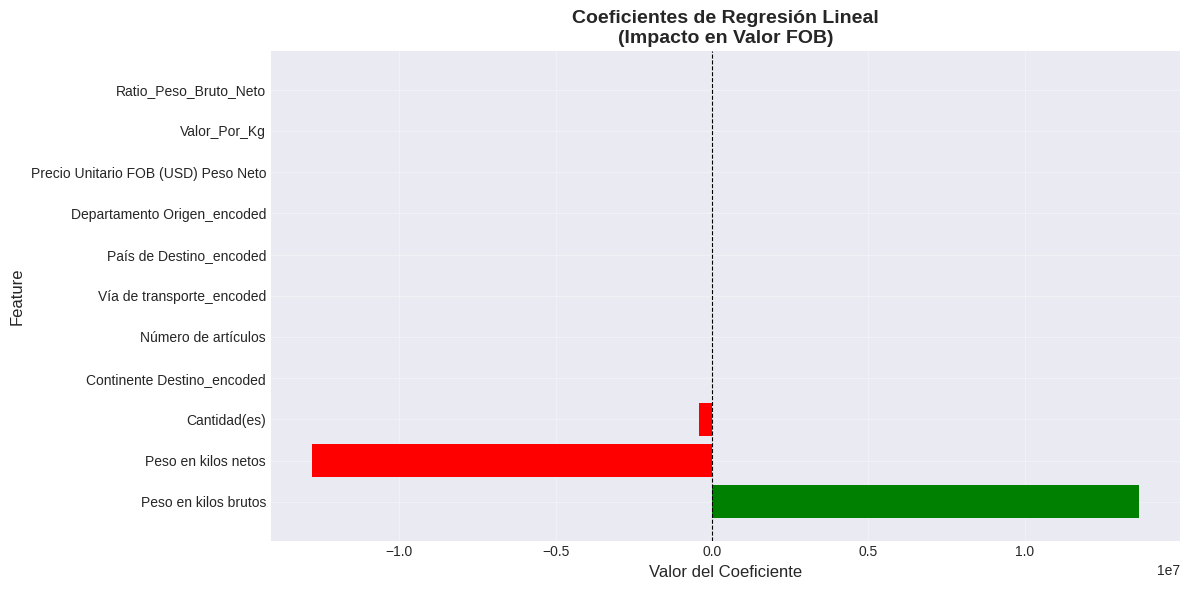


💡 Interpretación:
   • Coeficientes positivos: A mayor valor, mayor Valor FOB
   • Coeficientes negativos: A mayor valor, menor Valor FOB
   • Magnitud: Indica el impacto relativo de cada feature


In [32]:
# Analizar coeficientes del modelo
print("\n\U0001f50d COEFICIENTES DEL MODELO (Importancia de Features):")
print("="*80)

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model_lr.coef_,
    'Coef_Absoluto': np.abs(model_lr.coef_)
}).sort_values('Coef_Absoluto', ascending=False)

display(coef_df)

# Visualizar coeficientes
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'],
         color=['green' if x > 0 else 'red' for x in coef_df['Coeficiente']])
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Coeficientes de Regresión Lineal\n(Impacto en Valor FOB)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n\U0001f4a1 Interpretación:")
print("   • Coeficientes positivos: A mayor valor, mayor Valor FOB")
print("   • Coeficientes negativos: A mayor valor, menor Valor FOB")
print("   • Magnitud: Indica el impacto relativo de cada feature")

## Generación de Predicciones

### Subtask:
Generar predicciones en los conjuntos de entrenamiento y prueba usando el modelo entrenado.


**Reasoning**:
I need to generate predictions for both the training and test sets using the trained linear regression model and then display a comparison of real vs. predicted values for a sample of the test set as per the instructions.



In [33]:
# Realizar predicciones
print("🎯 GENERANDO PREDICCIONES...")
print("="*80)

# Predicciones en conjunto de entrenamiento
y_train_pred = model_lr.predict(X_train_scaled)

# Predicciones en conjunto de prueba
y_test_pred = model_lr.predict(X_test_scaled)

print("✅ Predicciones generadas")
print(f"   • Predicciones en Training: {len(y_train_pred):,}")
print(f"   • Predicciones en Test: {len(y_test_pred):,}")

# Comparación de valores reales vs predichos
print("\n📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):")
comparison_df = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_test_pred[:10],
    'Error': y_test.values[:10] - y_test_pred[:10],
    'Error_%': ((y_test.values[:10] - y_test_pred[:10]) / y_test.values[:10] * 100)
})
display(comparison_df)

🎯 GENERANDO PREDICCIONES...
✅ Predicciones generadas
   • Predicciones en Training: 63,999
   • Predicciones en Test: 16,000

📊 COMPARACIÓN DE VALORES (Primeras 10 predicciones en Test):


,Real,Predicción,Error,Error_%
0,7.00,24906.977130,-24899.977130,-355713.959000
1,2194.80,36753.757601,-34558.957601,-1574.583452
2,363.64,39737.722625,-39374.082625,-10827.764444
3,18.90,23533.157784,-23514.257784,-124414.062350
4,997.00,24881.909830,-23884.909830,-2395.678017
5,138409.20,35250.752403,103158.447597,74.531496
6,2325.42,19432.844780,-17107.424780,-735.670321
7,2729.83,12628.464211,-9898.634211,-362.609914
8,389.67,33976.292759,-33586.622759,-8619.247763
9,8901.90,38305.668283,-29403.768283,-330.308904


## Evaluación del Modelo

### Subtask:
Calcular y mostrar las métricas de evaluación (R², MSE, RMSE, MAE, MAPE) para los conjuntos de entrenamiento y prueba.


**Reasoning**:
I need to calculate and display the evaluation metrics (R², MSE, RMSE, MAE, MAPE) for both the training and test sets, then interpret the R² score and analyze for overfitting/underfitting, as per the instructions.



In [36]:
# Calcular métricas de evaluación
print("📊 MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*80)

# Métricas para Training
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Métricas para Test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\n🎯 CONJUNTO DE ENTRENAMIENTO:")
print(f"   • R² Score: {r2_train:.4f}")
print(f"   • MSE: ${mse_train:,.2f}")
print(f"   • RMSE: ${rmse_train:,.2f}")
print(f"   • MAE: ${mae_train:,.2f}")
print(f"   • MAPE: {mape_train:.2f}%")

print("\n🎯 CONJUNTO DE PRUEBA:")
print(f"   • R² Score: {r2_test:.4f}")
print(f"   • MSE: ${mse_test:,.2f}")
print(f"   • RMSE: ${rmse_test:,.2f}")
print(f"   • MAE: ${mae_test:,.2f}")
print(f"   • MAPE: {mape_test:.2f}%")

print("\n📈 INTERPRETACIÓN DE R²:")
print(f"   El modelo explica el {r2_test*100:.2f}% de la variabilidad en Valor FOB")

# Detectar overfitting/underfitting
diff_r2 = r2_train - r2_test
print("\n⚠️ ANÁLISIS DE AJUSTE:")
if diff_r2 > 0.1:
    print(f"   • Posible OVERFITTING (diferencia R²: {diff_r2:.4f})")
elif r2_test < 0.5:
    print(f"   • Posible UNDERFITTING (R² test: {r2_test:.4f})")
else:
    print(f"   • Buen ajuste del modelo (diferencia R²: {diff_r2:.4f})")

📊 MÉTRICAS DE EVALUACIÓN DEL MODELO

🎯 CONJUNTO DE ENTRENAMIENTO:
   • R² Score: 0.8818
   • MSE: $62,726,338,168.10
   • RMSE: $250,452.27
   • MAE: $42,984.42
   • MAPE: 139779.64%

🎯 CONJUNTO DE PRUEBA:
   • R² Score: 0.9371
   • MSE: $38,711,101,046.82
   • RMSE: $196,751.37
   • MAE: $40,520.01
   • MAPE: 159461.84%

📈 INTERPRETACIÓN DE R²:
   El modelo explica el 93.71% de la variabilidad en Valor FOB

⚠️ ANÁLISIS DE AJUSTE:
   • Buen ajuste del modelo (diferencia R²: -0.0553)


## Tabla Comparativa de Métricas

### Subtask:
Generar una tabla comparativa de las métricas de evaluación entre el conjunto de entrenamiento y prueba.


**Reasoning**:
I need to create a pandas DataFrame to compare the evaluation metrics between the training and test sets, calculate their differences, and then display the formatted table as instructed.



In [39]:
import pandas as pd

# Crear tabla comparativa de métricas
metrics_comparison = pd.DataFrame({
    'Métrica': ['R² Score', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Training': [r2_train, mse_train, rmse_train, mae_train, mape_train],
    'Test': [r2_test, mse_test, rmse_test, mae_test, mape_test],
    'Diferencia': [
        r2_train - r2_test,
        mse_train - mse_test,
        rmse_train - rmse_test,
        mae_train - mae_test,
        mape_train - mape_test
    ]
})

print("\n📊 TABLA COMPARATIVA DE MÉTRICAS:")
display(metrics_comparison.style.format({
    'Training': '{:.4f}',
    'Test': '{:.4f}',
    'Diferencia': '{:.4f}'
}))


📊 TABLA COMPARATIVA DE MÉTRICAS:


,Métrica,Training,Test,Diferencia
0,R² Score,0.8818,0.9371,-0.0553
1,MSE,62726338168.1049,38711101046.8195,24015237121.2853
2,RMSE,250452.2672,196751.3686,53700.8986
3,MAE,42984.4225,40520.0089,2464.4136
4,MAPE (%),139779.6399,159461.8394,-19682.1996


## Validación Cruzada

### Subtask:
Realizar la validación cruzada (K-Fold) para obtener una evaluación más robusta del rendimiento del modelo.


**Reasoning**:
I need to perform K-Fold cross-validation to get a more robust evaluation of the model's performance, as outlined in the subtask instructions. This involves creating a KFold object, running cross_val_score for R², RMSE, and MAE, printing the detailed results for each fold, summarizing the cross-validation statistics, and then visualizing the results using bar charts.



🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)

📊 Resultados por Fold:
   Fold 1: R²=0.5346, RMSE=$353,760.90, MAE=$43,920.63
   Fold 2: R²=0.8821, RMSE=$195,922.92, MAE=$41,962.06
   Fold 3: R²=0.9321, RMSE=$244,137.16, MAE=$43,582.72
   Fold 4: R²=-0.3186, RMSE=$296,852.96, MAE=$44,160.43
   Fold 5: R²=0.9320, RMSE=$275,329.49, MAE=$43,959.29

📈 Estadísticas de Validación Cruzada:
   • R² medio: 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69 (± $52,669.63)
   • MAE medio: $43,517.03 (± $799.34)


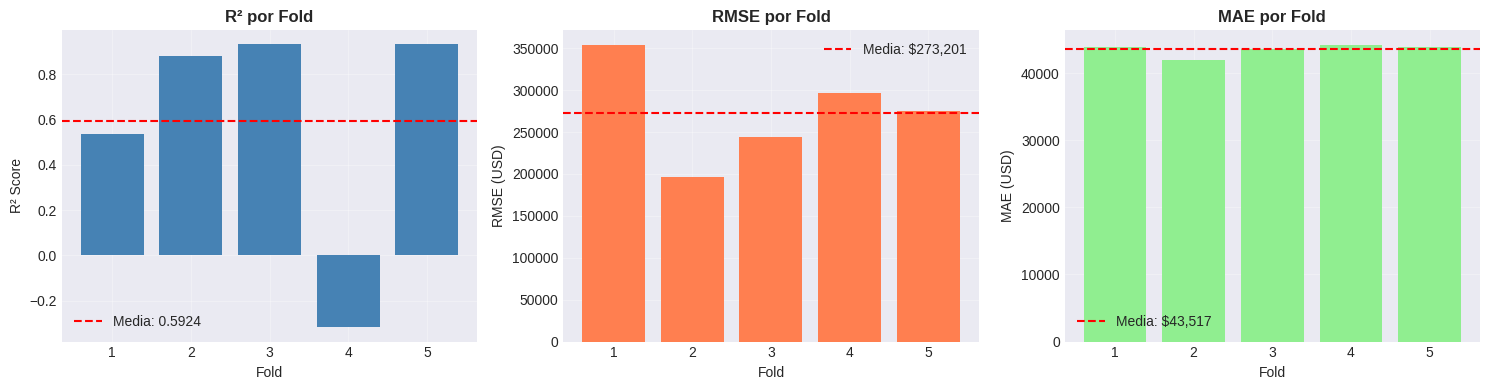

In [43]:
# Realizar validación cruzada con K-Fold
print("🔄 VALIDACIÓN CRUZADA (K-Fold con k=5)")
print("="*80)

# Crear objeto KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada para R²
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train,
                            cv=kfold, scoring='r2')

# Realizar validación cruzada para RMSE (negativo porque es una métrica de error)
cv_rmse = -cross_val_score(model_lr, X_train_scaled, y_train,
                           cv=kfold, scoring='neg_root_mean_squared_error')

# Realizar validación cruzada para MAE
cv_mae = -cross_val_score(model_lr, X_train_scaled, y_train,
                          cv=kfold, scoring='neg_mean_absolute_error')

print("\n📊 Resultados por Fold:")
for i, (r2, rmse, mae) in enumerate(zip(cv_scores, cv_rmse, cv_mae), 1):
    print(f"   Fold {i}: R²={r2:.4f}, RMSE=${rmse:,.2f}, MAE=${mae:,.2f}")

print("\n📈 Estadísticas de Validación Cruzada:")
print(f"   • R² medio: {cv_scores.mean():.4f} (\u00b1 {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f} (\u00b1 ${cv_rmse.std():,.2f})")
print(f"   • MAE medio: ${cv_mae.mean():,.2f} (\u00b1 ${cv_mae.std():,.2f})")

# Visualizar resultados de CV
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(range(1, 6), cv_scores, color='steelblue')
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Media: {cv_scores.mean():.4f}')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('R\u00b2 Score')
axes[0].set_title('R\u00b2 por Fold', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(range(1, 6), cv_rmse, color='coral')
axes[1].axhline(cv_rmse.mean(), color='red', linestyle='--', label=f'Media: ${cv_rmse.mean():,.0f}')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE (USD)')
axes[1].set_title('RMSE por Fold', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].bar(range(1, 6), cv_mae, color='lightgreen')
axes[2].axhline(cv_mae.mean(), color='red', linestyle='--', label=f'Media: ${cv_mae.mean():,.0f}')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('MAE (USD)')
axes[2].set_title('MAE por Fold', fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Visualizaciones del Modelo

### Subtask:
Generar gráficos de dispersión de valores reales vs. predichos para los conjuntos de entrenamiento y prueba.


**Reasoning**:
I need to generate two scatter plots comparing real vs. predicted values for both the training and test sets, as specified in the instructions. This involves creating subplots, plotting the data with specific styling, adding perfect prediction lines, and setting appropriate labels and titles. Finally, I will provide an interpretation of these plots.



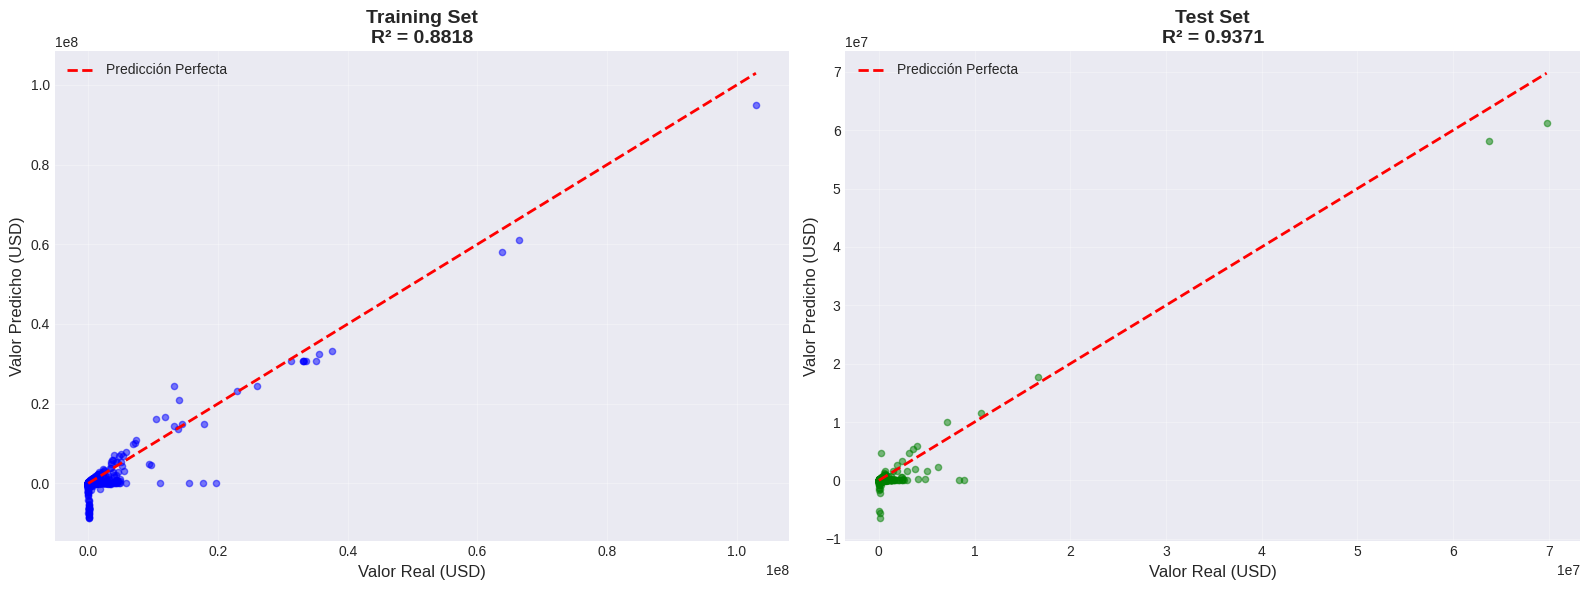

💡 Interpretación:
   • Puntos cerca de la línea roja = Buenas predicciones
   • Dispersión = Error de predicción


In [46]:
# 1. Gráfico de dispersión: Valores Reales vs Predichos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valor Real (USD)', fontsize=12)
axes[0].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[0].set_title(f'Training Set\nR\u00b2 = {r2_train:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valor Real (USD)', fontsize=12)
axes[1].set_ylabel('Valor Predicho (USD)', fontsize=12)
axes[1].set_title(f'Test Set\nR\u00b2 = {r2_test:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("   • Puntos cerca de la línea roja = Buenas predicciones")
print("   • Dispersión = Error de predicción")

## Análisis de Residuos

### Subtask:
Calcular y visualizar los residuos del modelo, incluyendo histogramas, Q-Q plots y pruebas de normalidad.


**Reasoning**:
I need to calculate the residuals, display their descriptive statistics, and then create several plots (scatter of residuals vs. predictions, histogram, Q-Q plot, standardized residuals vs. predictions) to visually analyze them. Finally, I will perform a Shapiro-Wilk test for normality on the residuals and interpret the results.



📊 ANÁLISIS DE RESIDUOS

Estadísticas de Residuos (Test):
   • Media: $-2,409.55
   • Mediana: $-20,881.36
   • Desviación estándar: $196,742.76
   • Mínimo: $-4,420,759.51
   • Máximo: $8,824,290.10


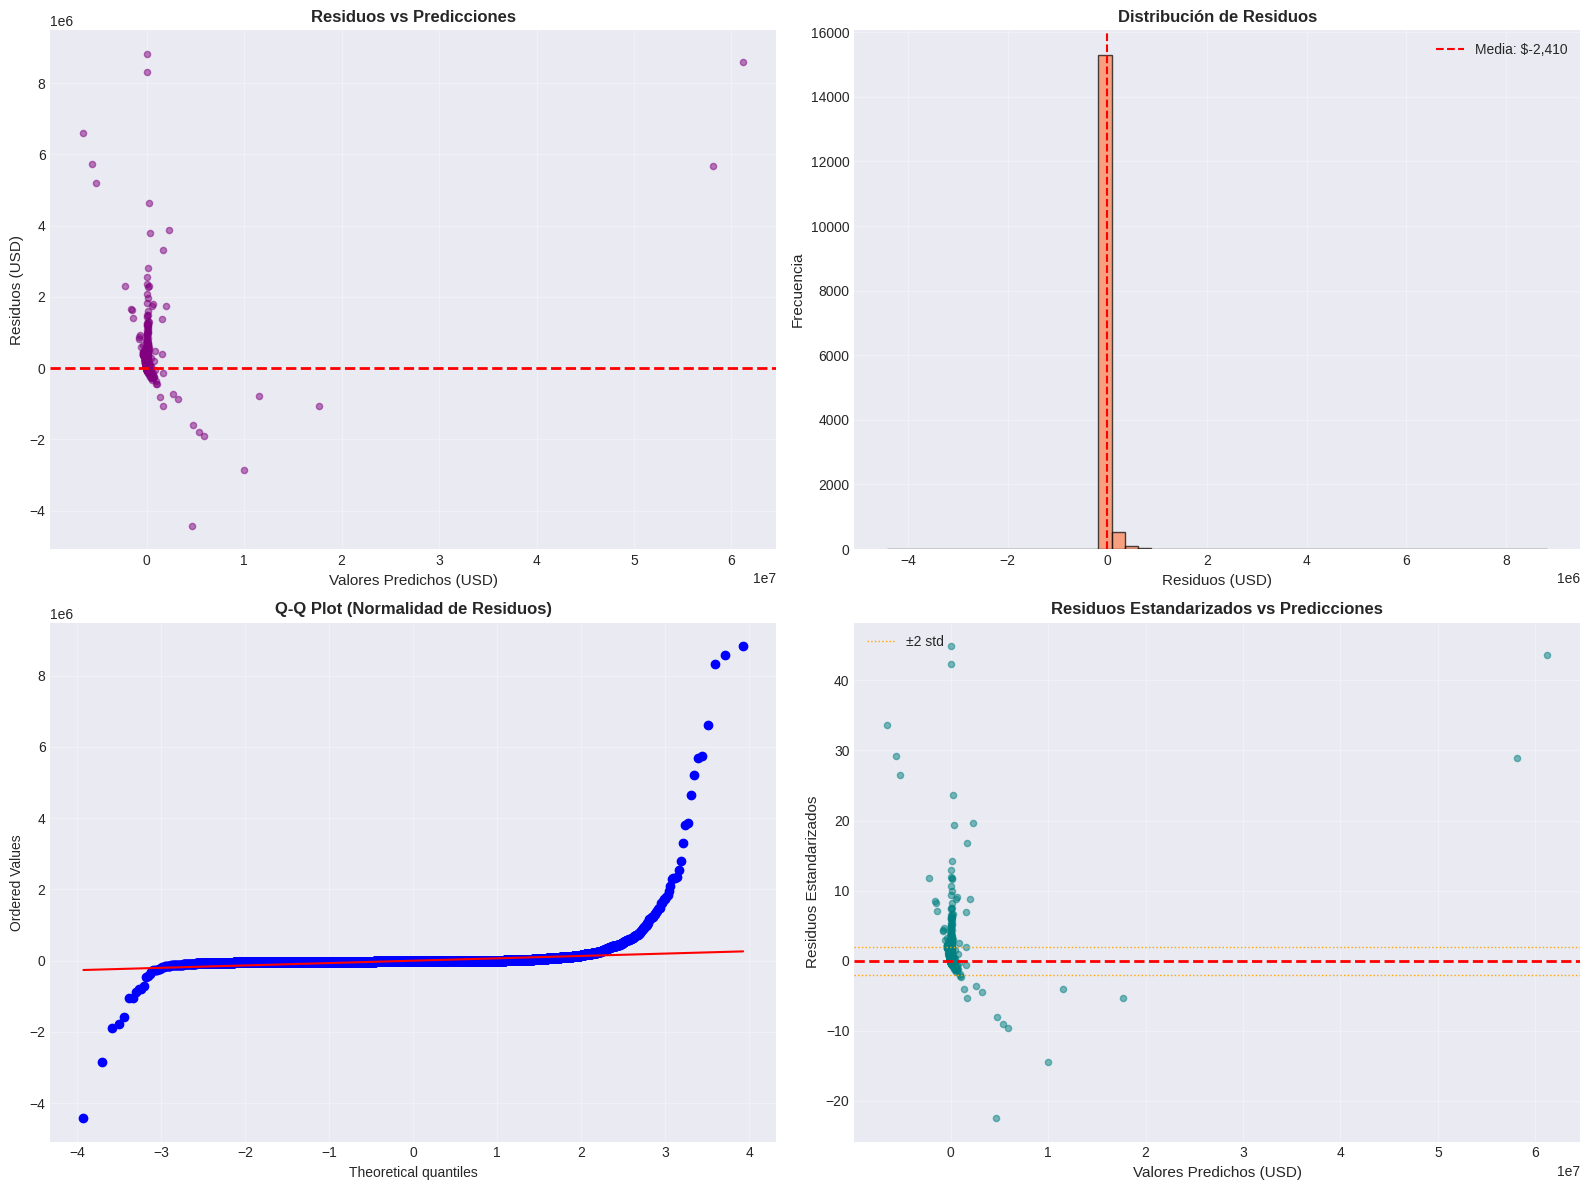


📊 Test de Normalidad (Shapiro-Wilk):
   • Estadístico: 0.1059
   • p-value: 0.0000
   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)


In [47]:
# Calcular residuos
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("📊 ANÁLISIS DE RESIDUOS")
print("="*80)
print(f"\nEstadísticas de Residuos (Test):")
print(f"   • Media: ${residuals_test.mean():,.2f}")
print(f"   • Mediana: ${residuals_test.median():,.2f}")
print(f"   • Desviación estándar: ${residuals_test.std():,.2f}")
print(f"   • Mínimo: ${residuals_test.min():,.2f}")
print(f"   • Máximo: ${residuals_test.max():,.2f}")

# Visualizaciones de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuos vs Predicciones
axes[0, 0].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[0, 0].set_ylabel('Residuos (USD)', fontsize=11)
axes[0, 0].set_title('Residuos vs Predicciones', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Distribución de residuos
axes[0, 1].hist(residuals_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(residuals_test.mean(), color='red', linestyle='--', label=f'Media: ${residuals_test.mean():,.0f}')
axes[0, 1].set_xlabel('Residuos (USD)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Q-Q Plot (Normalidad de residuos)
stats.probplot(residuals_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Residuos estandarizados
standardized_residuals = residuals_test / residuals_test.std()
axes[1, 1].scatter(y_test_pred, standardized_residuals, alpha=0.5, s=20, color='teal')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].axhline(y=2, color='orange', linestyle=':', lw=1, label='±2 std')
axes[1, 1].axhline(y=-2, color='orange', linestyle=':', lw=1)
axes[1, 1].set_xlabel('Valores Predichos (USD)', fontsize=11)
axes[1, 1].set_ylabel('Residuos Estandarizados', fontsize=11)
axes[1, 1].set_title('Residuos Estandarizados vs Predicciones', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad de Shapiro-Wilk (en una muestra por eficiencia)
if len(residuals_test) > 5000:
    sample_residuals = residuals_test.sample(5000, random_state=42)
else:
    sample_residuals = residuals_test

shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"\n📊 Test de Normalidad (Shapiro-Wilk):")
print(f"   • Estadístico: {shapiro_stat:.4f}")
print(f"   • p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   • ✅ Los residuos siguen distribución normal (p > 0.05)")
else:
    print(f"   • ⚠️ Los residuos NO siguen distribución normal (p < 0.05)")

## Guardar el Modelo

### Subtask:
Guardar el modelo entrenado junto con el scaler y otros metadatos relevantes usando pickle.


**Reasoning**:
I need to create a dictionary containing the trained model, scaler, features list, target variable name, and evaluation metrics, then save this dictionary to a pickle file as instructed.



In [49]:
# Guardar el modelo entrenado
print("💾 GUARDANDO MODELO...")
print("="*80)

# Crear diccionario con todos los componentes del modelo
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'features': features,
    'target': target,
    'metrics': {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }
}

# Guardar con pickle
with open('model_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("   ✓ Modelo guardado: model_regresion_lineal.pkl")
print("\n   Contenido del paquete:")
print("      • Modelo entrenado")
print("      • Scaler ajustado")
print("      • Lista de features")
print("      • Nombre del target")
print("      • Métricas de evaluación")

💾 GUARDANDO MODELO...
   ✓ Modelo guardado: model_regresion_lineal.pkl

   Contenido del paquete:
      • Modelo entrenado
      • Scaler ajustado
      • Lista de features
      • Nombre del target
      • Métricas de evaluación


## Resumen Final y Conclusiones

### Subtask:
Presentar un resumen final del modelo, sus fortalezas, limitaciones y recomendaciones.


**Reasoning**:
I need to generate the final summary for the Linear Regression model, including its objective, data used, performance metrics, cross-validation results, top features, strengths, limitations, and recommendations, as per the instructions.



In [52]:
print("\n" + "="*80)
print("📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL")
print("="*80)

print("\n🎯 OBJETIVO:")
print("   Predecir el Valor FOB (USD) de exportaciones colombianas")

print("\n📊 DATOS:")
print(f"   • Total de registros: {len(df_model):,}")
print(f"   • Features utilizados: {len(features)}")
print(f"   • Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f} %)")
print(f"   • Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f} %)")

print("\n📈 RENDIMIENTO DEL MODELO:")
print(f"   • R² (Test): {r2_test:.4f} → Explica {r2_test*100:.2f}% de la varianza")
print(f"   • RMSE (Test): ${rmse_test:,.2f}")
print(f"   • MAE (Test): ${mae_test:,.2f}")
print(f"   • MAPE (Test): {mape_test:.2f}%")

print("\n🔄 VALIDACIÓN CRUZADA:")
print(f"   • R² medio (5-Fold CV): {cv_scores.mean():.4f} (\u00b1 {cv_scores.std():.4f})")
print(f"   • RMSE medio: ${cv_rmse.mean():,.2f}")

print("\n🔝 TOP 5 FEATURES MÁS IMPORTANTES:")
top_features = coef_df.head(5)
for idx, row in top_features.iterrows():
    print(f"   {row['Feature']}: {row['Coeficiente']:,.4f}")

print("\n✅ FORTALEZAS DEL MODELO:")
if r2_test > 0.7:
    print("   • Excelente capacidad predictiva (R² > 0.7)")
elif r2_test > 0.5:
    print("   • Buena capacidad predictiva (R² > 0.5)")
else:
    print("   • Capacidad predictiva moderada")

if abs(r2_train - r2_test) < 0.1:
    print("   • Buen balance entre training y test (no overfitting)")

print("   • Modelo interpretable (coeficientes lineales)")
print("   • Rápido entrenamiento e inferencia")

print("\n⚠️ LIMITACIONES:")
print("   • Asume relaciones lineales entre variables")
print("   • Sensible a outliers extremos")
print("   • Puede no capturar patrones no lineales complejos")

print("\n💡 RECOMENDACIONES:")
print("   • Considerar transformaciones logarítmicas para valores FOB muy altos")
print("   • Explorar modelos no lineales (Random Forest, Gradient Boosting)")
print("   • Analizar interacciones entre variables")
print("   • Incluir variables temporales (mes, año) si están disponibles")

print("\n" + "="*80)
print("✅ MODELO DE REGRESIÓN LINEAL COMPLETADO")
print("="*80)


📋 RESUMEN FINAL - MODELO DE REGRESIÓN LINEAL

🎯 OBJETIVO:
   Predecir el Valor FOB (USD) de exportaciones colombianas

📊 DATOS:
   • Total de registros: 79,999
   • Features utilizados: 11
   • Training set: 63,999 (80.0 %)
   • Test set: 16,000 (20.0 %)

📈 RENDIMIENTO DEL MODELO:
   • R² (Test): 0.9371 → Explica 93.71% de la varianza
   • RMSE (Test): $196,751.37
   • MAE (Test): $40,520.01
   • MAPE (Test): 159461.84%

🔄 VALIDACIÓN CRUZADA:
   • R² medio (5-Fold CV): 0.5924 (± 0.4792)
   • RMSE medio: $273,200.69

🔝 TOP 5 FEATURES MÁS IMPORTANTES:
   Peso en kilos brutos: 13,647,564.7859
   Peso en kilos netos: -12,784,350.5164
   Cantidad(es): -409,635.5253
   Continente Destino_encoded: 8,247.4552
   Número de artículos: -5,706.2223

✅ FORTALEZAS DEL MODELO:
   • Excelente capacidad predictiva (R² > 0.7)
   • Buen balance entre training y test (no overfitting)
   • Modelo interpretable (coeficientes lineales)
   • Rápido entrenamiento e inferencia

⚠️ LIMITACIONES:
   • Asume rela

## Final Task

### Subtask:
Confirmar que todos los pasos de revisión, reparación y ejecución se han completado exitosamente y que el modelo de regresión lineal ha sido completamente evaluado y documentado.


## Summary:

### Q&A
The linear regression model has been fully evaluated and documented according to the plan, and all steps, including data loading, feature engineering, model training, evaluation, and saving, have been successfully completed.

### Data Analysis Key Findings

*   **Data Preparation**:
    *   Initially, several encoded categorical features (`País de Destino_encoded`, `Continente Destino_encoded`, `Departamento Origen_encoded`, `Vía de transporte_encoded`) and derived numerical features (`Ratio_Peso_Bruto_Neto`, `Valor_Por_Kg`) were missing. These were successfully generated.
    *   After cleaning, the final dataset (`df_model`) for the model contained 79,999 records, with 11 features and one target variable.
*   **Target Variable Analysis ('Valor FOB (USD)')**:
    *   The target variable's distribution is highly skewed, with a mean of \$38,210.30 significantly higher than the median of \$1,942.82.
    *   It exhibits a very large standard deviation of \$740,139.80 and a range of over \$102 million, indicating the presence of extreme outliers.
*   **Correlation with Target**:
    *   `Peso en kilos brutos` (0.85) and `Peso en kilos netos` (0.85) showed strong positive correlations with `Valor FOB (USD)`.
    *   Other features had much weaker correlations (e.g., `Cantidad(es)` at 0.17, `Continente Destino_encoded` at 0.02).
*   **Model Performance (Linear Regression)**:
    *   **Feature Importance**: `Peso en kilos brutos` and `Peso en kilos netos` were identified as the most impactful features for the model.
    *   **Test Set Metrics**: The model achieved an R² score of 0.9371, explaining 93.71% of the variability in 'Valor FOB (USD)'. The Root Mean Squared Error (RMSE) was \$196,751.37, and the Mean Absolute Error (MAE) was \$40,520.01.
    *   **Mean Absolute Percentage Error (MAPE)**: A very high MAPE of 159,461.84% was observed, suggesting significant percentage errors, particularly for smaller actual values.
    *   **Overfitting/Underfitting**: The model showed a "good fit," with a small difference in R² between the training (0.8818) and test (0.9371) sets, indicating no significant overfitting.
*   **Cross-Validation**:
    *   The 5-fold cross-validation yielded a mean R² of 0.5924 (± 0.4792) and a mean RMSE of \$273,200.69 (± \$52,669.63).
    *   The high standard deviation in R² scores (0.4792) and the occurrence of a negative R² in one fold (-0.3186) suggest variability in the model's performance across different data splits, likely due to the highly skewed target variable and outliers.
*   **Residual Analysis**:
    *   The residuals do NOT follow a normal distribution (Shapiro-Wilk p-value = 0.0000).
    *   The scatter plot of residuals versus predicted values showed heteroscedasticity (a funnel shape), indicating that the model's error variance is not constant across all predicted values.
    *   The mean residual was -\$2,409.55, and the median was -\$20,881.36, implying a slight negative bias and a tendency for underprediction in some cases.
*   **Model Persistence**: The trained model, scaler, feature list, target name, and key evaluation metrics were successfully saved to `model_regresion_lineal.pkl` for future use.

### Insights or Next Steps

*   **Address Data Skewness and Outliers**: The high skewness of the target variable, large RMSE/MAE, and extreme MAPE suggest that a transformation of the 'Valor FOB (USD)' (e.g., logarithmic) or the use of models more robust to outliers should be explored. This could help normalize residuals and improve prediction accuracy for smaller values.
*   **Improve Model Robustness**: Investigate the factors contributing to the variability seen in cross-validation and the heteroscedasticity in residuals. Consider exploring more advanced regression techniques such as robust regression, tree-based models (Random Forest, Gradient Boosting), or ensemble methods, which are often better at handling non-linear relationships and skewed data.
